<a href="https://colab.research.google.com/github/srodriguez5500/Project-Renewind/blob/main/Project_Renewind_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### **Business Context**

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## **Objective**
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## **Data Description**
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## **Importing necessary libraries**

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 6 Renewind Pipelines and Hyperparameter Tuning/Train.csv.csv')
df_test = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 6 Renewind Pipelines and Hyperparameter Tuning/Test.csv.csv')

## **Data Overview**

- Observations
- Sanity checks

### **Sanity checks for train set**

####**Display first 5 rows in train set**

In [ ]:
df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

####**Check shape of the train set**

In [ ]:
df.shape

(20000, 41)

- The training set has successfully been imported.
- The training set has 20,000 observations and 41 features.

####**Check data types in the train set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

####**Check for duplicates and missing values**

In [ ]:
#Check for duplicated data
df.duplicated().sum()

0

In [ ]:
#view sum of null entries
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

- All features are numerical (float 64 or int64).
- There are 18 missing values in the V1 and V2 columns respectively.

####**View statistical summary for the training set**

In [ ]:
df.describe()

V1        V2        V3        V4        V5        V6        V7  \
count 19982.000 19982.000 20000.000 20000.000 20000.000 20000.000 20000.000   
mean     -0.272     0.440     2.485    -0.083    -0.054    -0.995    -0.879   
std       3.442     3.151     3.389     3.432     2.105     2.041     1.762   
min     -11.876   -12.320   -10.708   -15.082    -8.603   -10.227    -7.950   
25%      -2.737    -1.641     0.207    -2.348    -1.536    -2.347    -2.031   
50%      -0.748     0.472     2.256    -0.135    -0.102    -1.001    -0.917   
75%       1.840     2.544     4.566     2.131     1.340     0.380     0.224   
max      15.493    13.089    17.091    13.236     8.134     6.976     8.006   

             V8        V9       V10       V11       V12       V13       V14  \
count 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000   
mean     -0.548    -0.017    -0.013    -1.895     1.605     1.580    -0.951   
std       3.296     2.161     2.193     3.124     2.930     2.875     1.790   
min     -15.658    -8.596    -9.854   -14.832   -12.948   -13.228    -7.739   
25%      -2.643    -1.495    -1.411    -3.922    -0.397    -0.224    -2.171   
50%      -0.389    -0.068     0.101    -1.921     1.508     1.637    -0.957   
75%       1.723     1.409     1.477     0.119     3.571     3.460     0.271   
max      11.679     8.138     8.108    11.826    15.081    15.420     5.671   

            V15       V16       V17       V18       V19       V20       V21  \
count 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000   
mean     -2.415    -2.925    -0.134     1.189     1.182     0.024    -3.611   
std       3.355     4.222     3.345     2.592     3.397     3.669     3.568   
min     -16.417   -20.374   -14.091   -11.644   -13.492   -13.923   -17.956   
25%      -4.415    -5.634    -2.216    -0.404    -1.050    -2.433    -5.930   
50%      -2.383    -2.683    -0.015     0.883     1.279     0.033    -3.533   
75%      -0.359    -0.095     2.069     2.572     3.493     2.512    -1.266   
max      12.246    13.583    16.756    13.180    13.238    16.052    13.840   

            V22       V23       V24       V25       V26       V27       V28  \
count 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000   
mean      0.952    -0.366     1.134    -0.002     1.874    -0.612    -0.883   
std       1.652     4.032     3.912     2.017     3.435     4.369     1.918   
min     -10.122   -14.866   -16.387    -8.228   -11.834   -14.905    -9.269   
25%      -0.118    -3.099    -1.468    -1.365    -0.338    -3.652    -2.171   
50%       0.975    -0.262     0.969     0.025     1.951    -0.885    -0.891   
75%       2.026     2.452     3.546     1.397     4.130     2.189     0.376   
max       7.410    14.459    17.163     8.223    16.836    17.560     6.528   

            V29       V30       V31       V32       V33       V34       V35  \
count 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000   
mean     -0.986    -0.016     0.487     0.304     0.050    -0.463     2.230   
std       2.684     3.005     3.461     5.500     3.575     3.184     2.937   
min     -12.579   -14.796   -13.723   -19.877   -16.898   -17.985   -15.350   
25%      -2.787    -1.867    -1.818    -3.420    -2.243    -2.137     0.336   
50%      -1.176     0.184     0.490     0.052    -0.066    -0.255     2.099   
75%       0.630     2.036     2.731     3.762     2.255     1.437     4.064   
max      10.722    12.506    17.255    23.633    16.692    14.358    15.291   

            V36       V37       V38       V39       V40    Target  
count 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000  
mean      1.515     0.011    -0.344     0.891    -0.876     0.056  
std       3.801     1.788     3.948     1.753     3.012     0.229  
min     -14.833    -5.478   -17.375    -6.439   -11.024     0.000  
25%      -0.944    -1.256    -2.988    -0.272    -2.940     0.000  
50%       1.567    -0.128    -0.317     0.919

- All features have values between the -20 to ~20 range.
- The standard deviation tends to be around 3 across all features, with the exception of a few features.
- Features such as V16, V23, V27, and V32 have higher standard deviation values, however their distributions appear to be normal.

####**View distribution of target variable on training set**

In [ ]:
df['Target'].value_counts(1)

Target
0   0.945
1   0.056
Name: proportion, dtype: float64

- The class ratio of the target variable is severely imbalanced.

### **Sanity checks for test set**

####**Show first 5 rows**

In [ ]:
df_test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

####**Check shape on test set**

In [ ]:
df_test.shape

(5000, 41)

- Test data is successfully loaded.
- There are 5,000 rows and 41 features in the test set.

####**Check data types on test set**

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

- All data types for the test set are numerical.

####**Check duplicates and missing values on test set**

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- There are 5 missing values in the `V1` column and 6 missing values in the `V2` column.
- There are no duplicated entries.

####**View distribution of target variable on test set**

In [ ]:
df_test['Target'].value_counts(1)

Target
0   0.944
1   0.056
Name: proportion, dtype: float64

- The target variable in the test set is severely imbalanced as well.

## **Exploratory Data Analysis (EDA)**

###**Univariate Analysis**

#### **Plotting histograms and boxplots for all the variables**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### **Plotting all the features at one go**

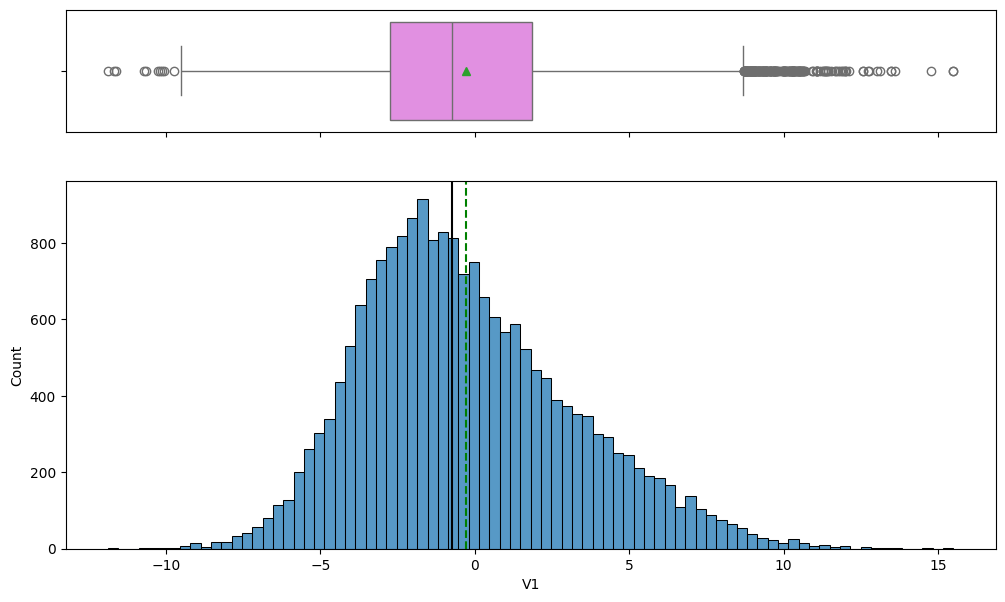

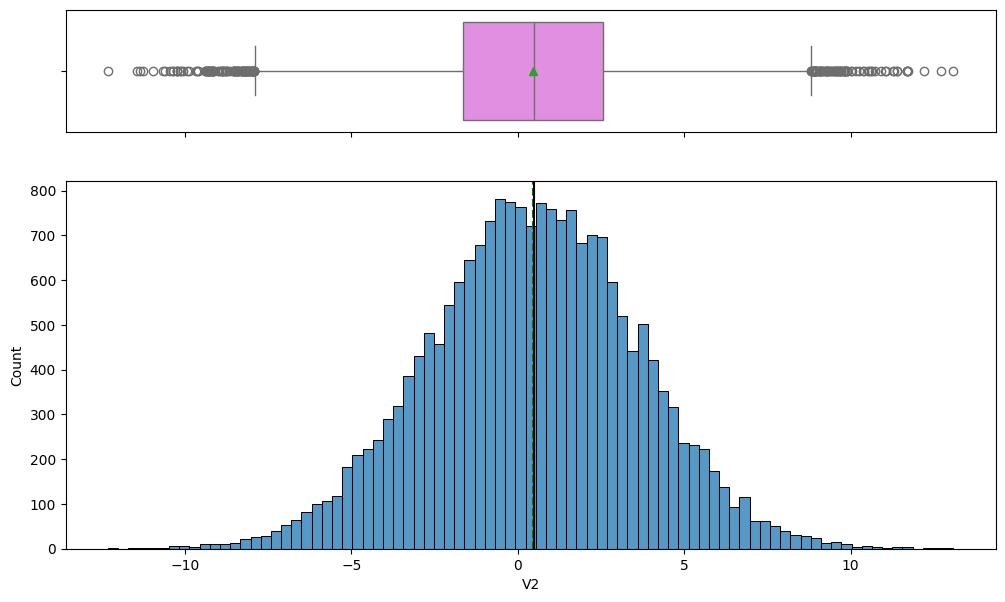

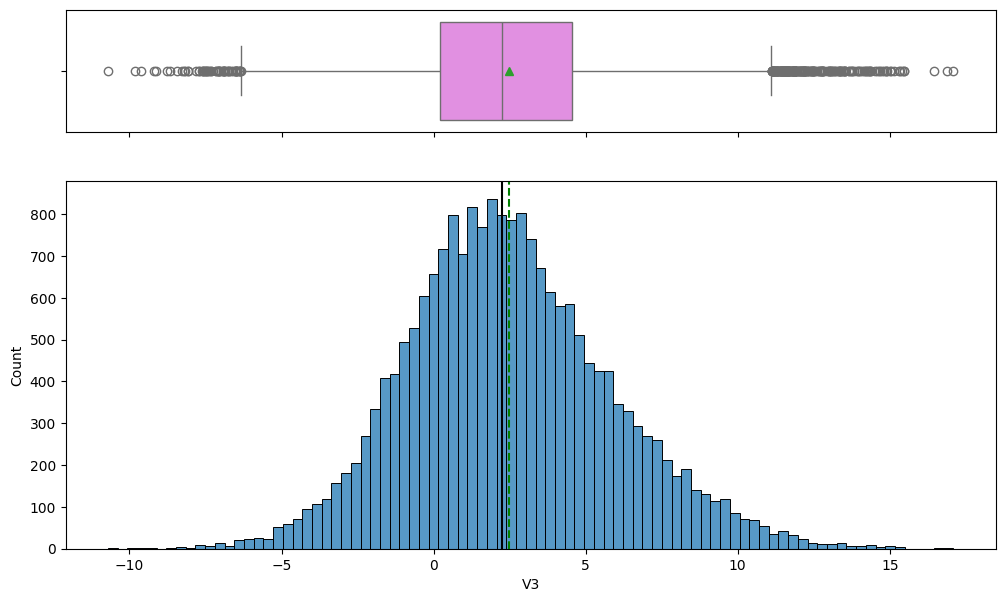

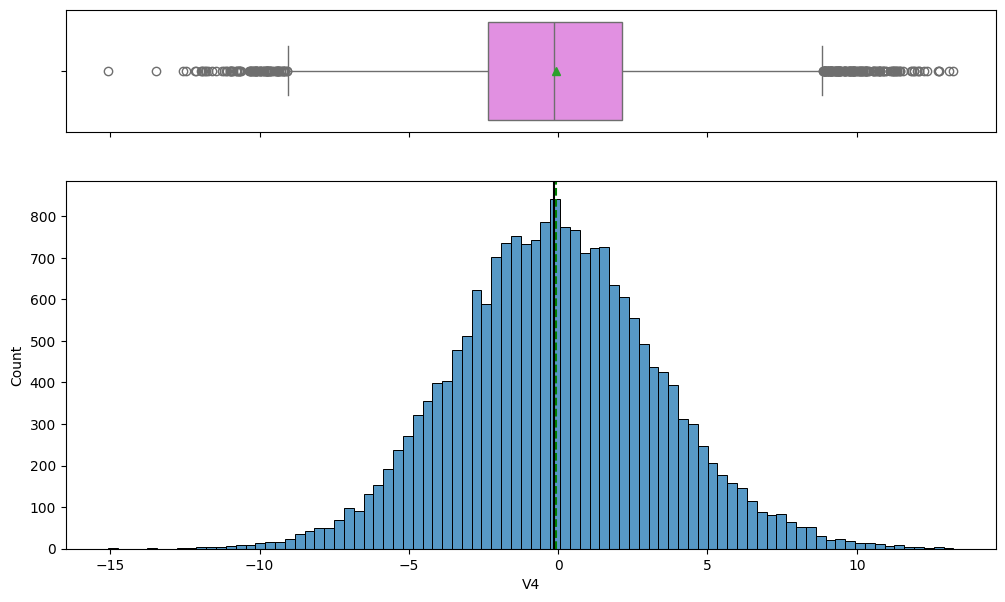

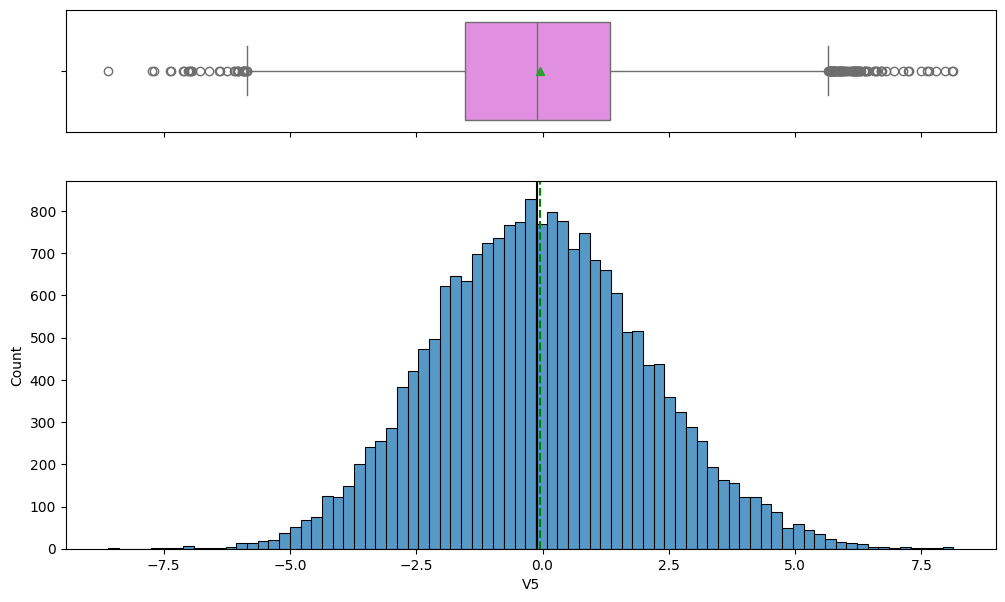

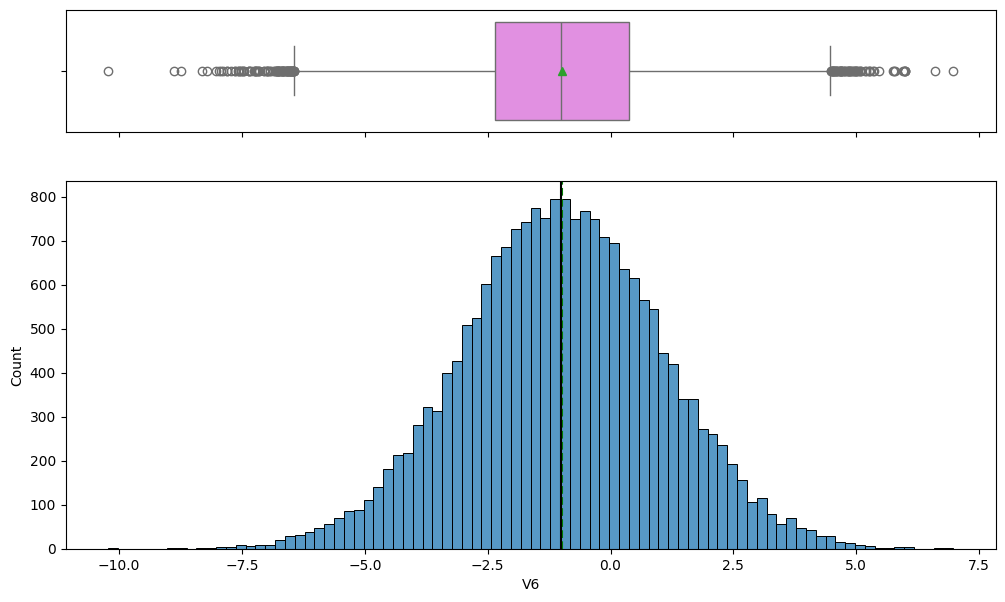

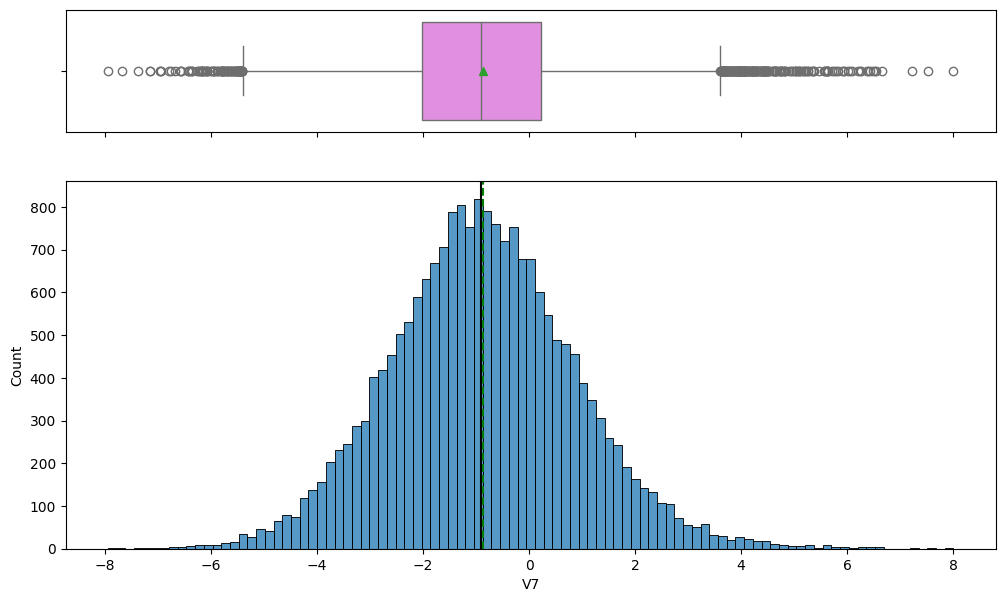

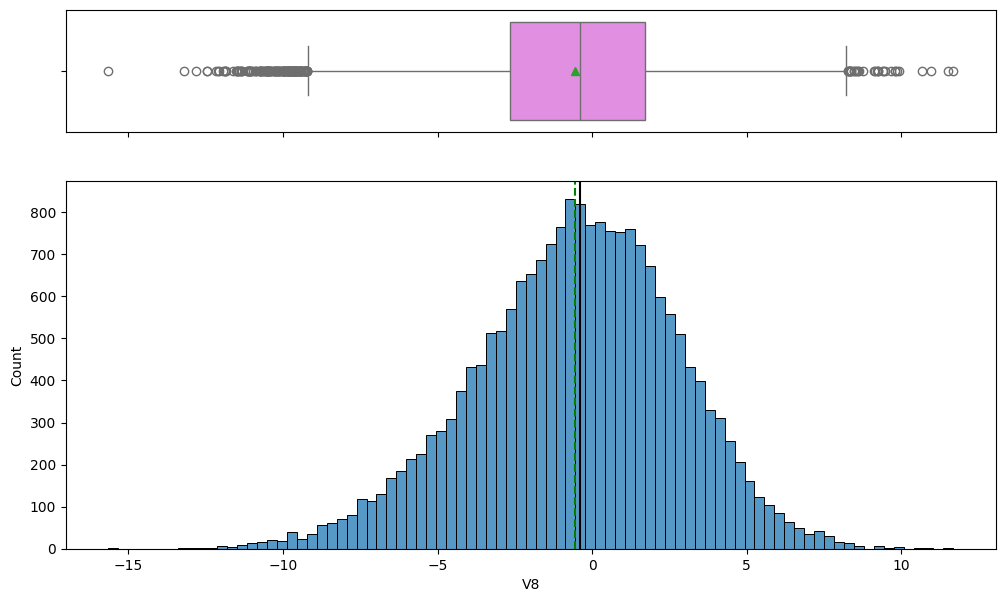

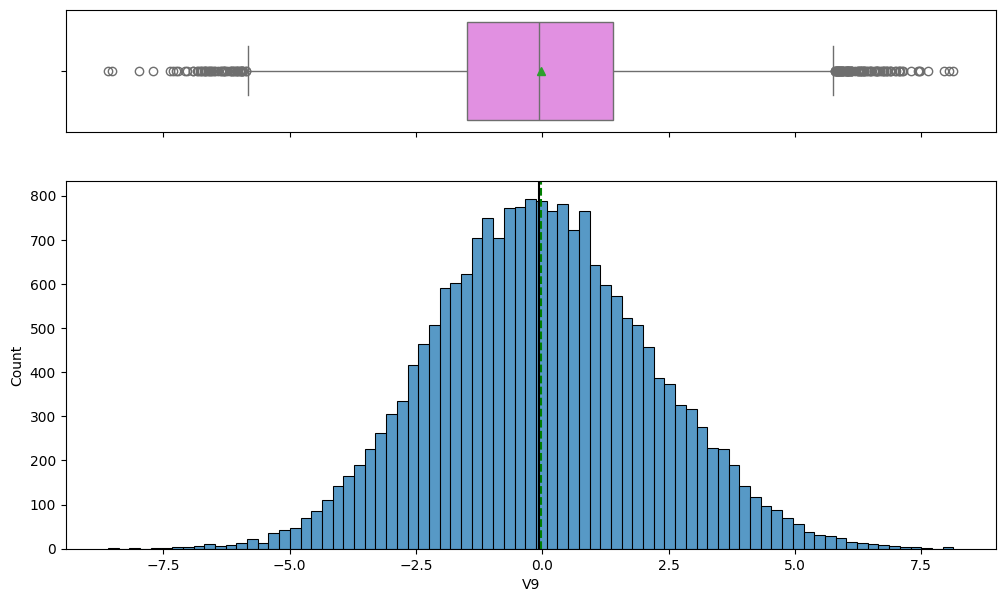

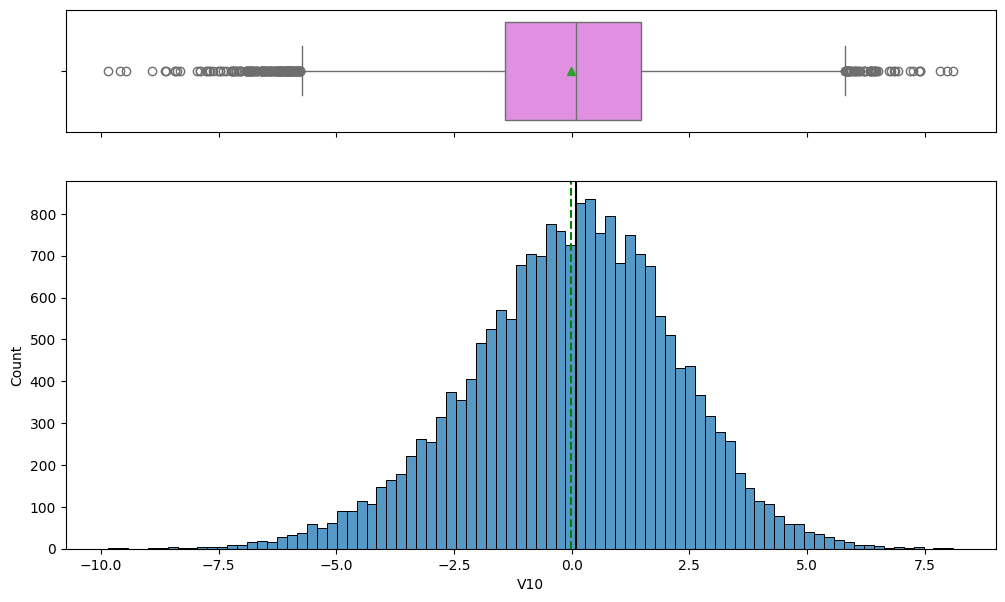

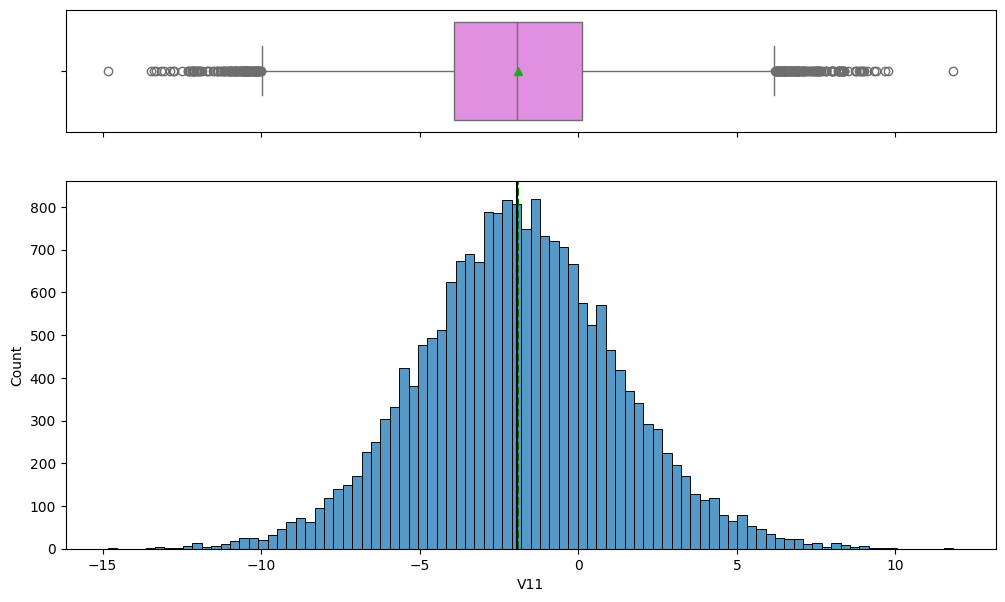

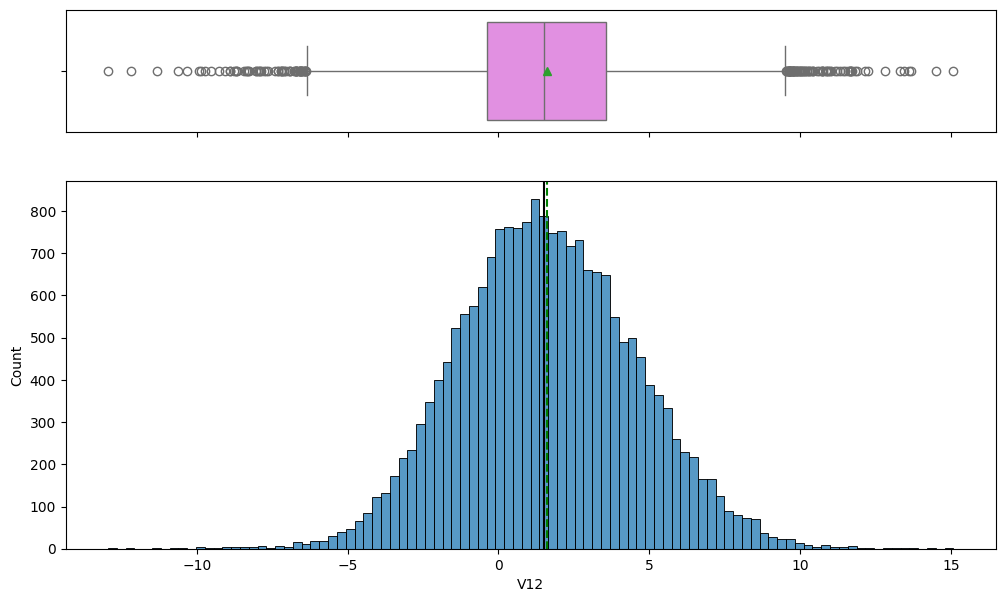

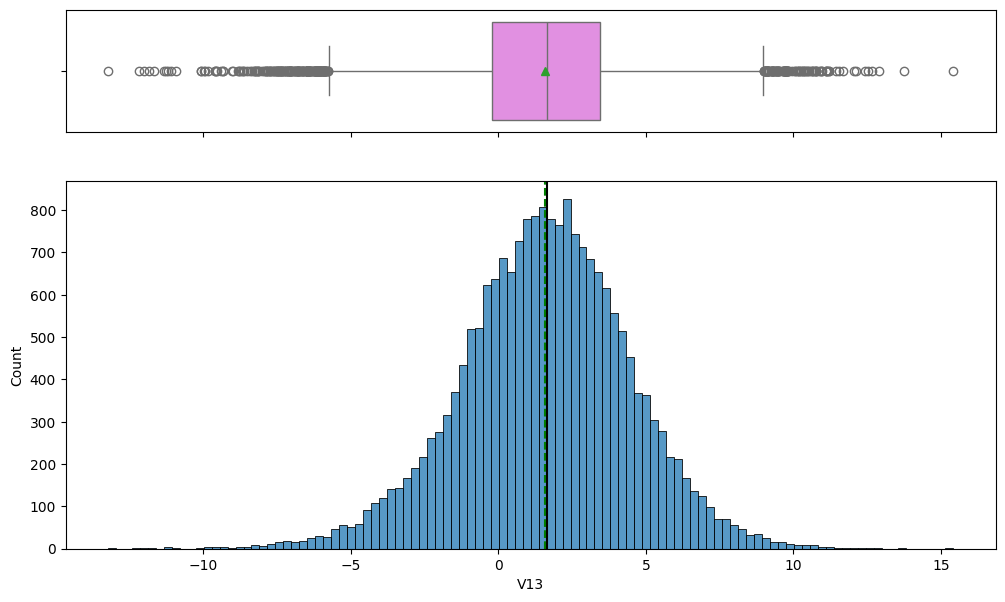

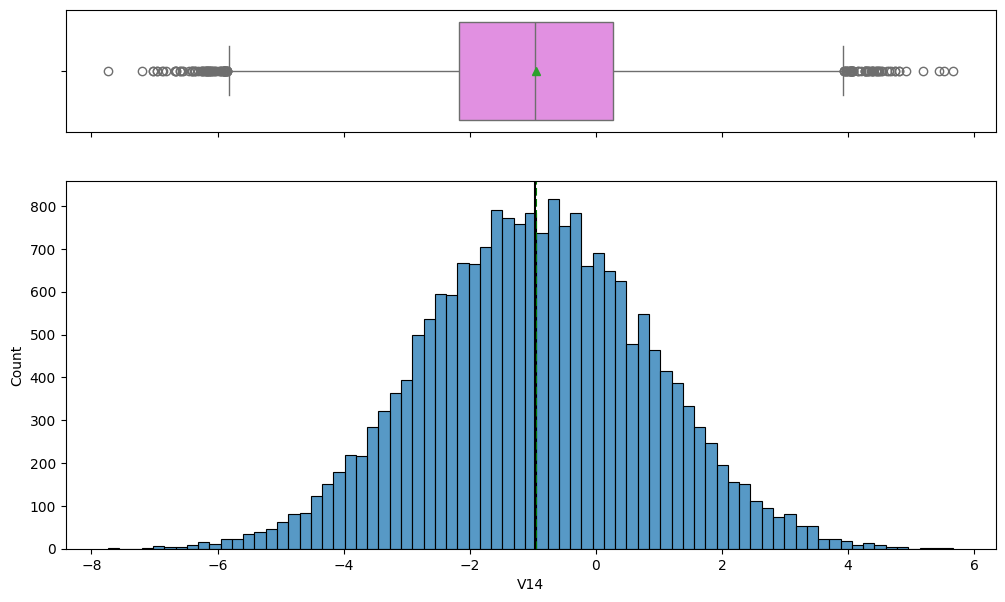

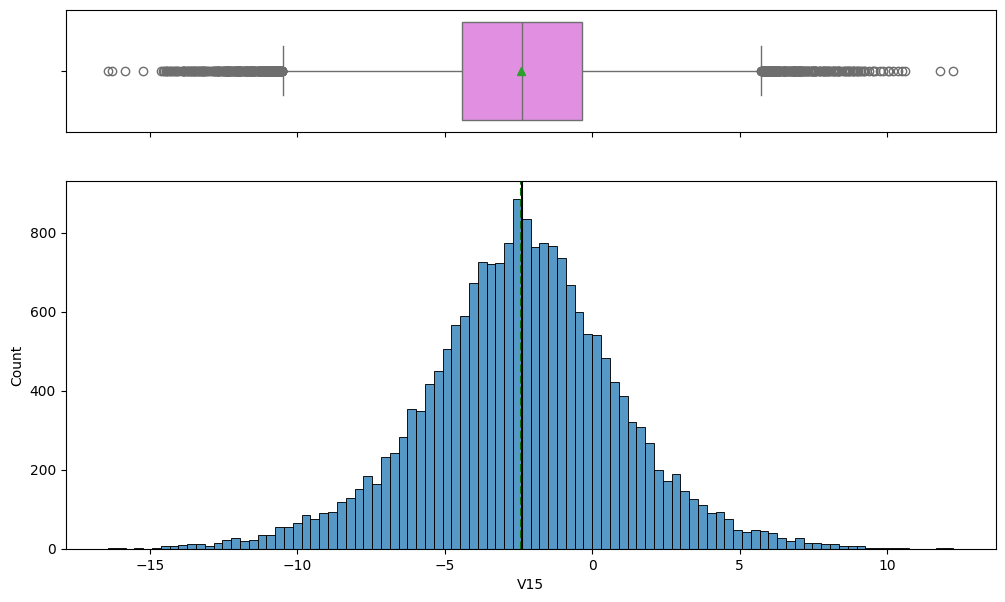

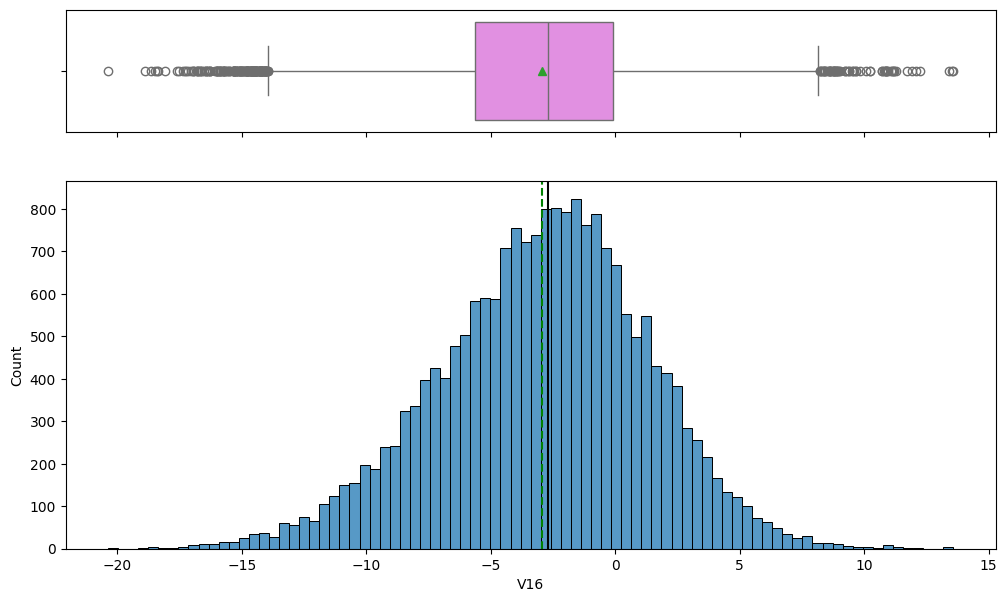

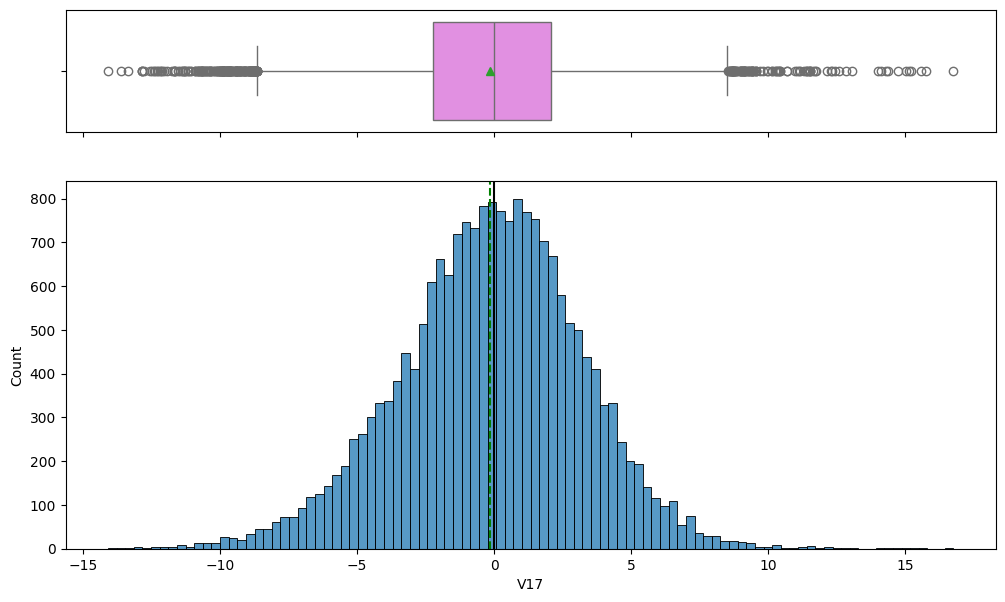

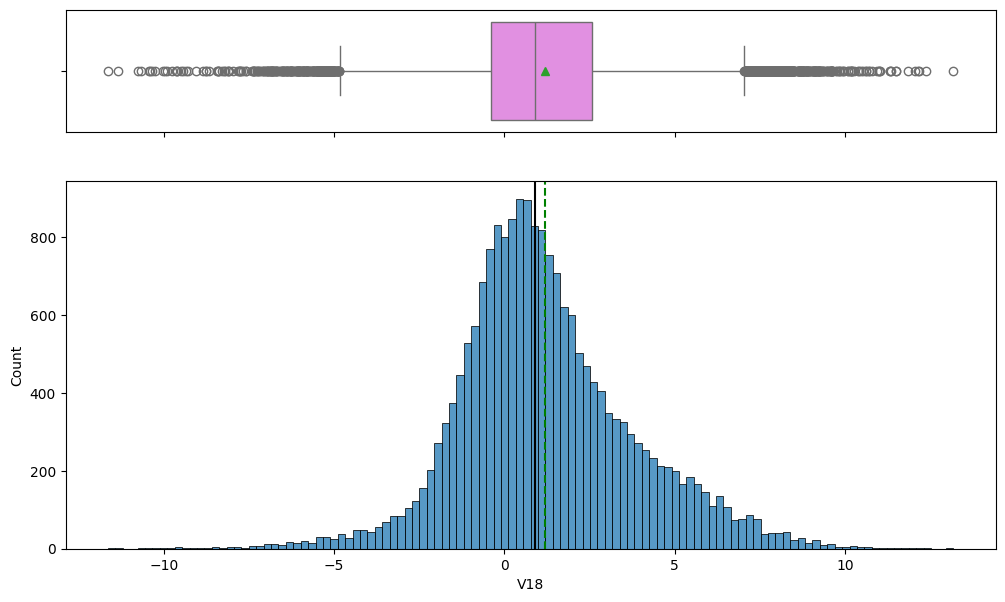

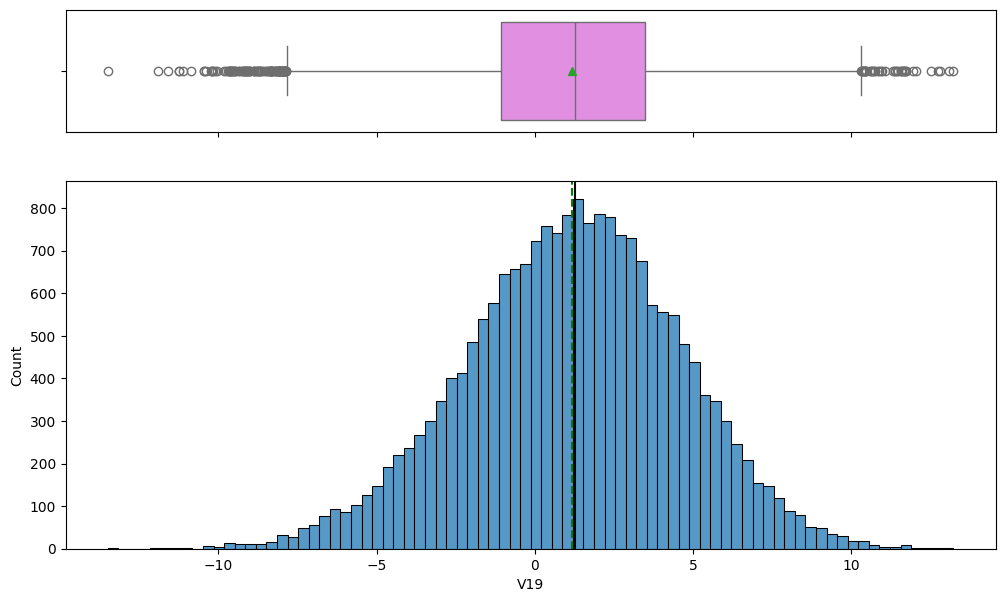

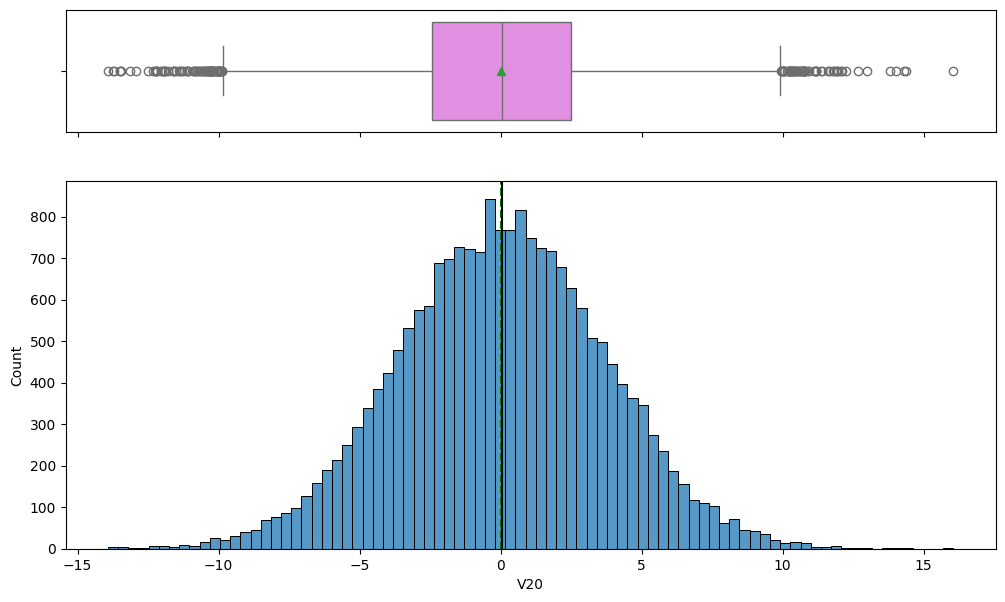

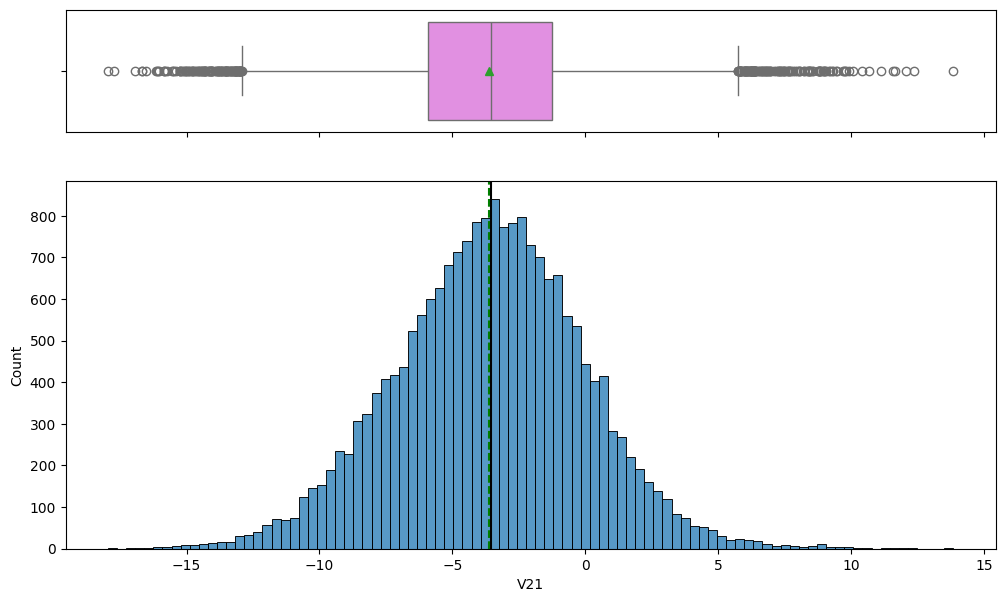

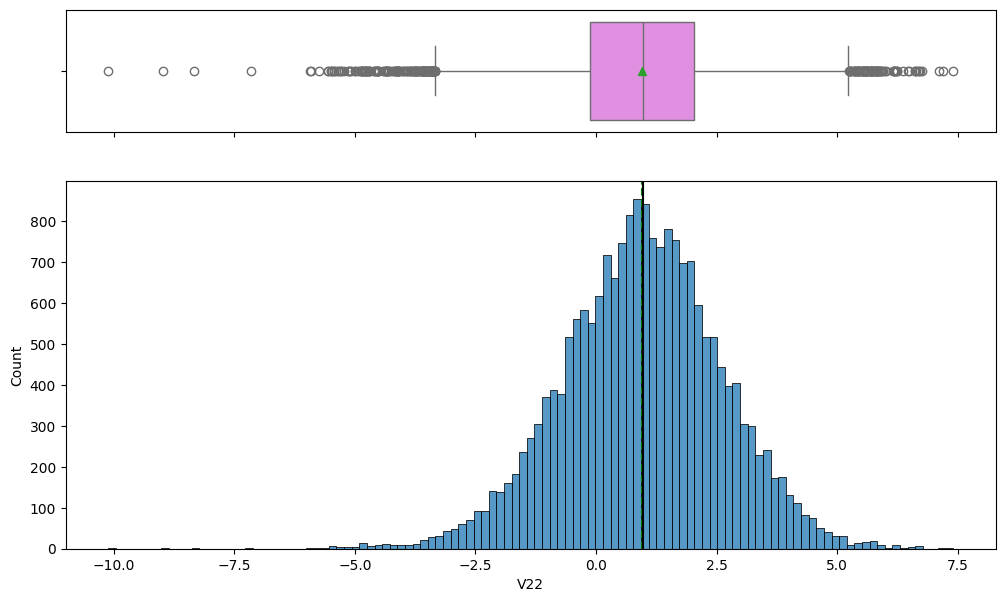

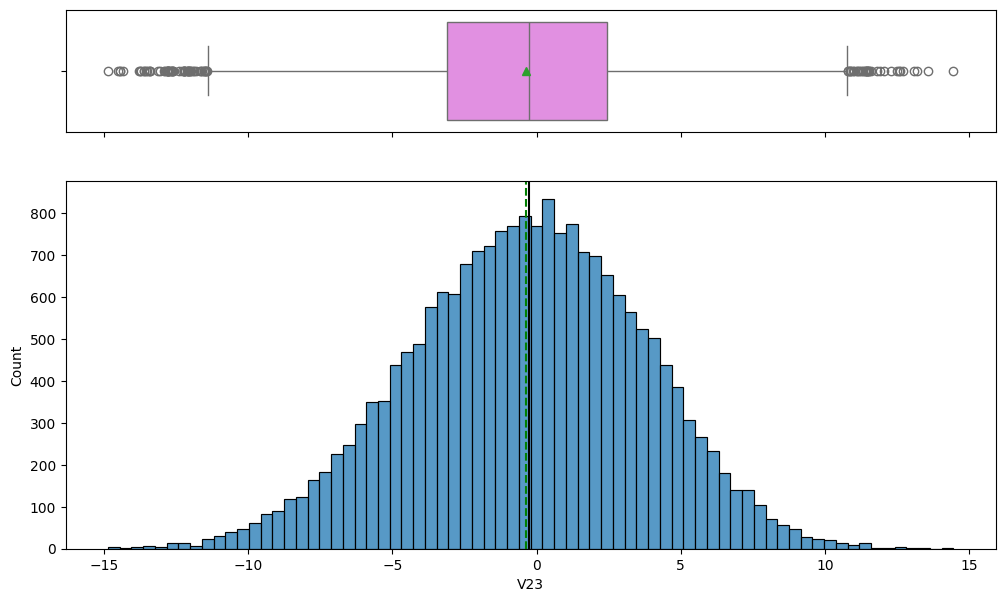

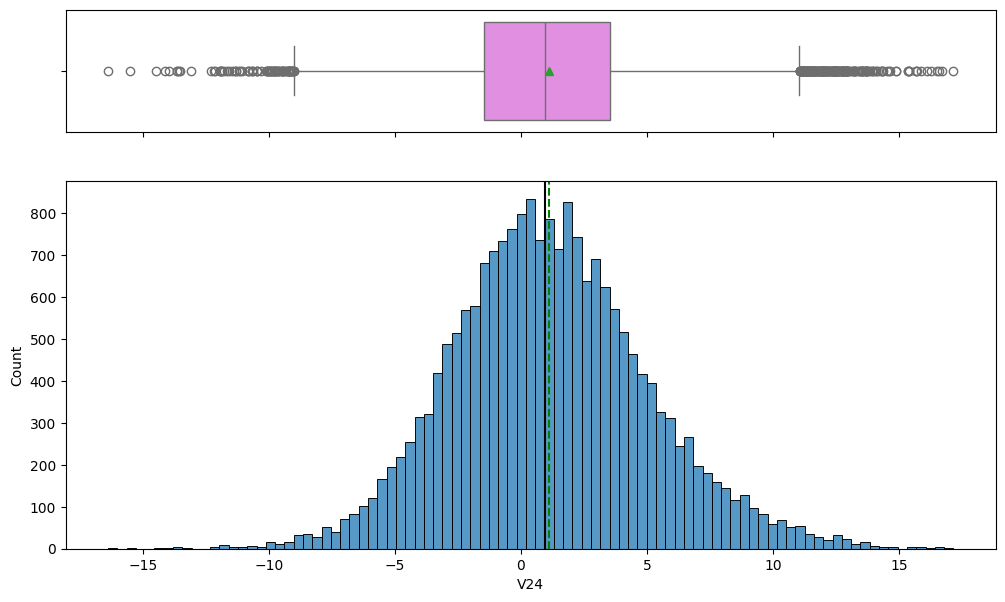

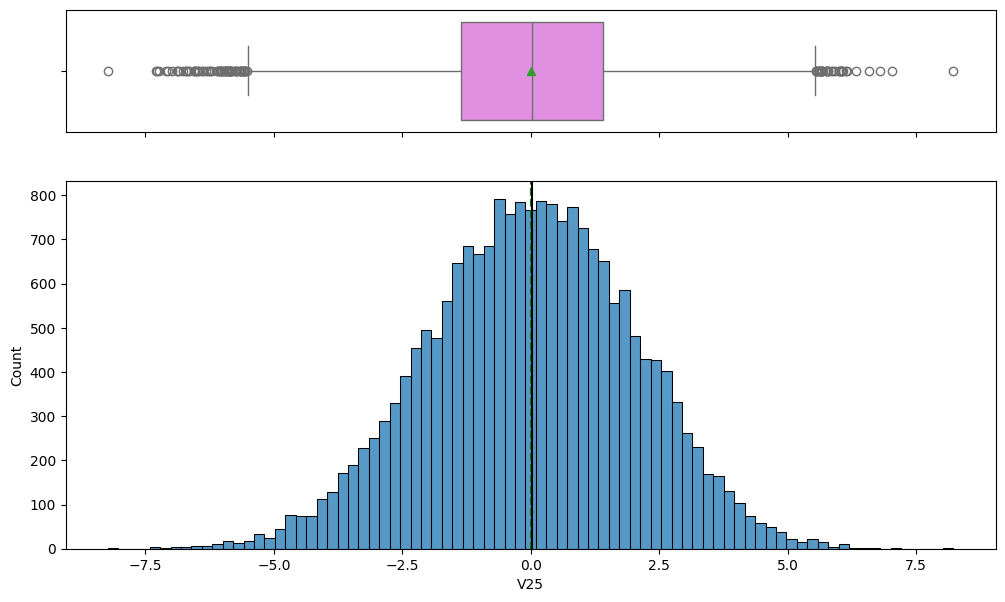

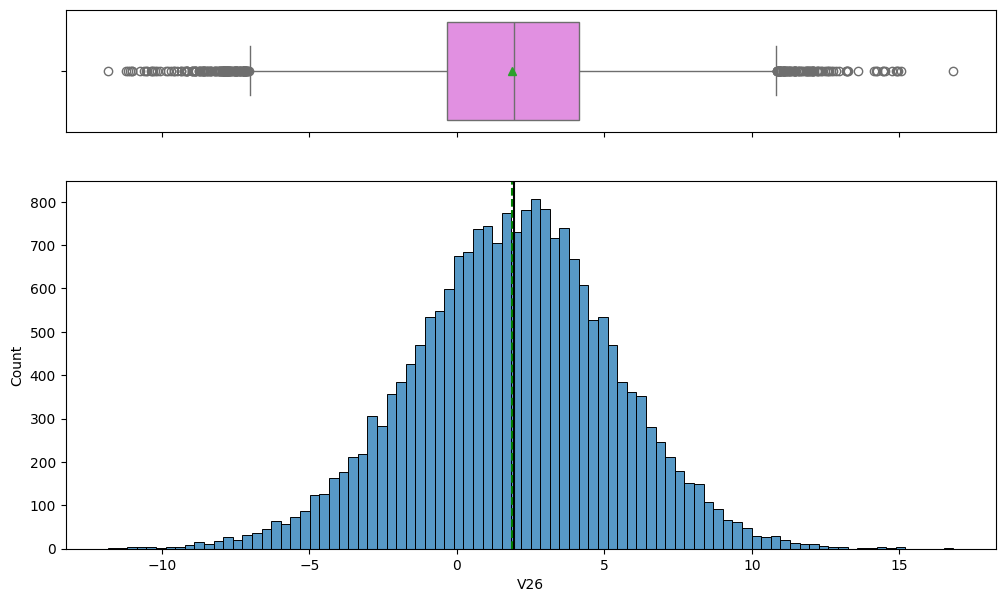

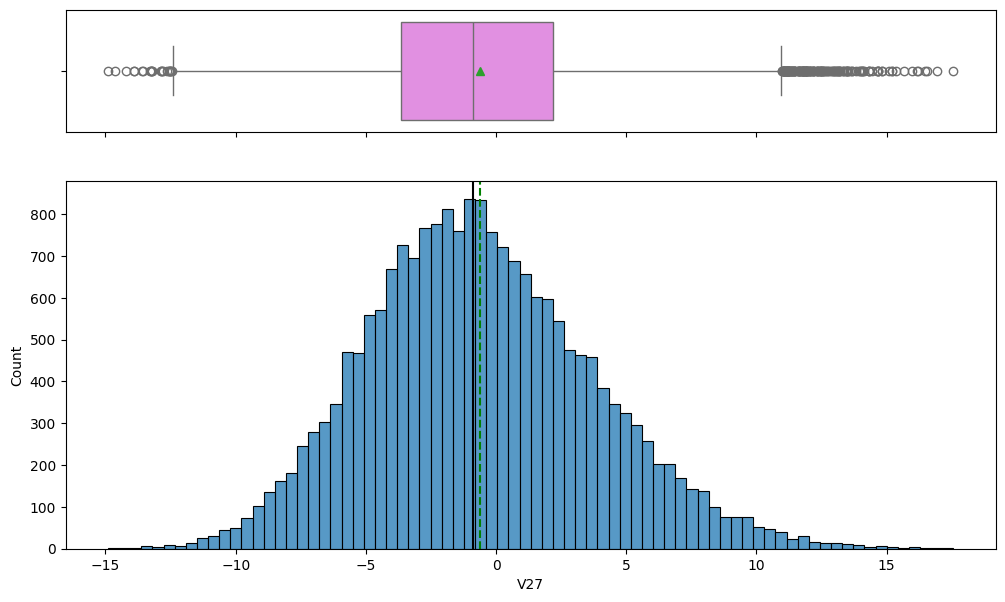

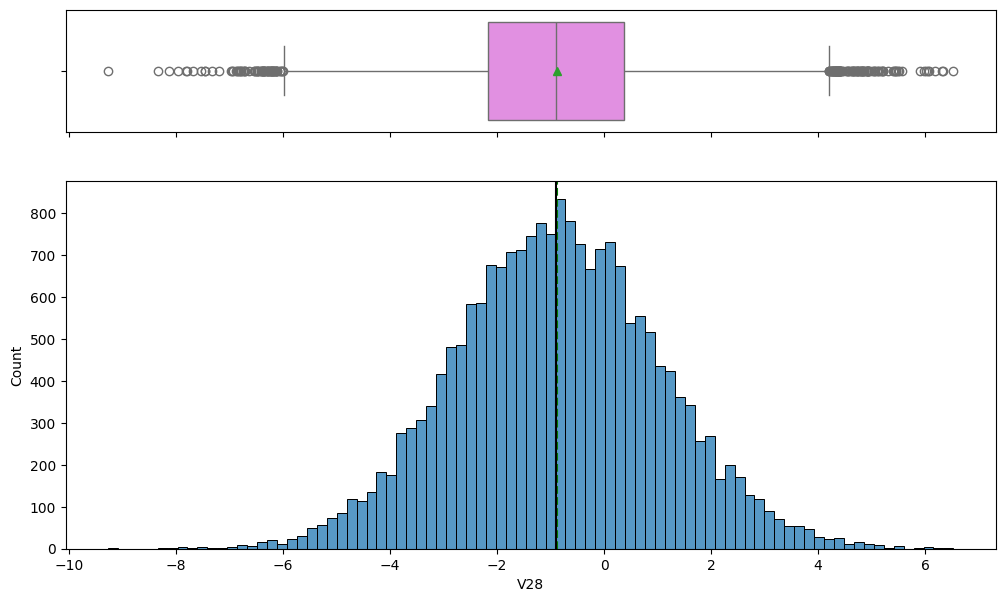

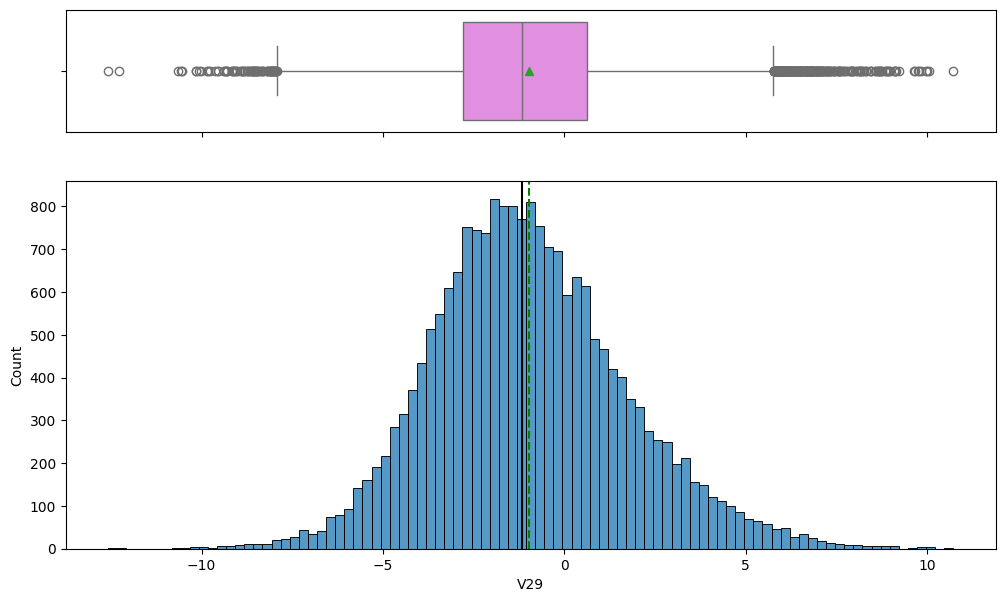

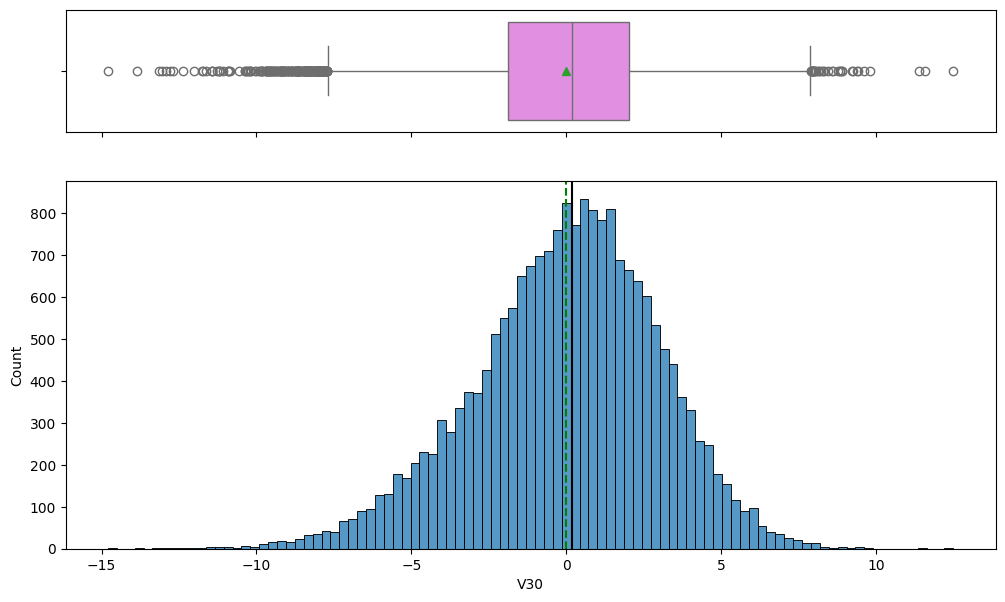

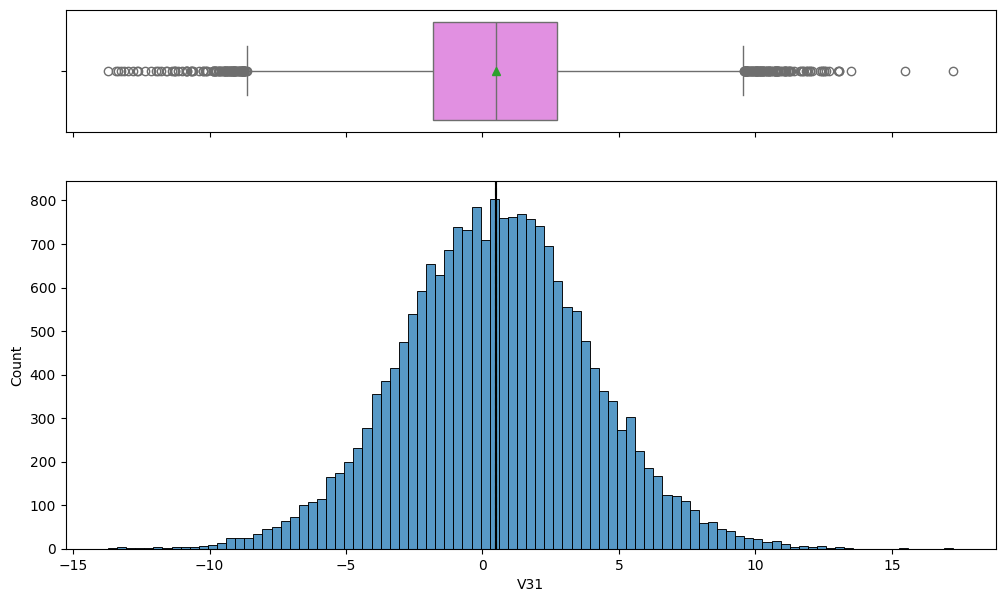

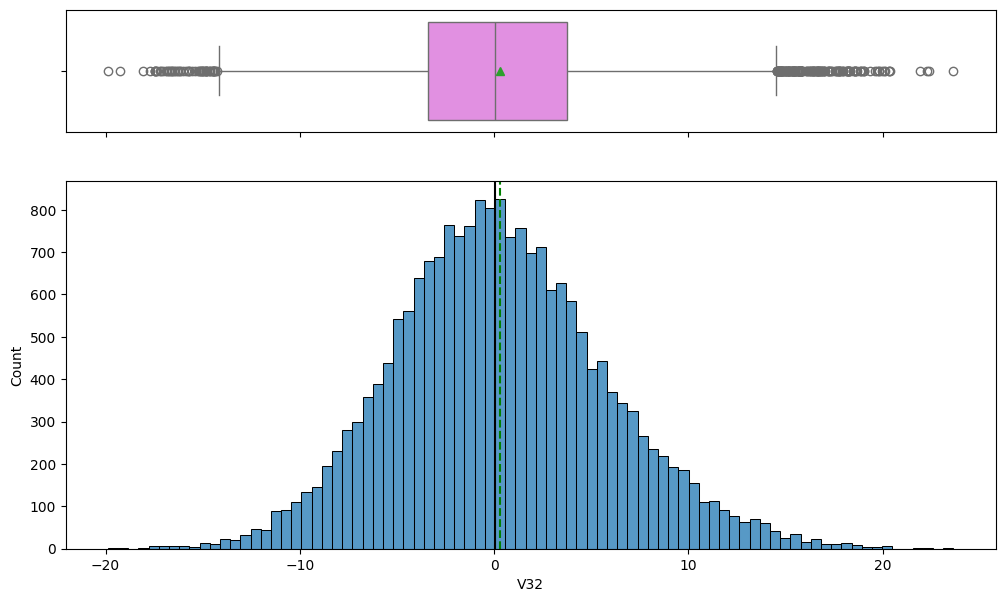

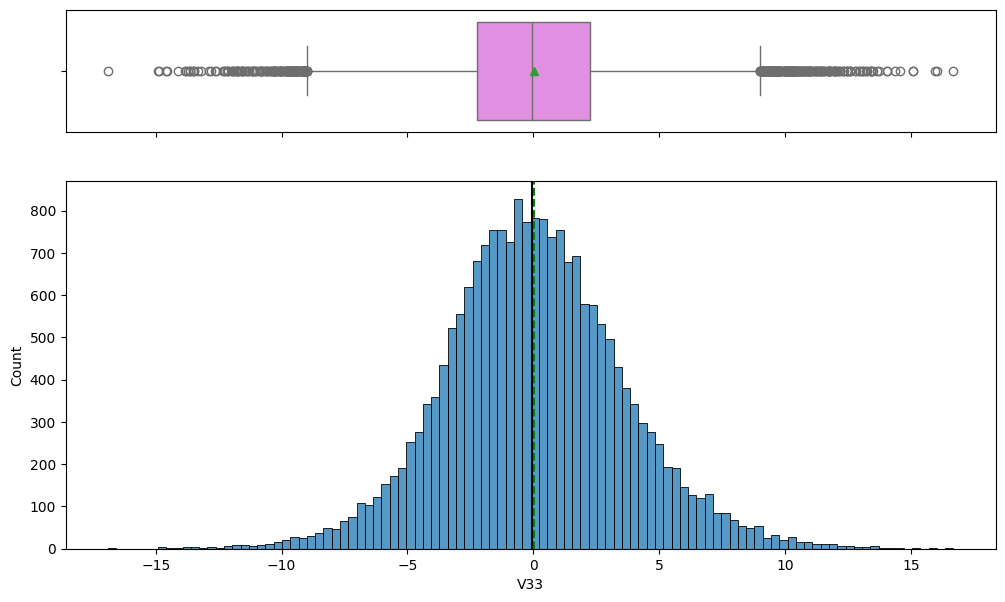

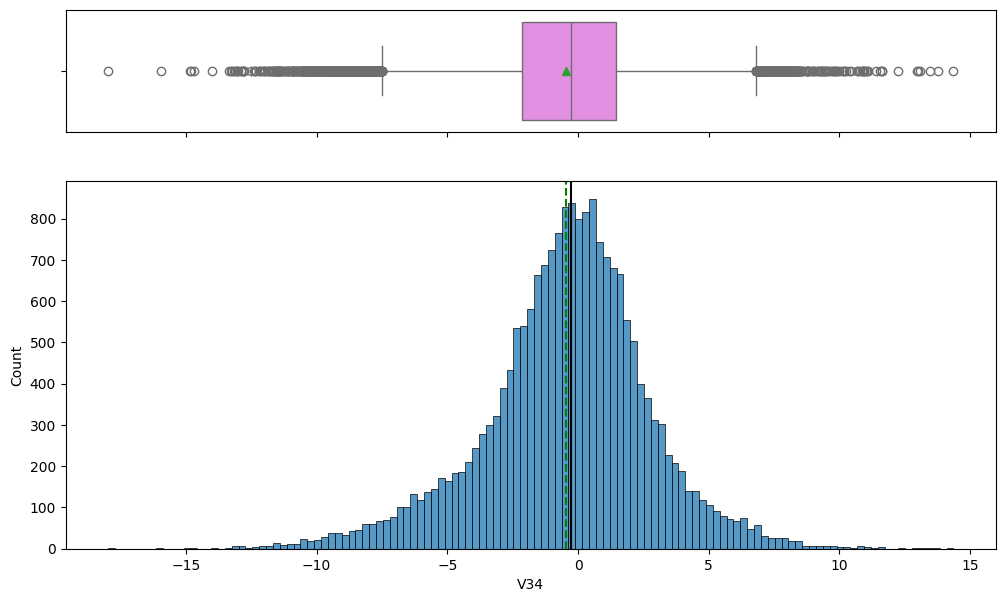

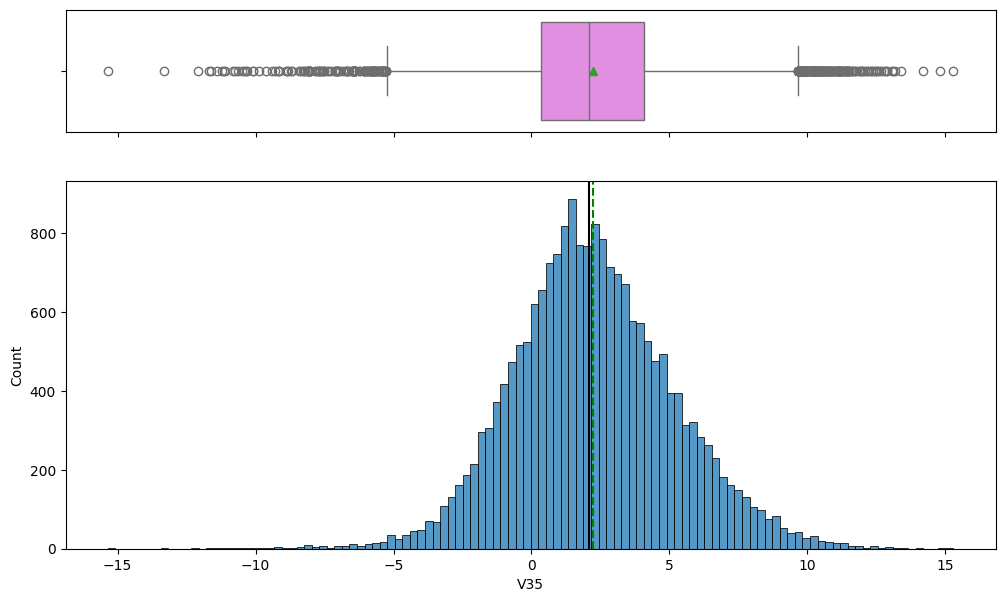

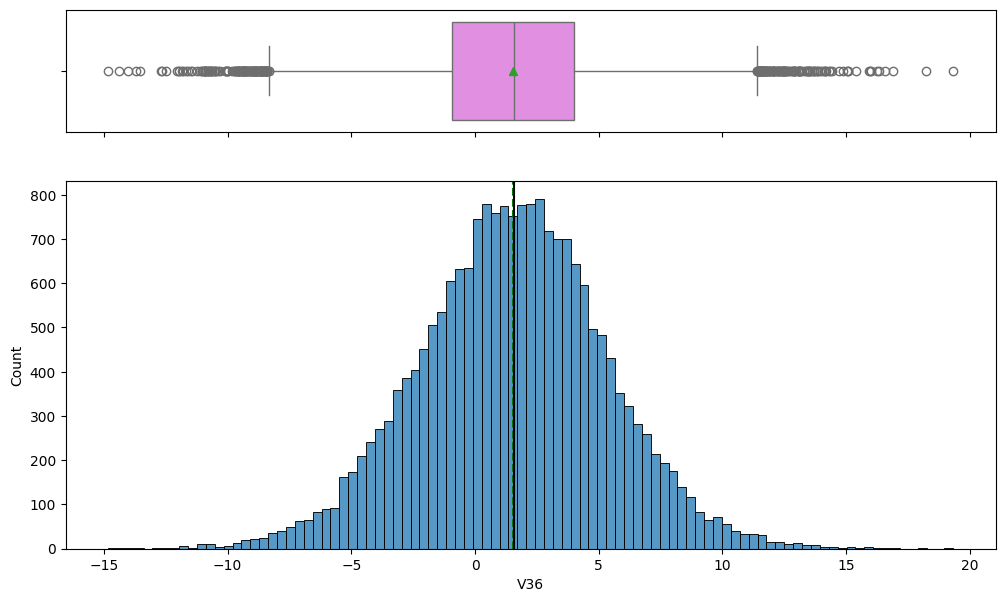

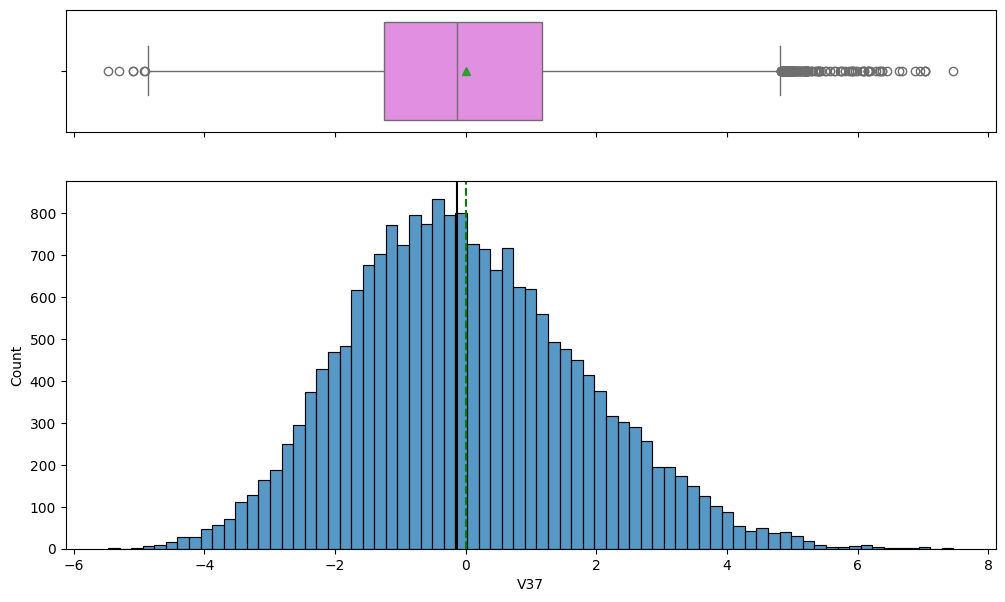

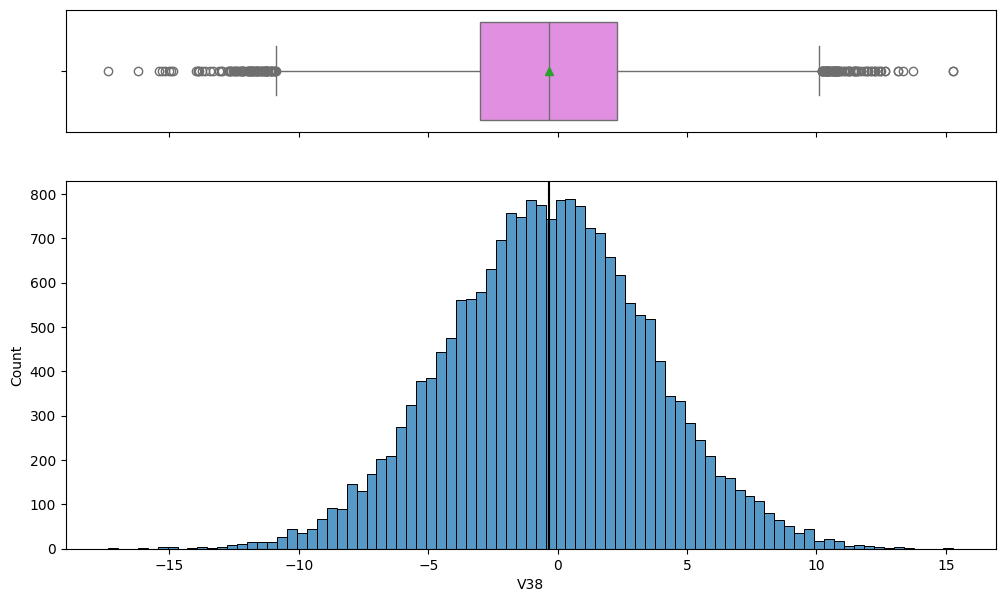

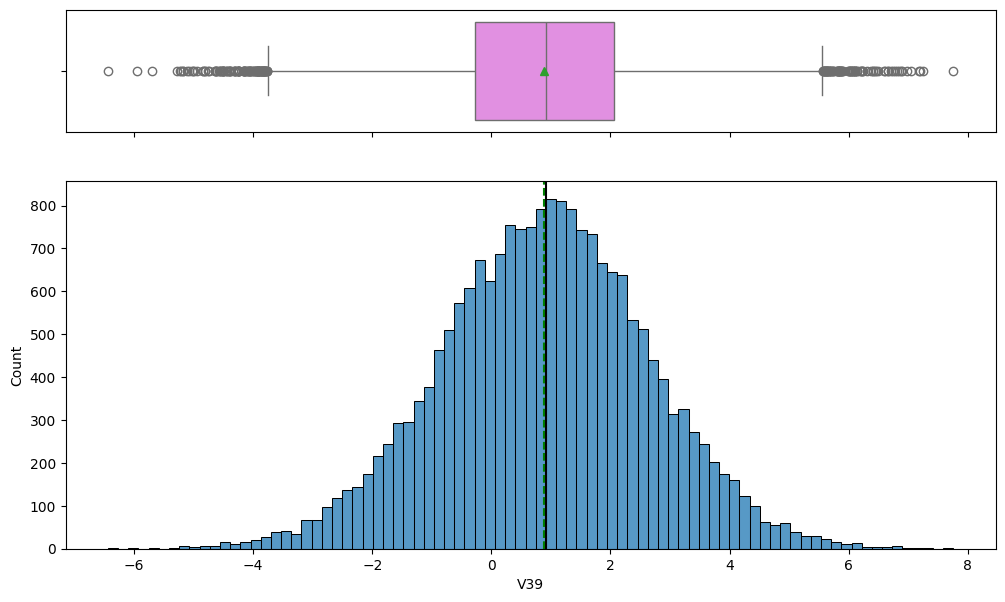

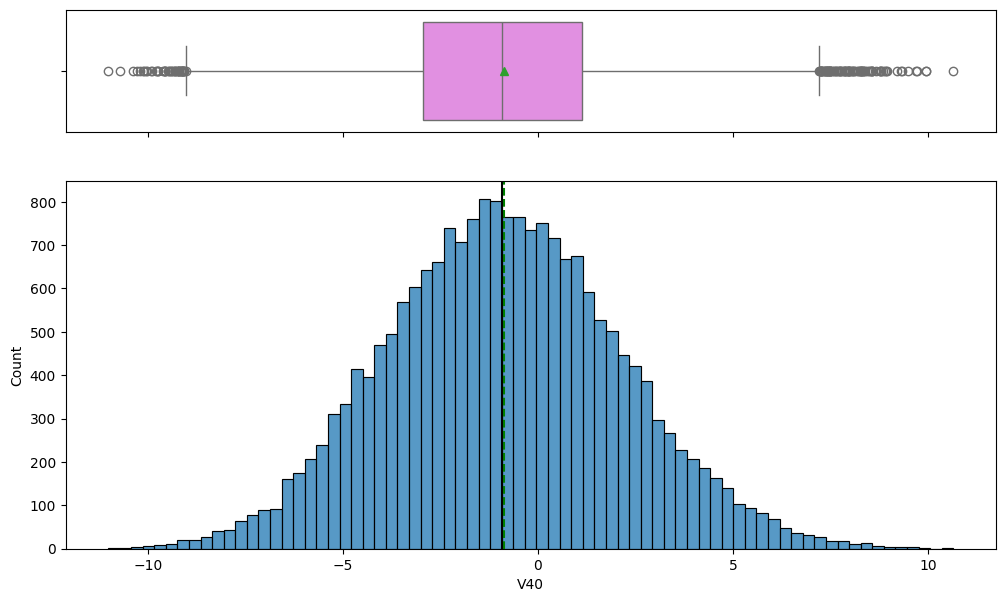

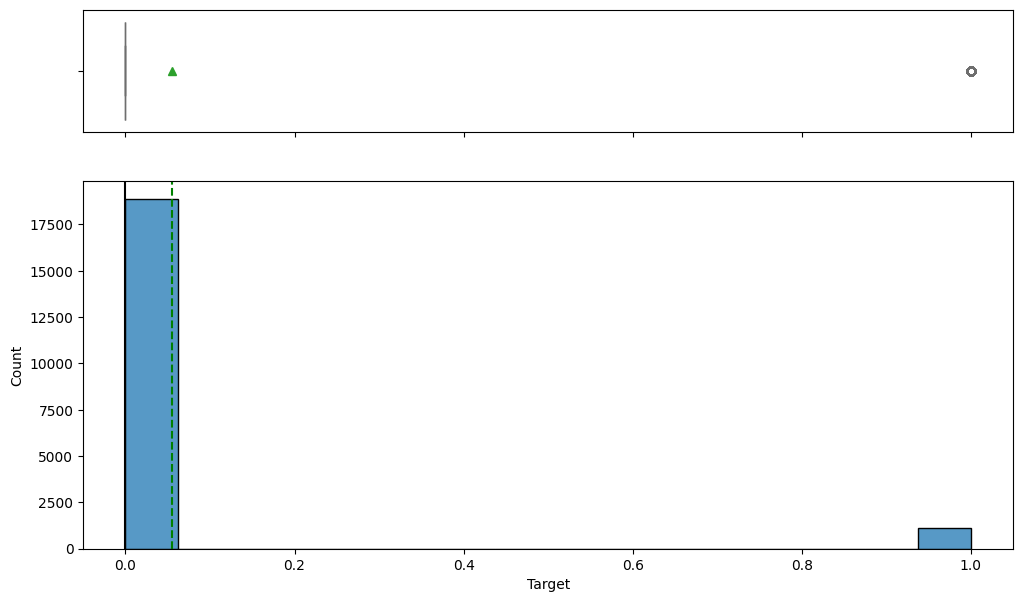

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

- The following features are slightly right skewed with outliers on both sides:
  - V1, V18, V37
- The following features are slightly left skewed, with outliers on both sides:
  - V8, V30, V34
- The class ratio of the target variable is severely imbalanced, as observed previously.
- All other features are approximately normally distributed, with outliers on both sides.

###**Bivariate analysis**

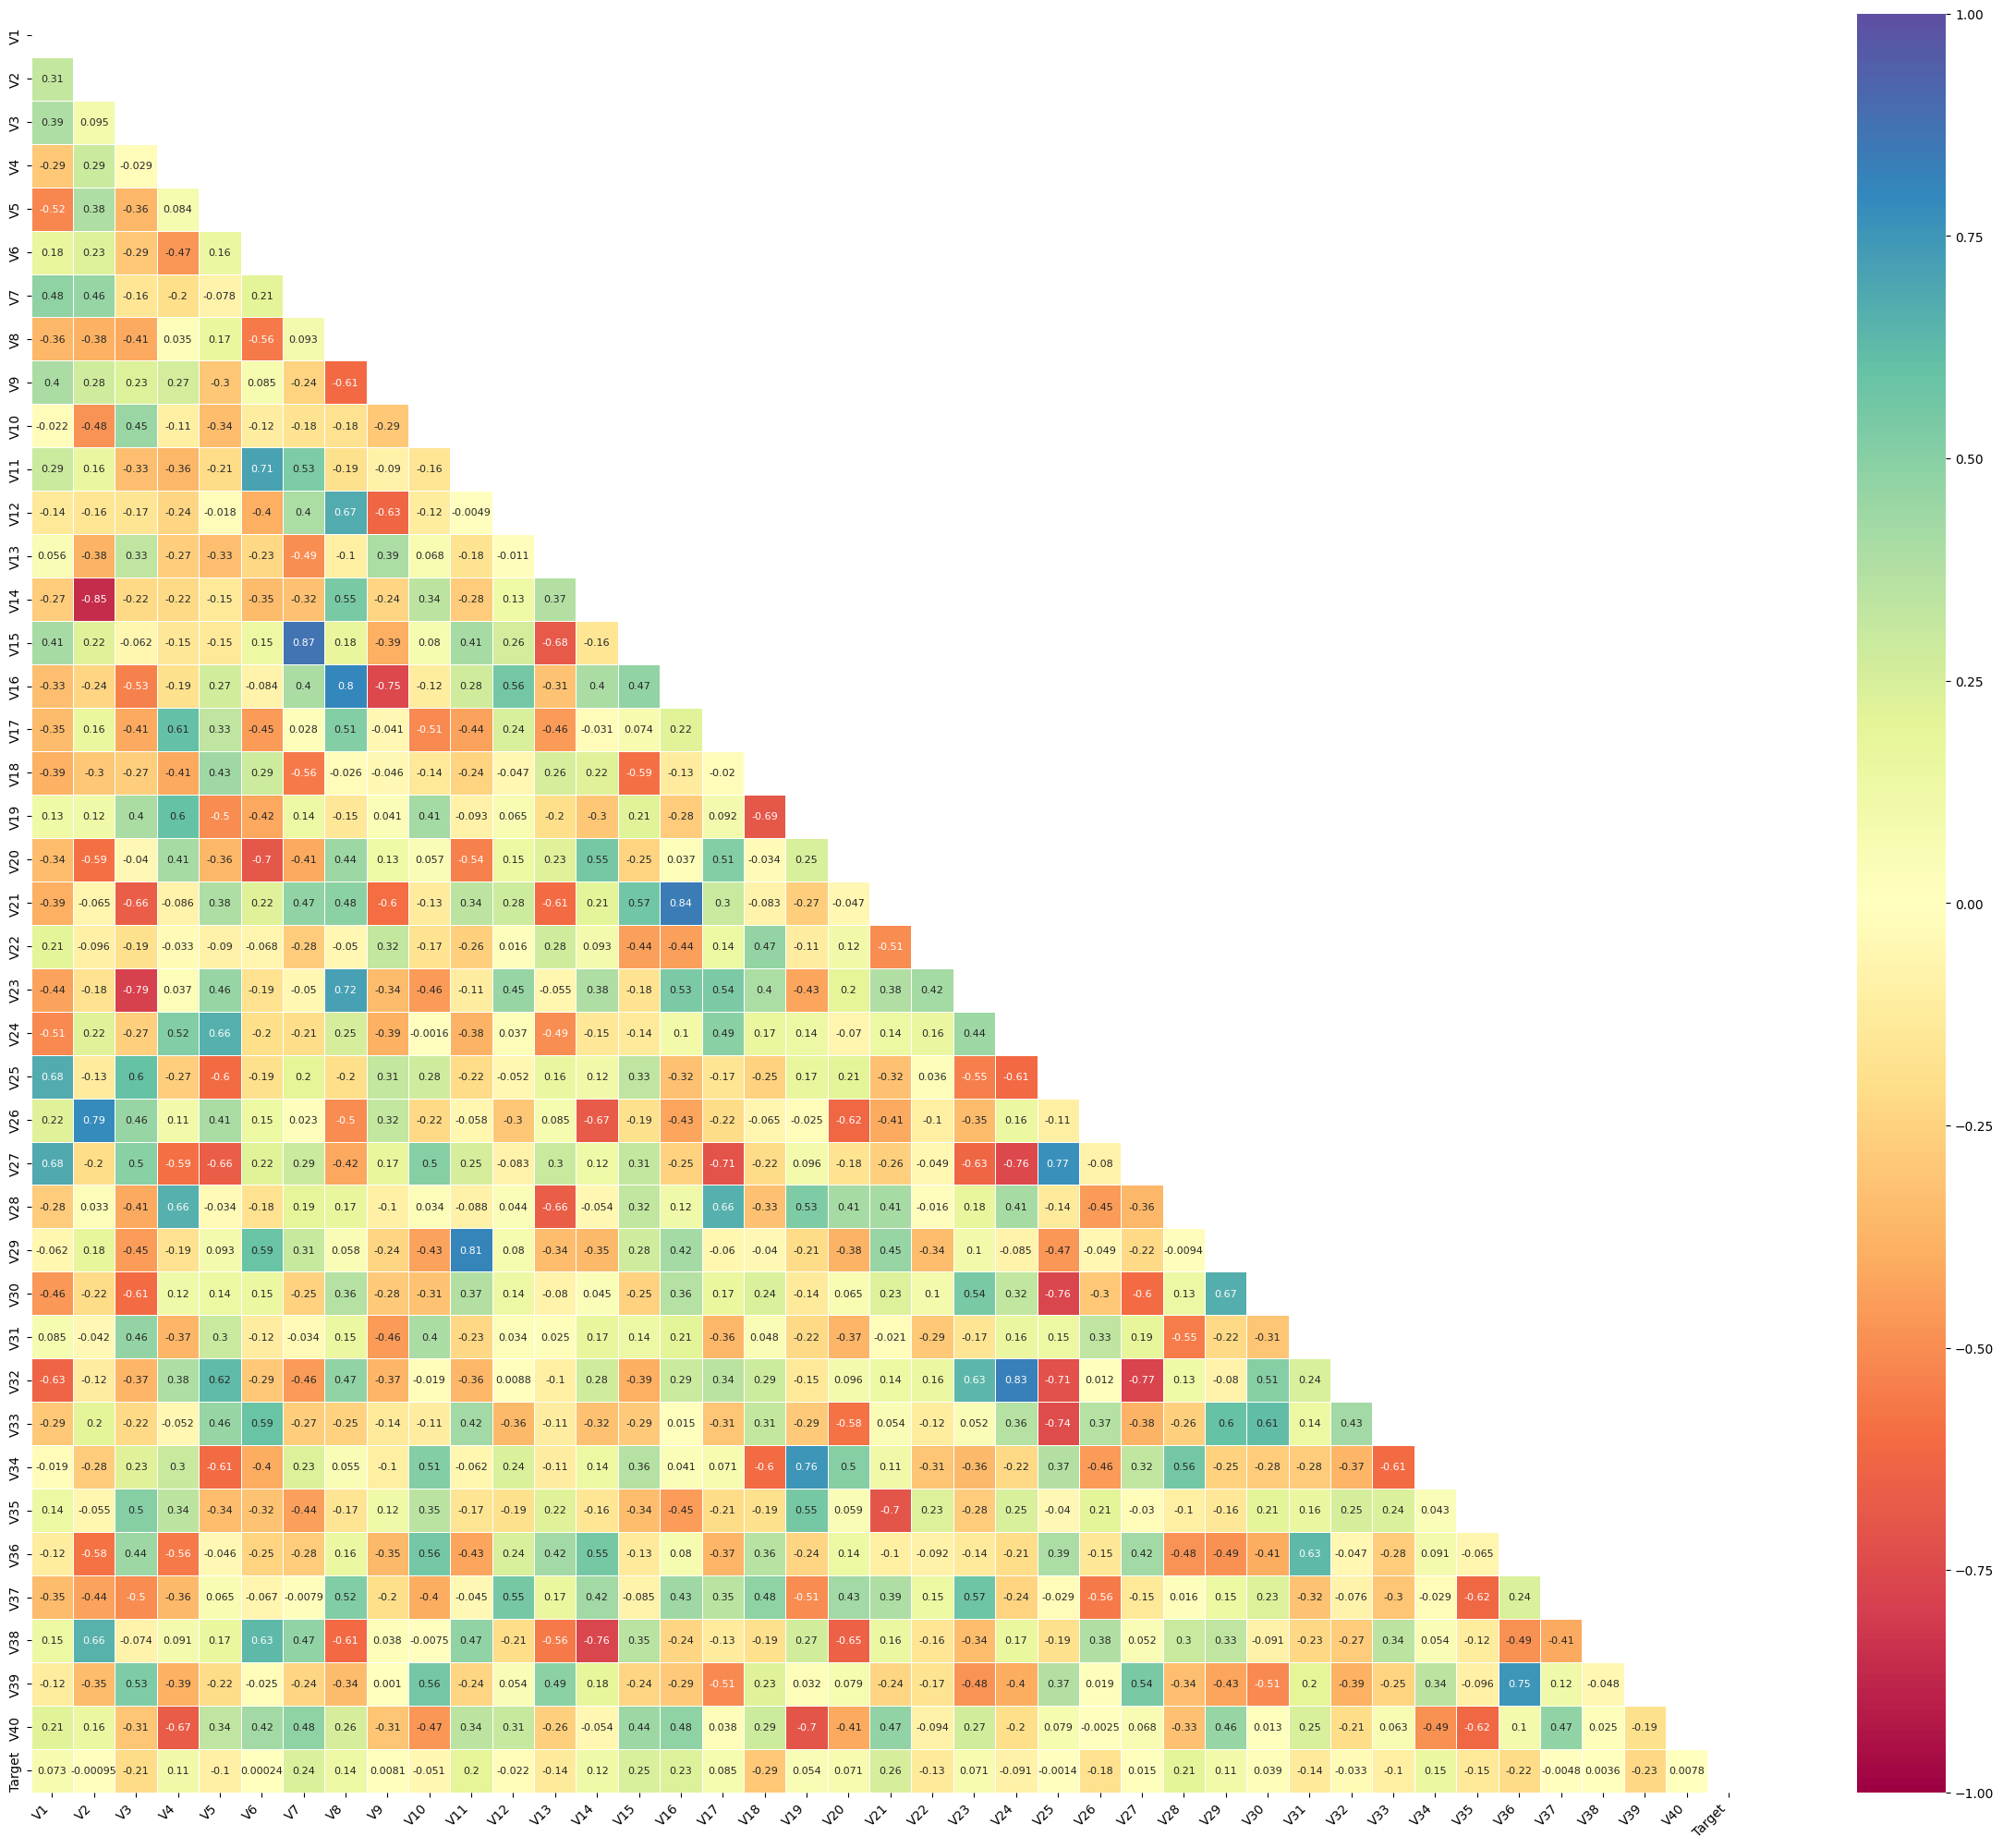

In [ ]:
#Set figure size
plt.figure(figsize=(30, 25))

#Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(),dtype=bool))

#Plot heatmap
sns.heatmap(
    df.corr(),
    mask=mask,
    vmin=-1,
    vmax=1,
    cmap="Spectral",
    fmt=".2g",
    annot=True,
    annot_kws={"size": 8},
    linewidths=0.5,
)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10);  # Adjust y-axis label font size

- There are many features that have notable linear relationships with each other.
- The feature `V27` showed to have the highest quantity of strong linear relationships with other features. These relationships are listed below.
  - Strong negative linear relationships (as one increases, the other decreases):
    - `V27 and V5` (r = -0.66)
    - `V27 and V17` (r = -0.71)
    - `V27 and V24` (r = -0.76)
    - `V27 and V32` (r= -0.77)
  - Strong positive linear relationships (as one increases, the other also increases):
    - `V27 and V1` (r = 0.68)
    - `V27 and V25` (r = 0.77)
- The feature V28 also had a few strong linear relationships that included:
  - `V28 and V4` (r = 0.66)
  - `V28 and V17` (r = 0.66)
  - `V28 and V13` (r = -0.66)
- The features that had the strongest correlation coefficients were as follows:
  - `V15 and V7` (r = 0.87), `V16 and V8` (r = 0.8), `V21 and V16` (r = 0.84), `V29 and V11` (r = 0.81), `V14 and V2` (r = -0.85)
- There is no indication of linear relationships among any feature and the target variable.
- Notable linear relationships not already mentioned are as follows:
  - **Positive linear relationships:** `V11 and V6 `(r=0.71), `V12 and V8 `(r=0.67), `V23 and V8` (r=0.72), `V24 and V5` (r=0.66), `V25 and V1` (r=0.68), `V26 and V2` (r=0.79), `V30 and V29` (r=0.67), `V34 and V19` (r=0.76), `V38 and V2` (r = 0.66), `V39 and V36` (r= 0.75)
  - **Negative linear relationships:**
  - `V15 and V13` (r = -0.68),` V16 and V8` (-0.75), `V19 and V18` (r = -0.69), `V20 and V6` (r = -0.7), `V21 and V3` (r = -0.66), `V23 and V3` (r = -0.79), `V26 and V14` (r = -0.67), `V15 and V13` (r = -0.68) , `V16 and V8` (-0.75), `V19 and V18` (r = -0.69), `V20 and V6` (r = -0.7), `V21 and V3` (r = -0.66), `V23 and V3` (r = -0.79), `V26 and V14` (r = -0.67)



**We will use the following function to compare all predictors with the target variable.**

In [ ]:
#Function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="colorblind")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="colorblind",
    )

    plt.tight_layout()
    plt.show()

**Here, all independent features will be compared to the target variable.**

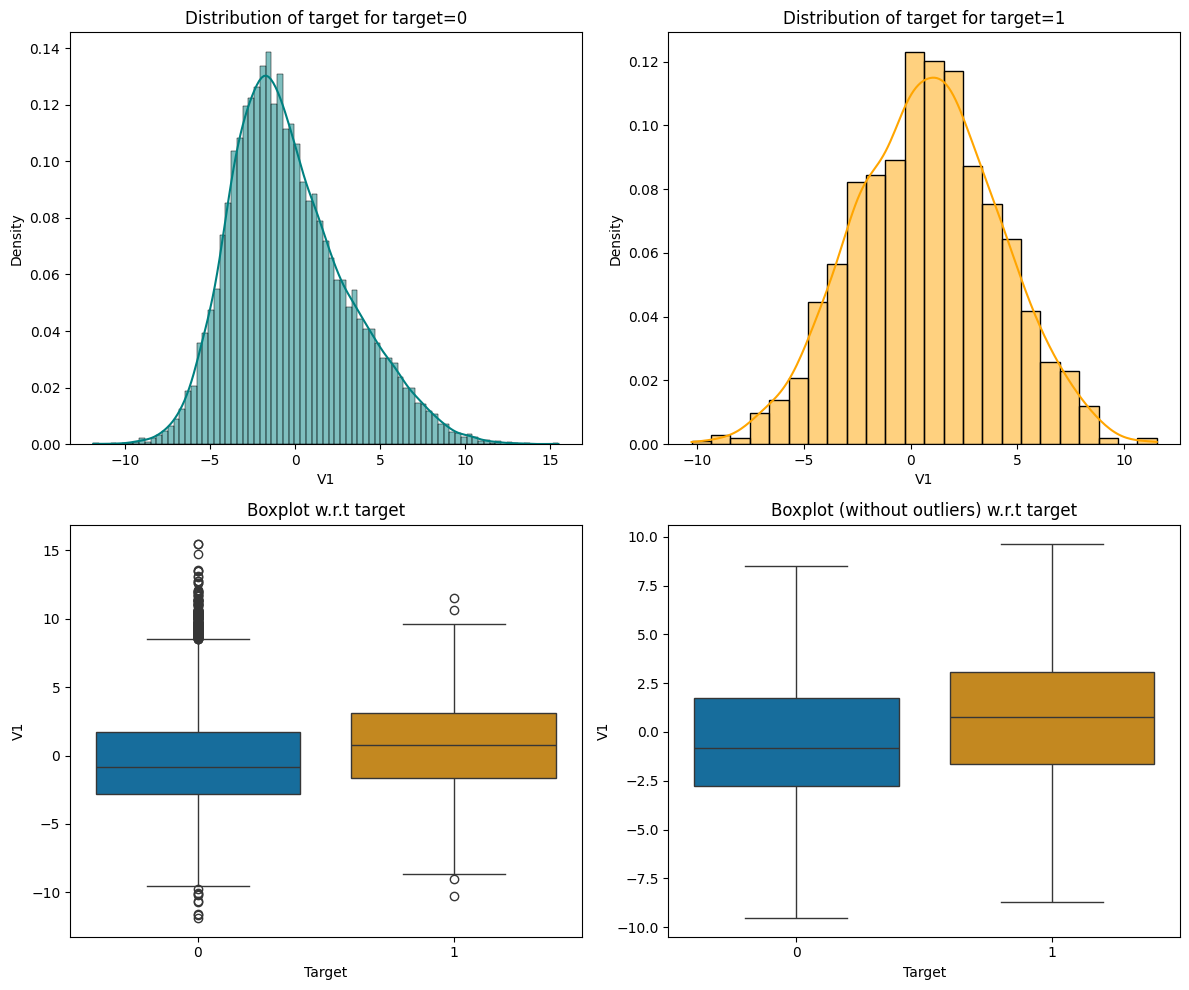

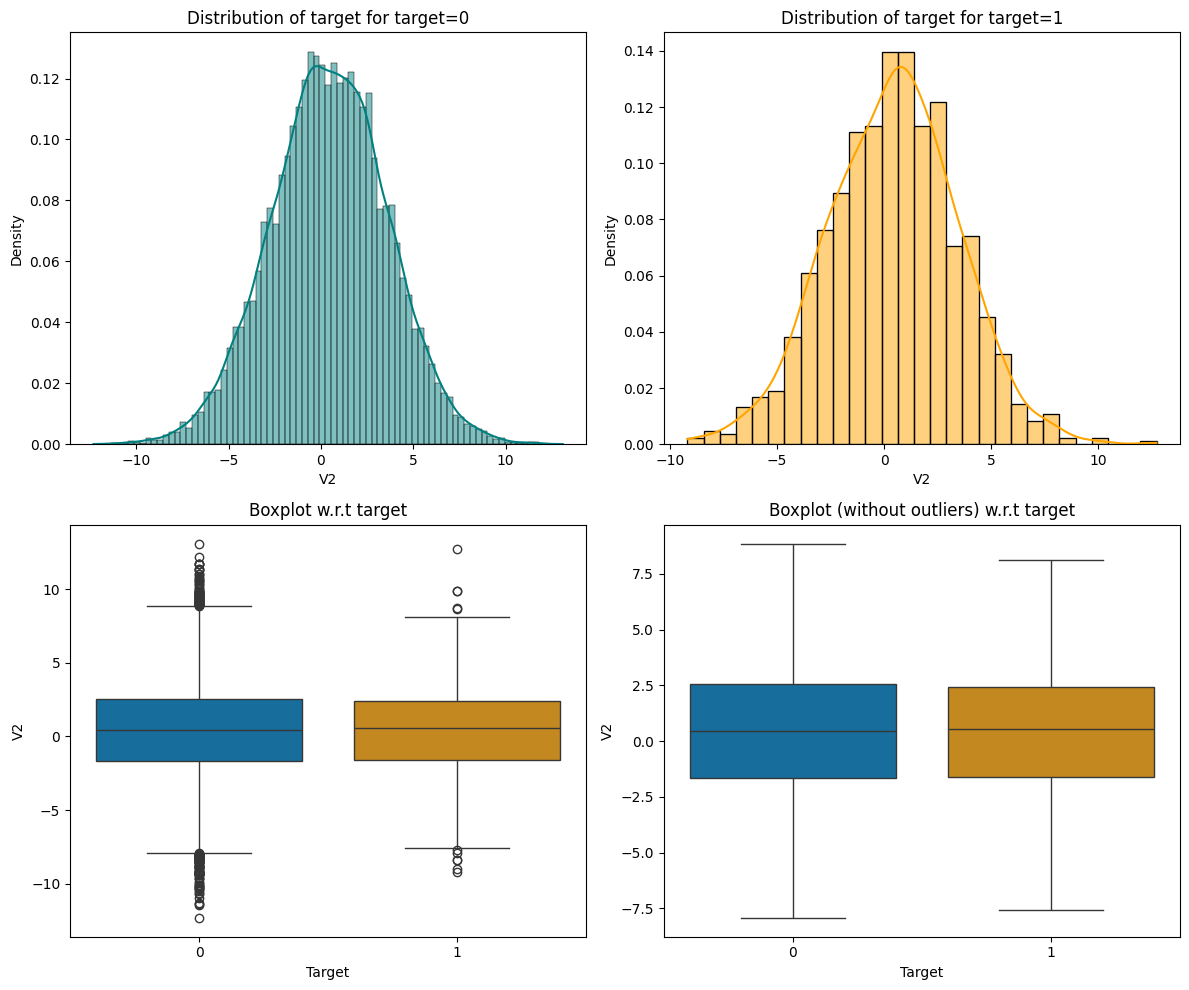

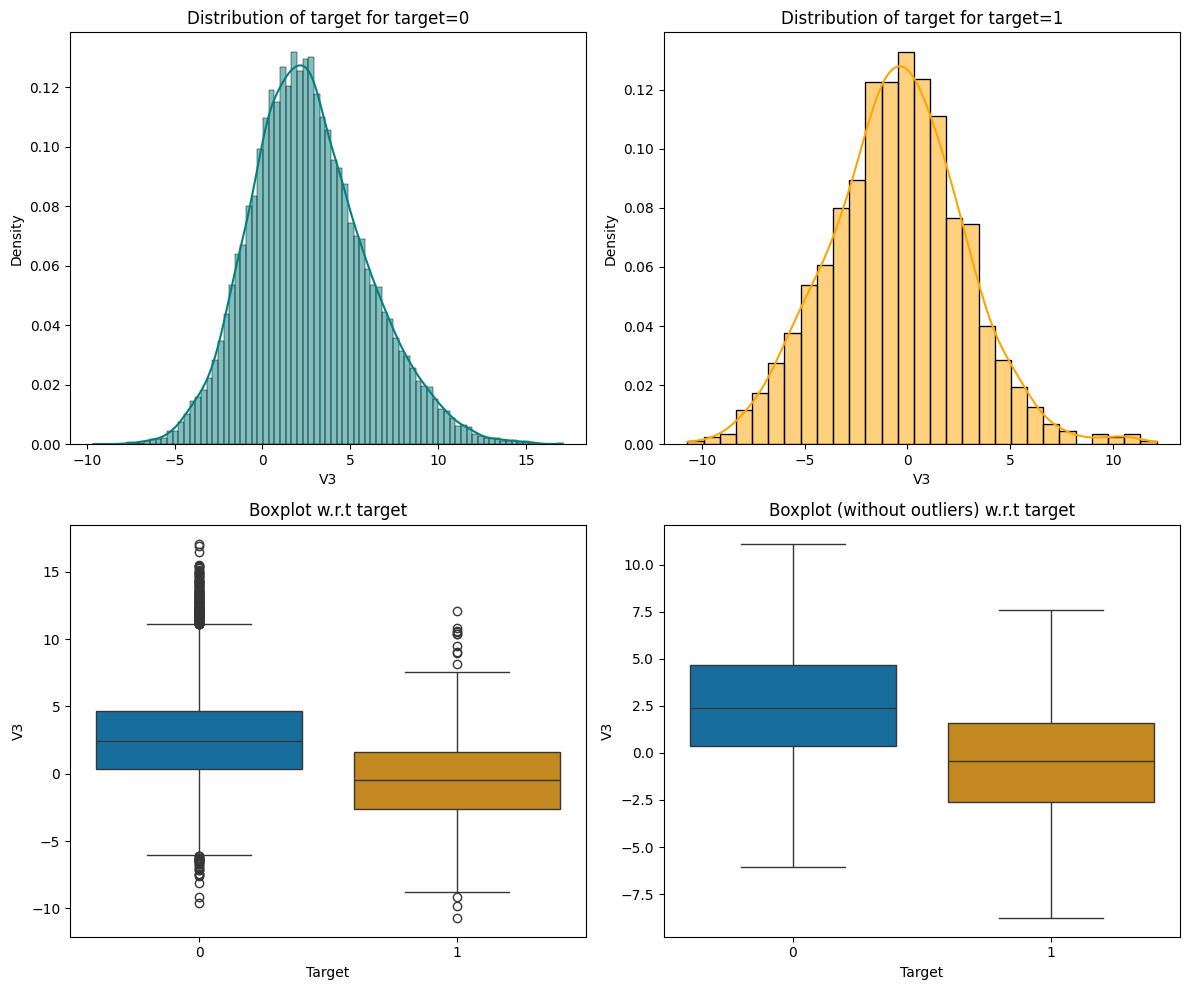

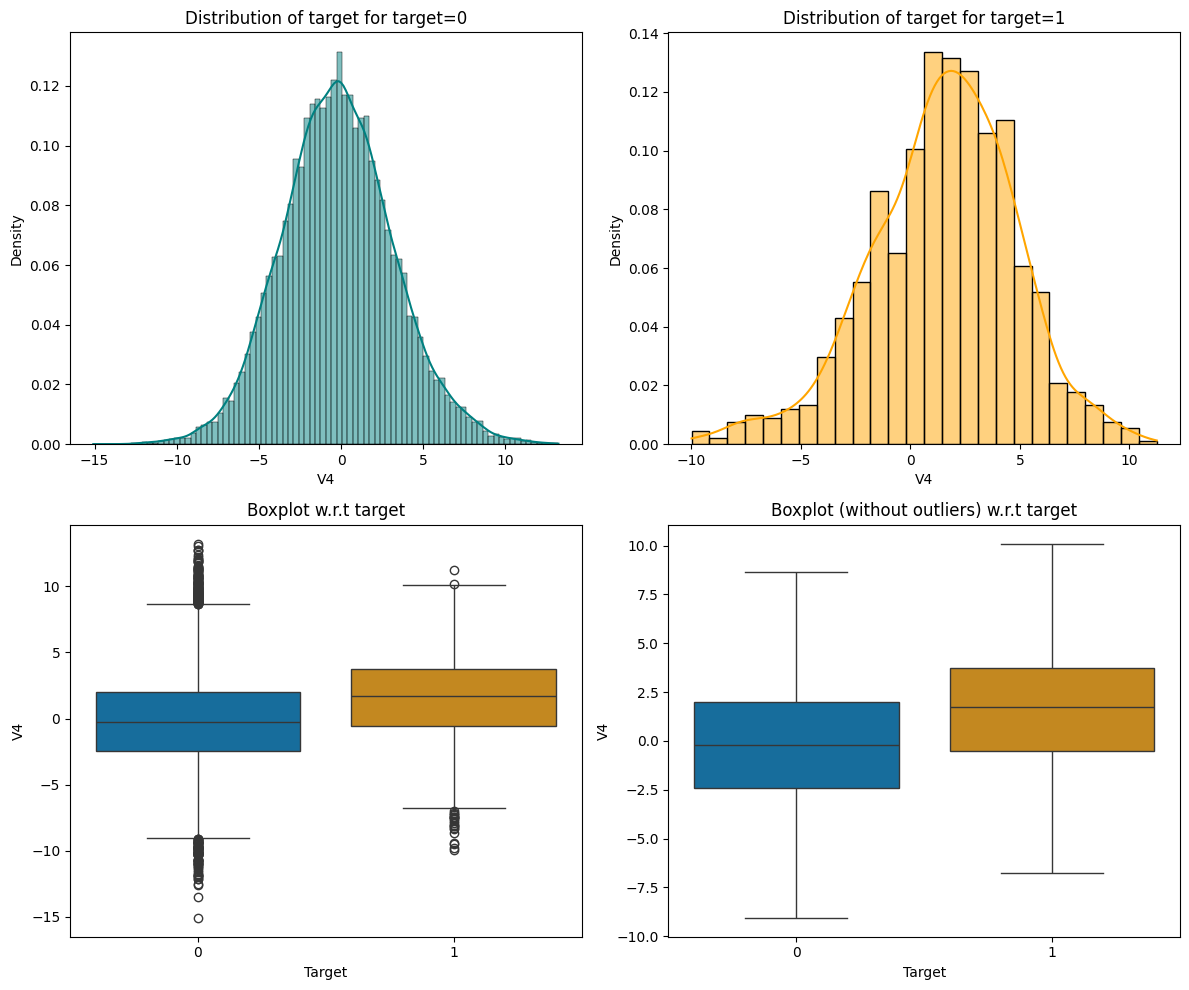

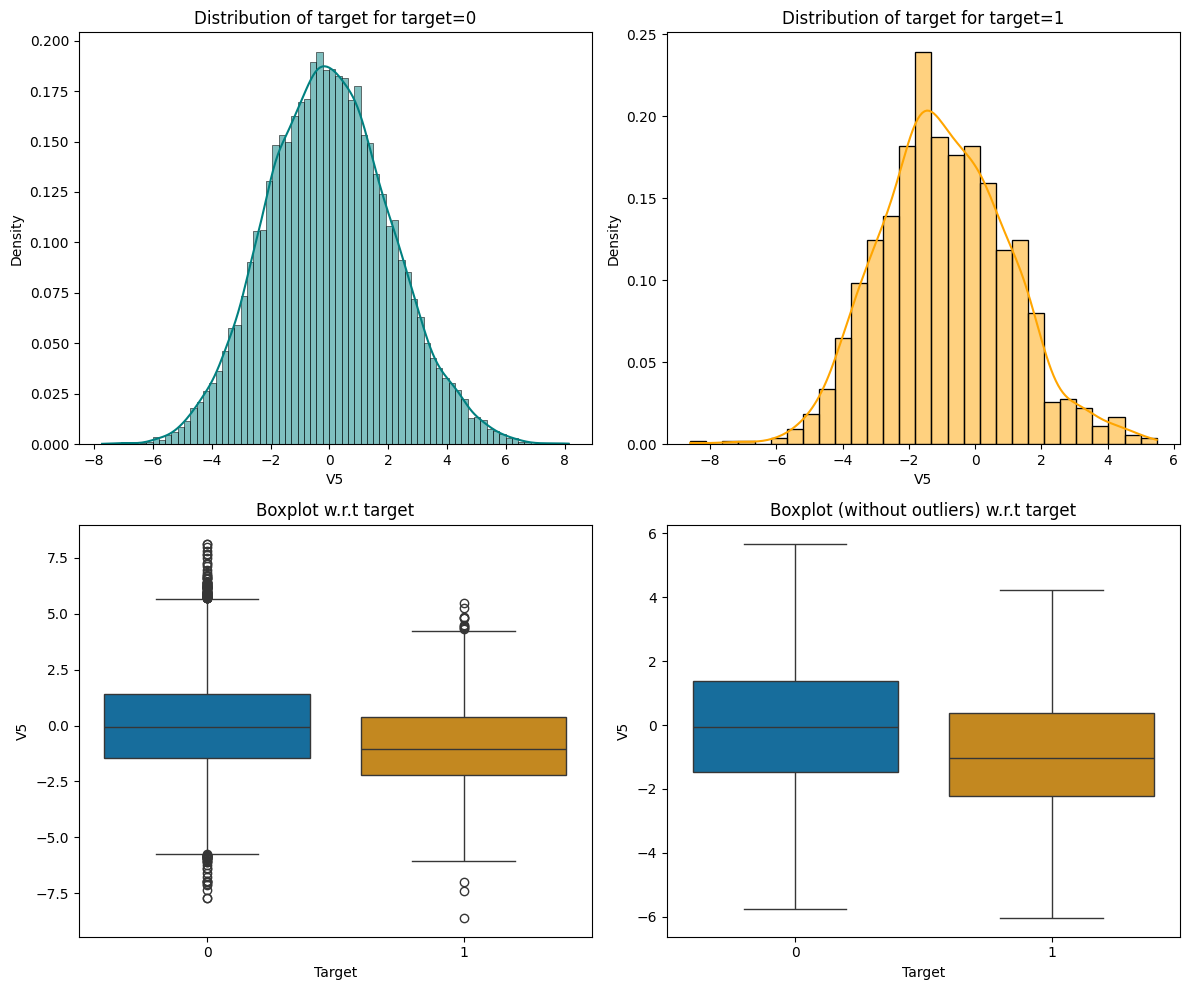

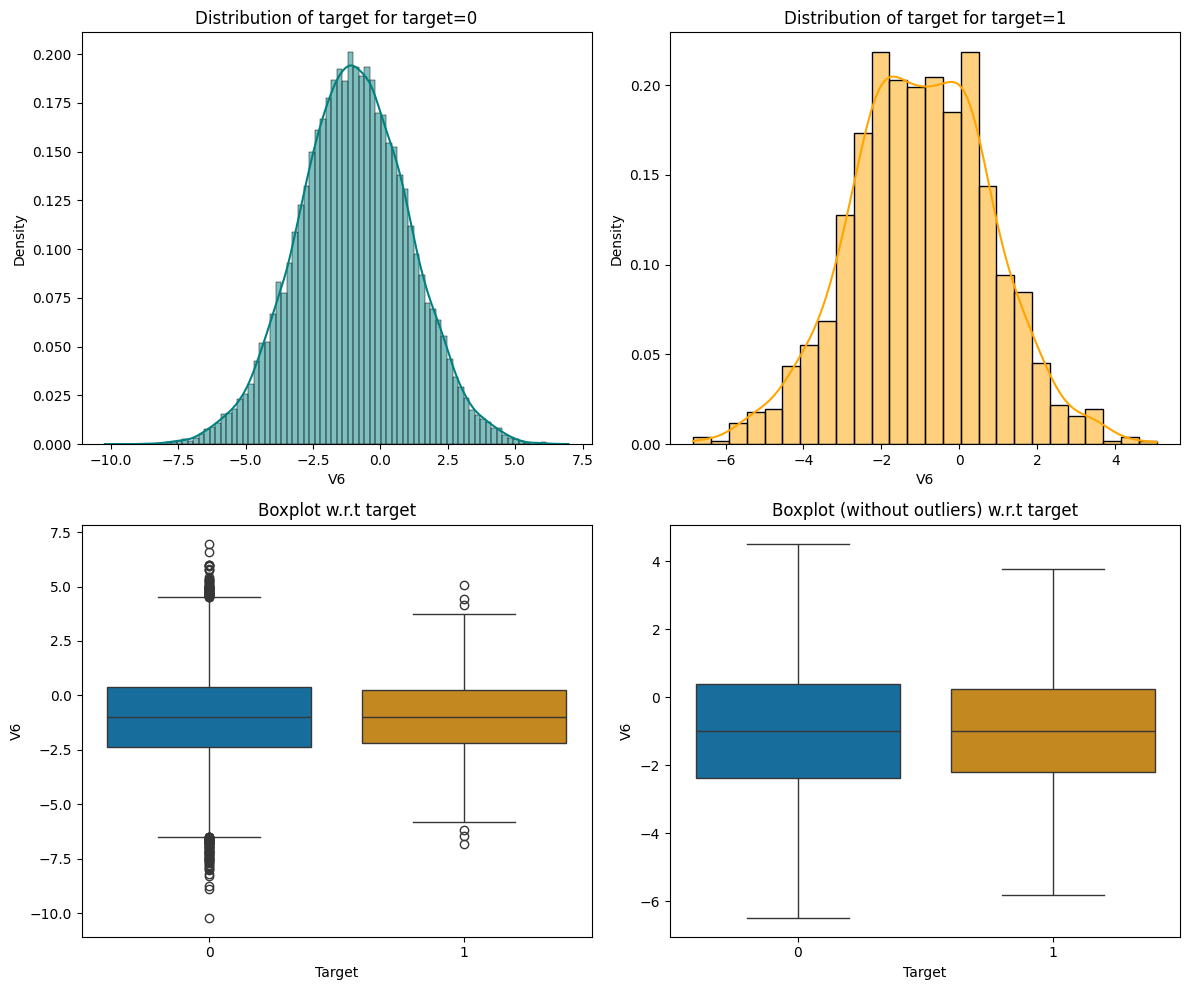

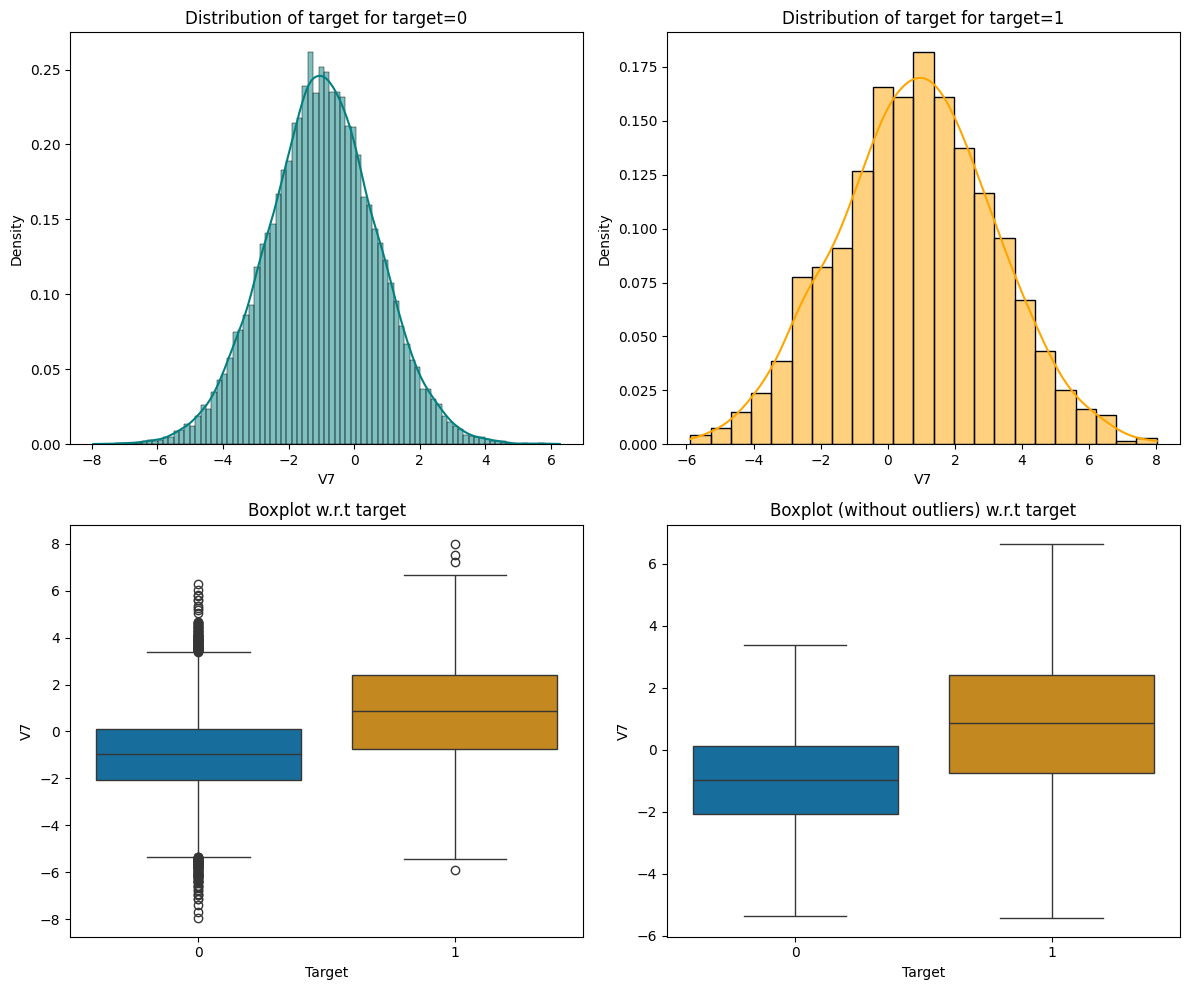

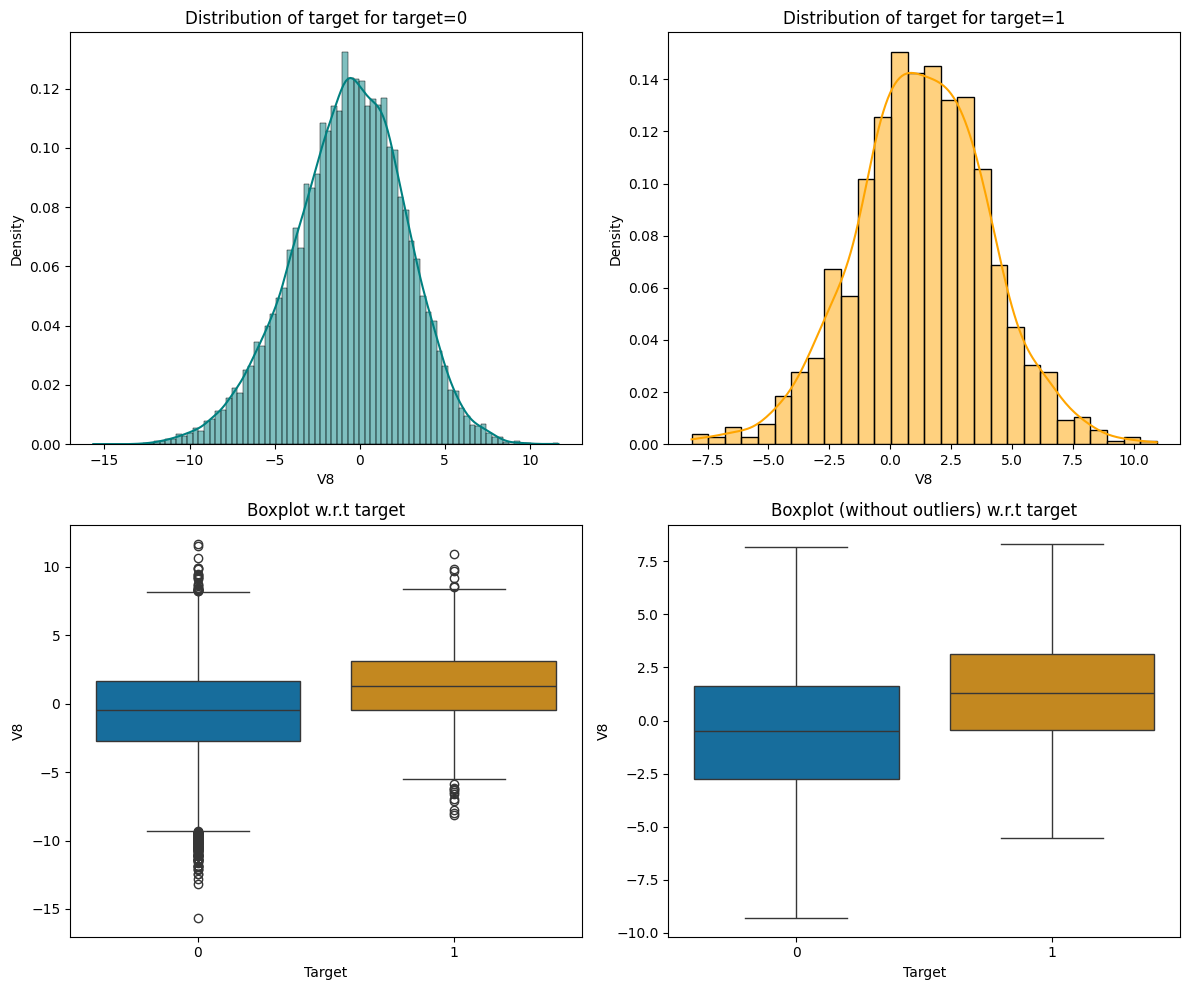

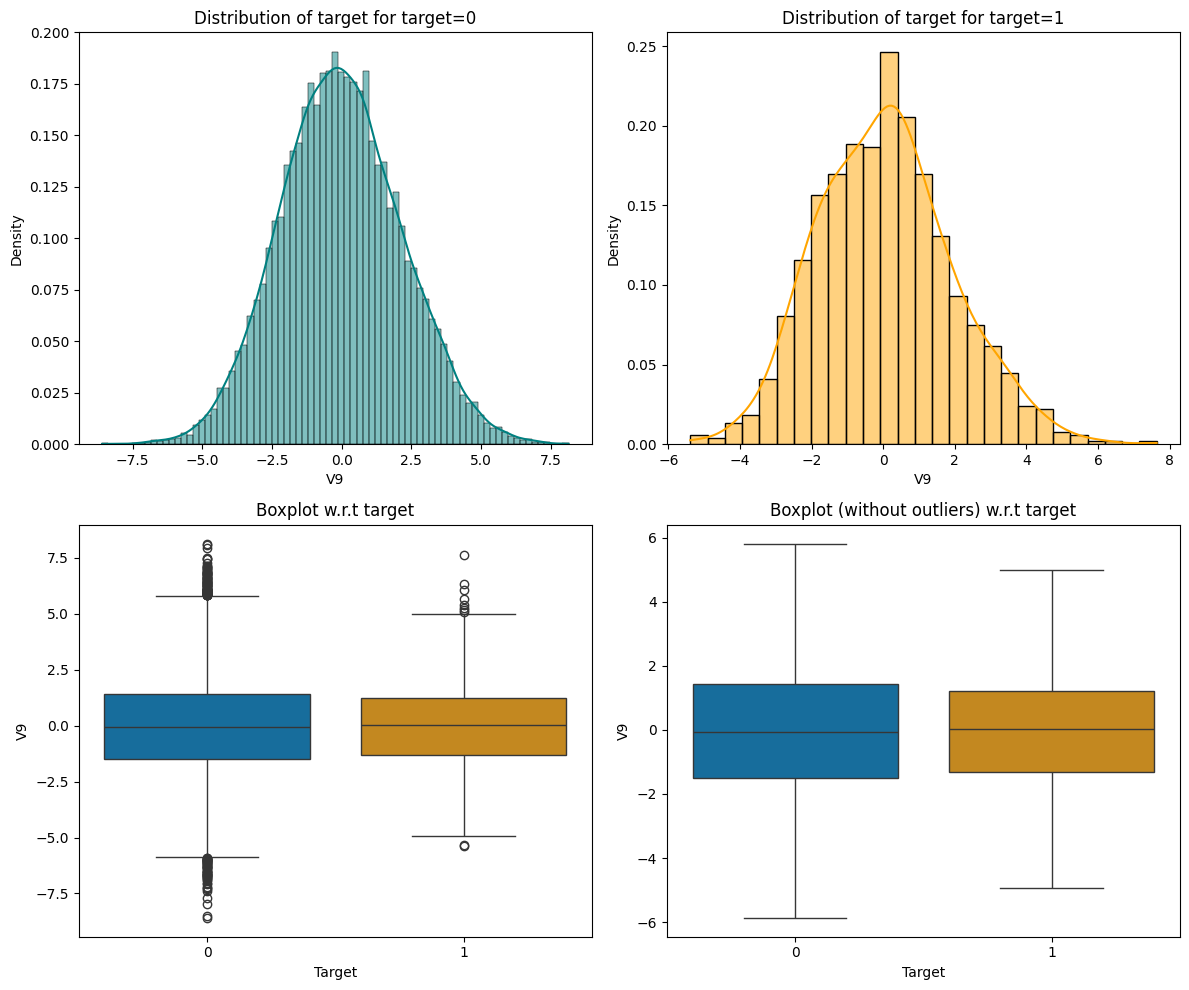

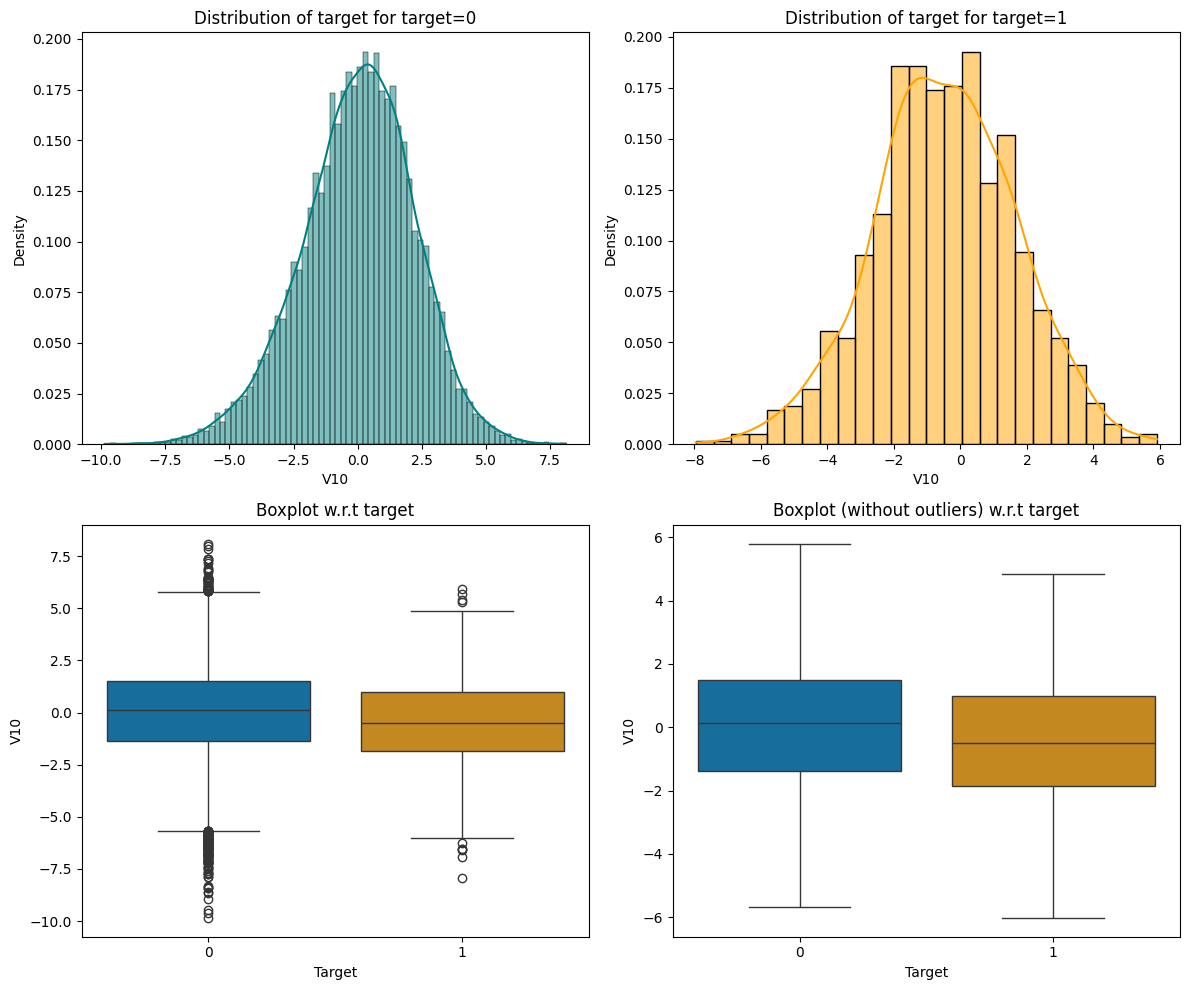

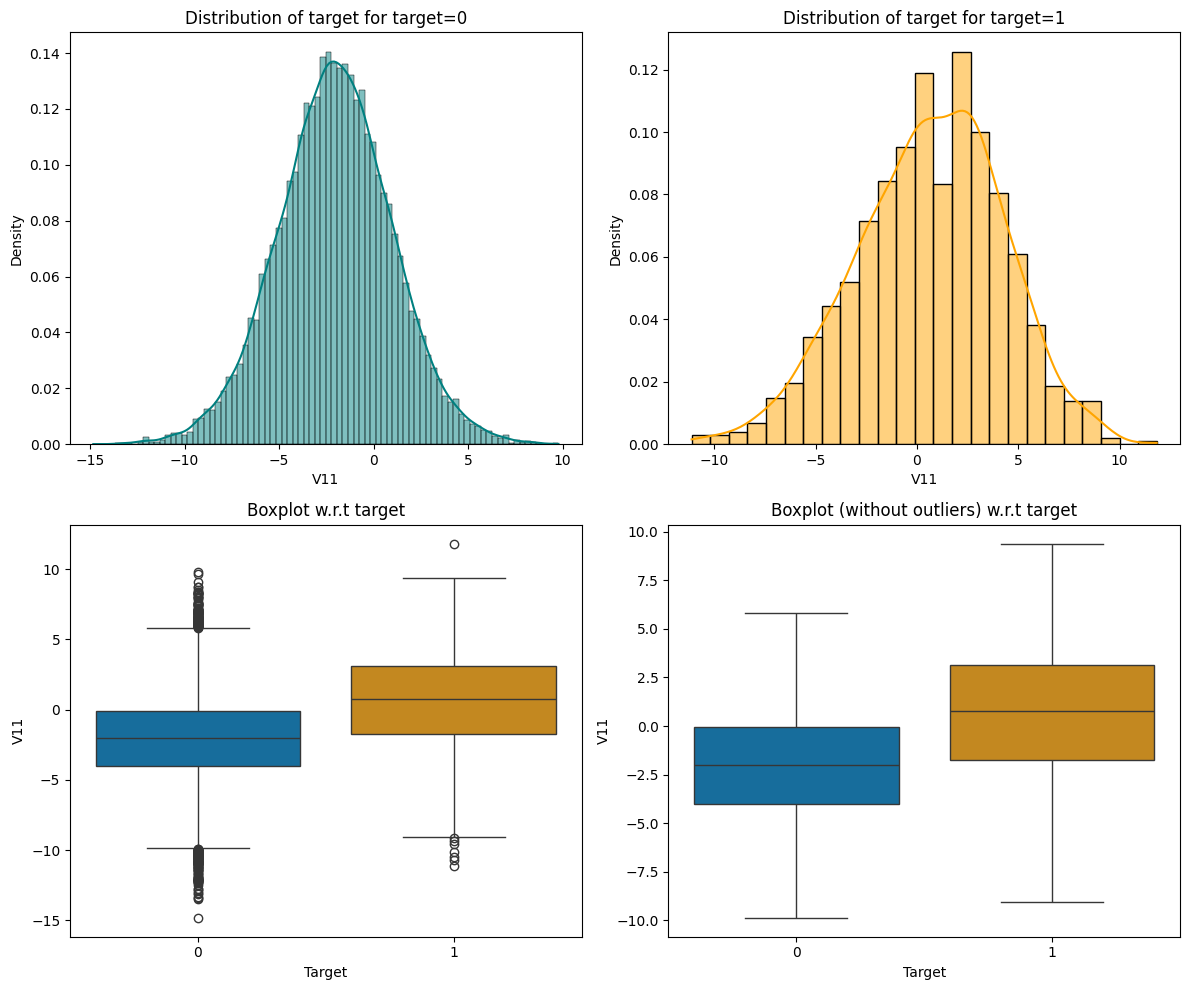

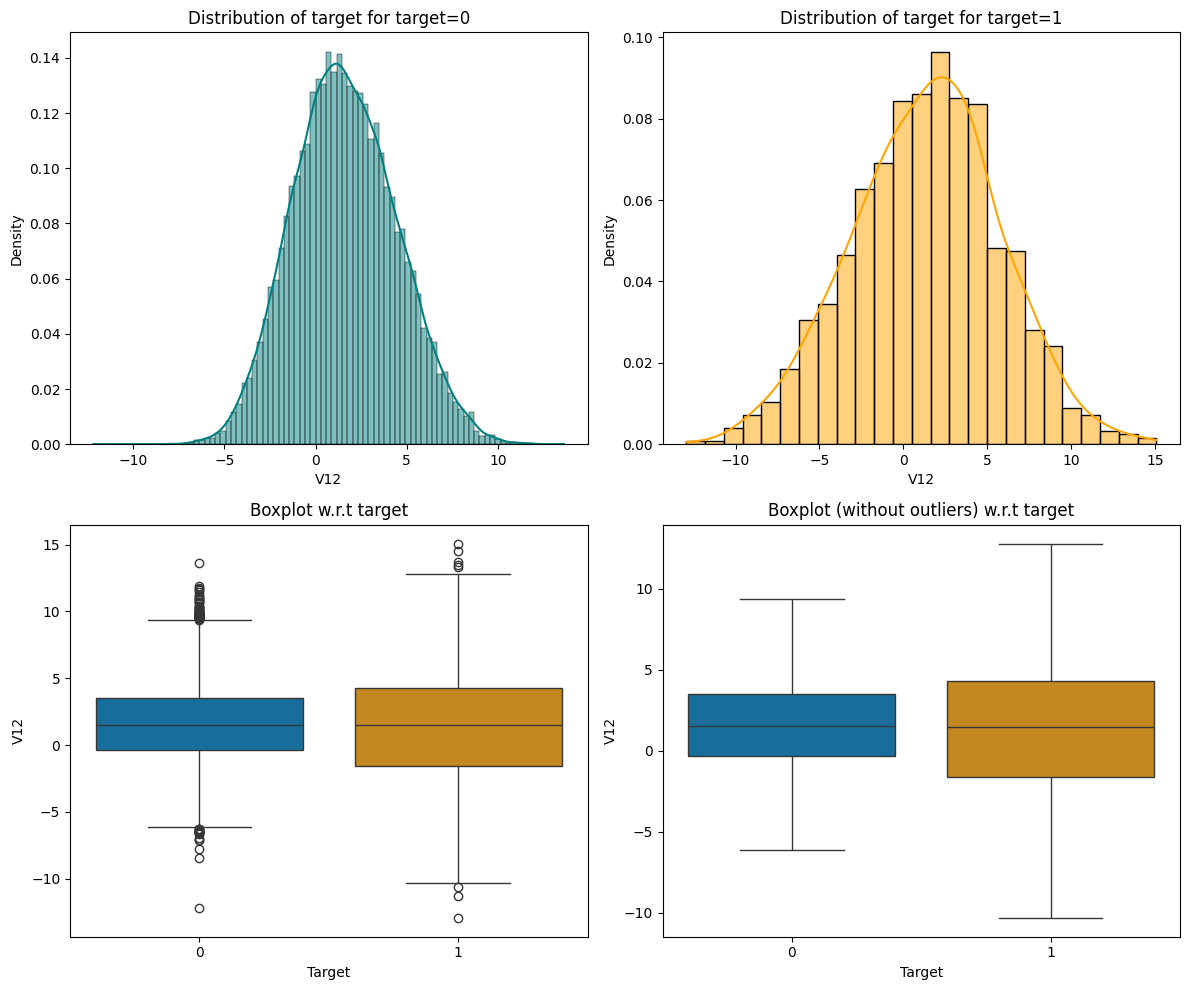

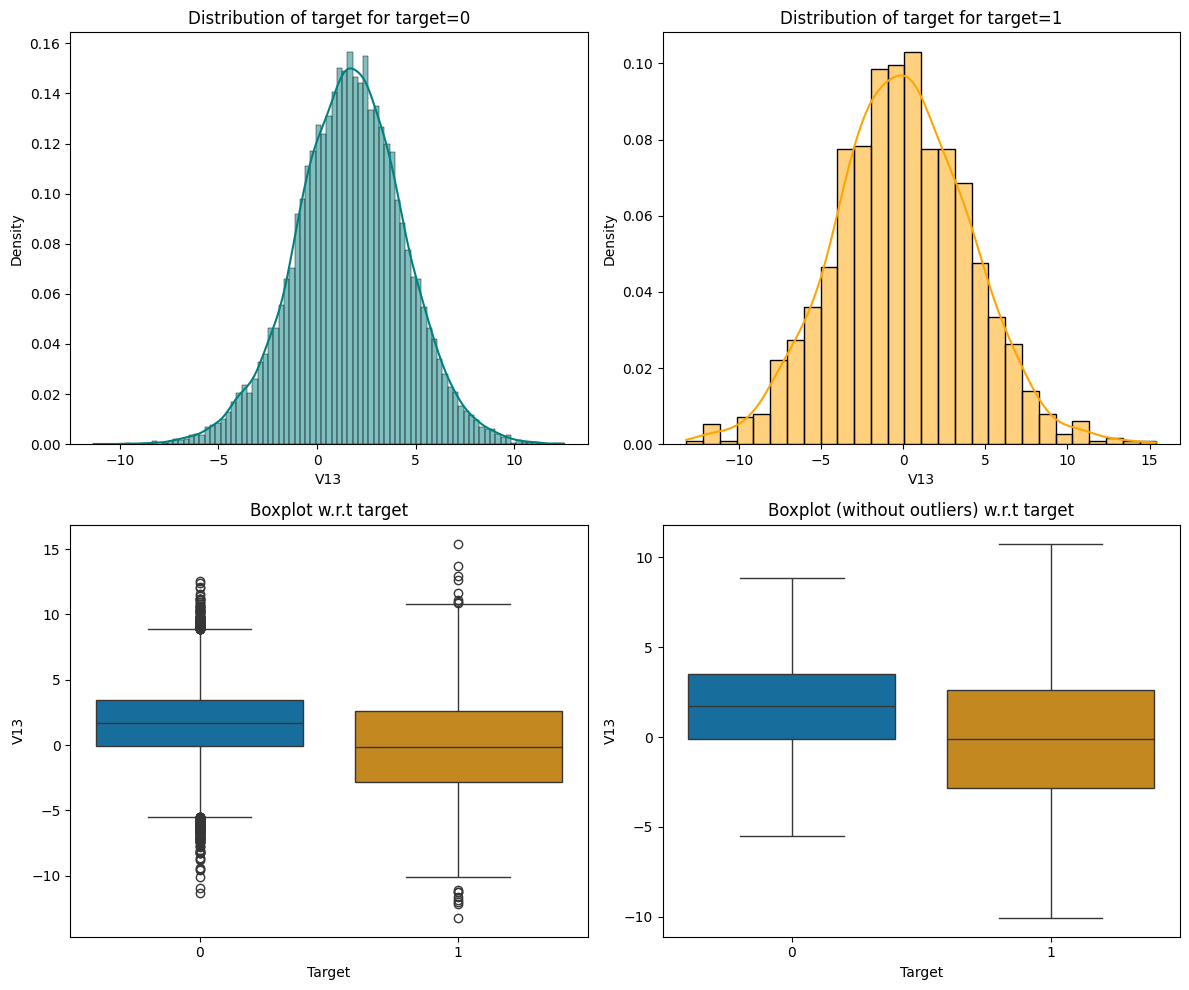

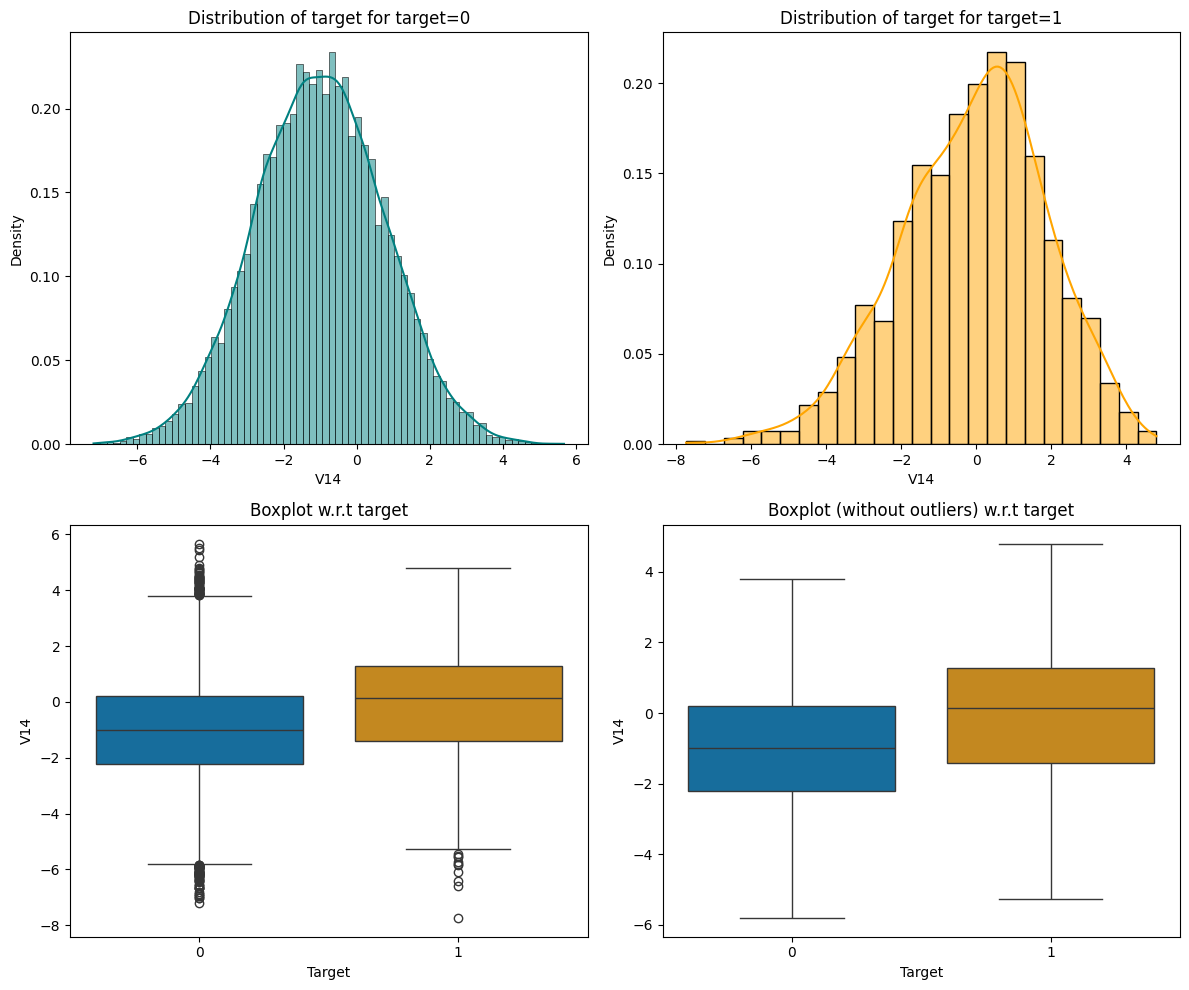

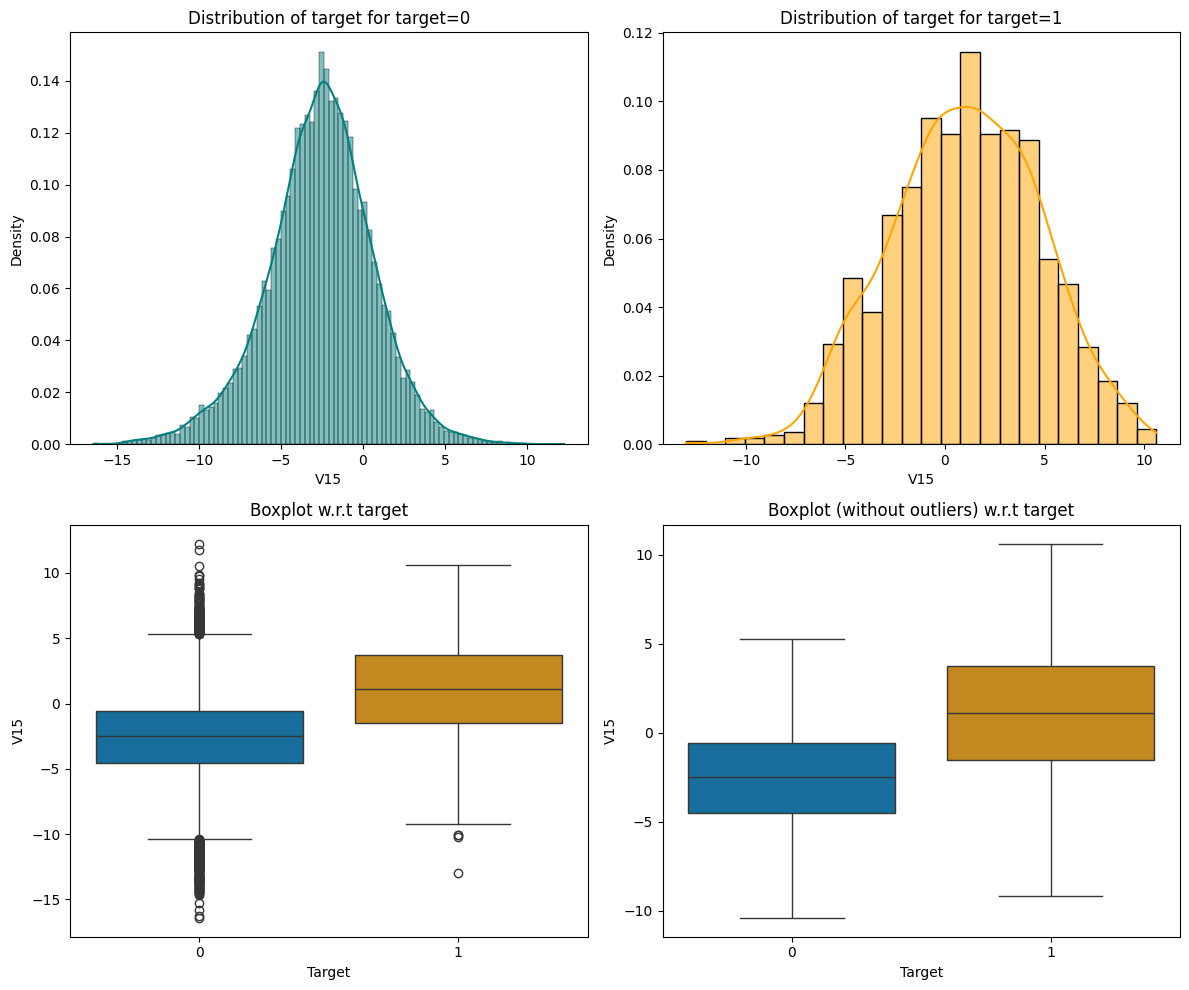

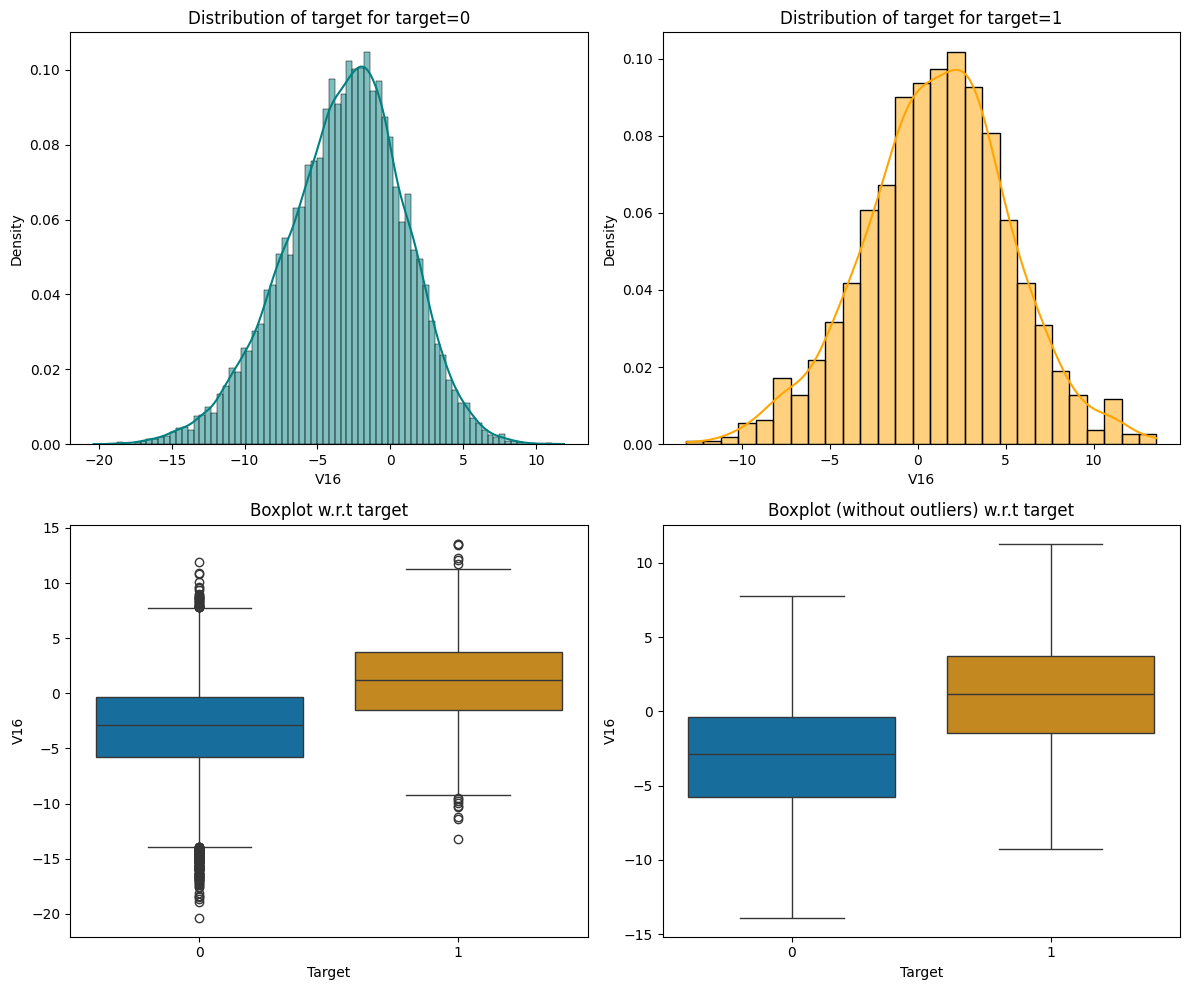

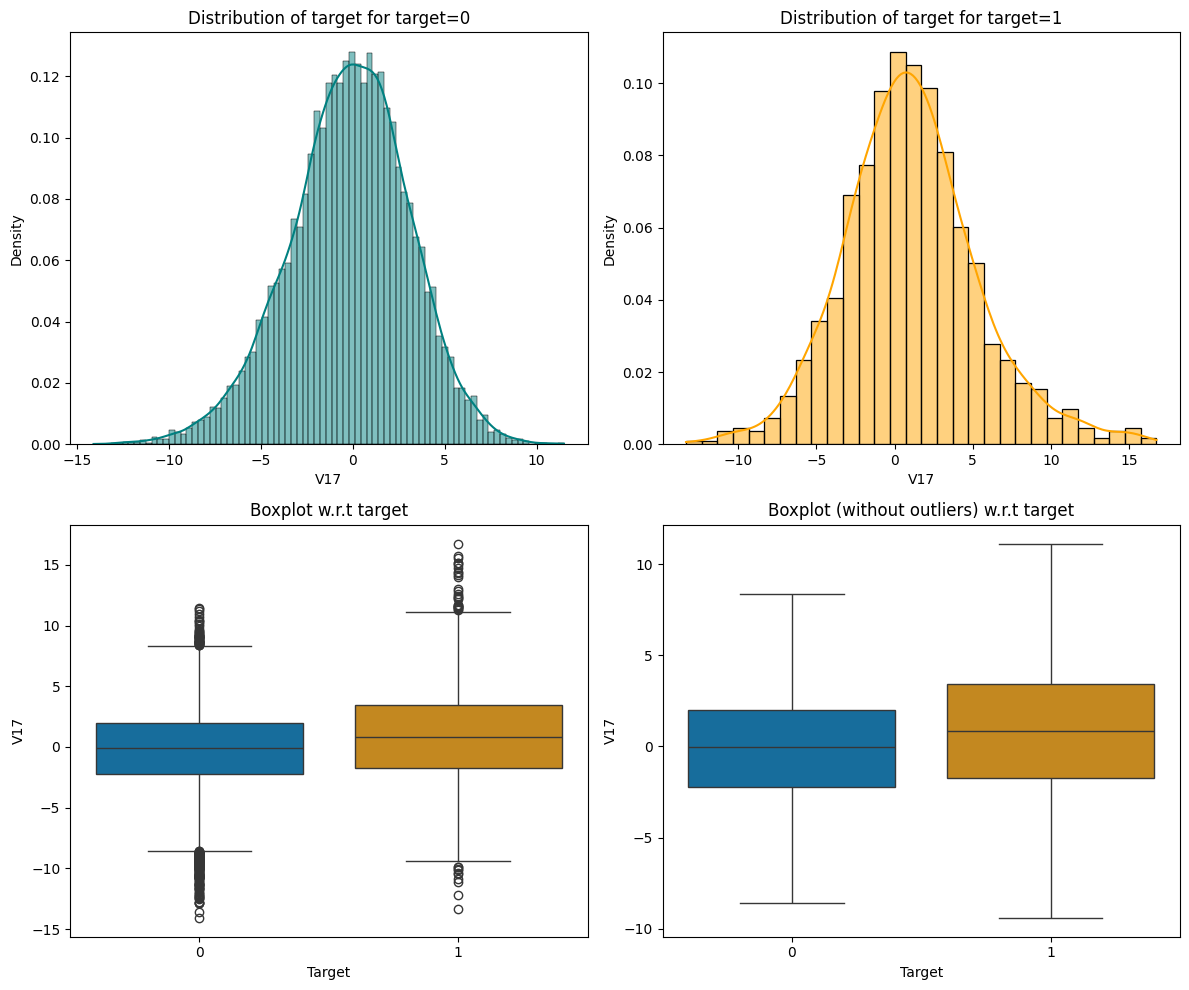

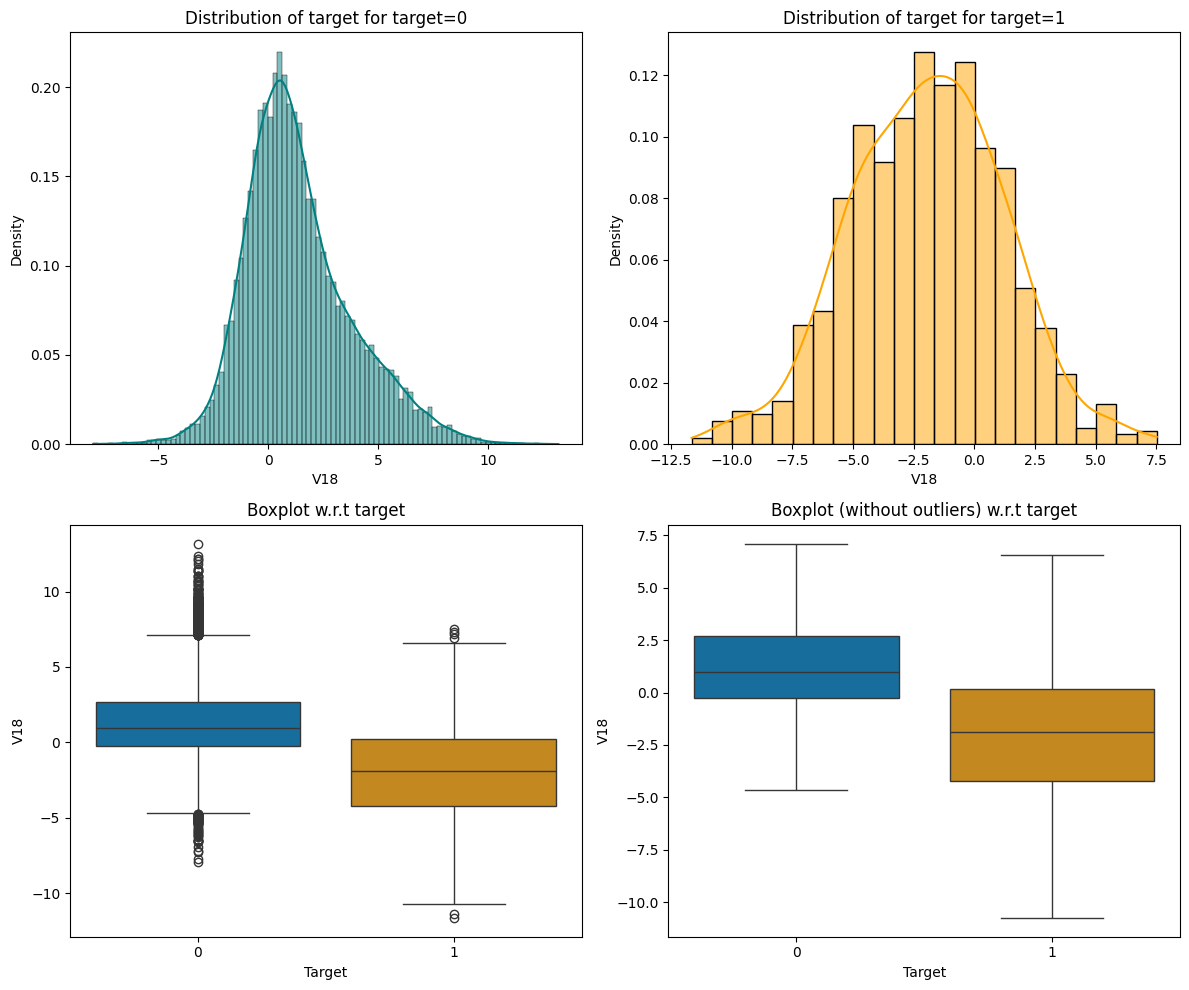

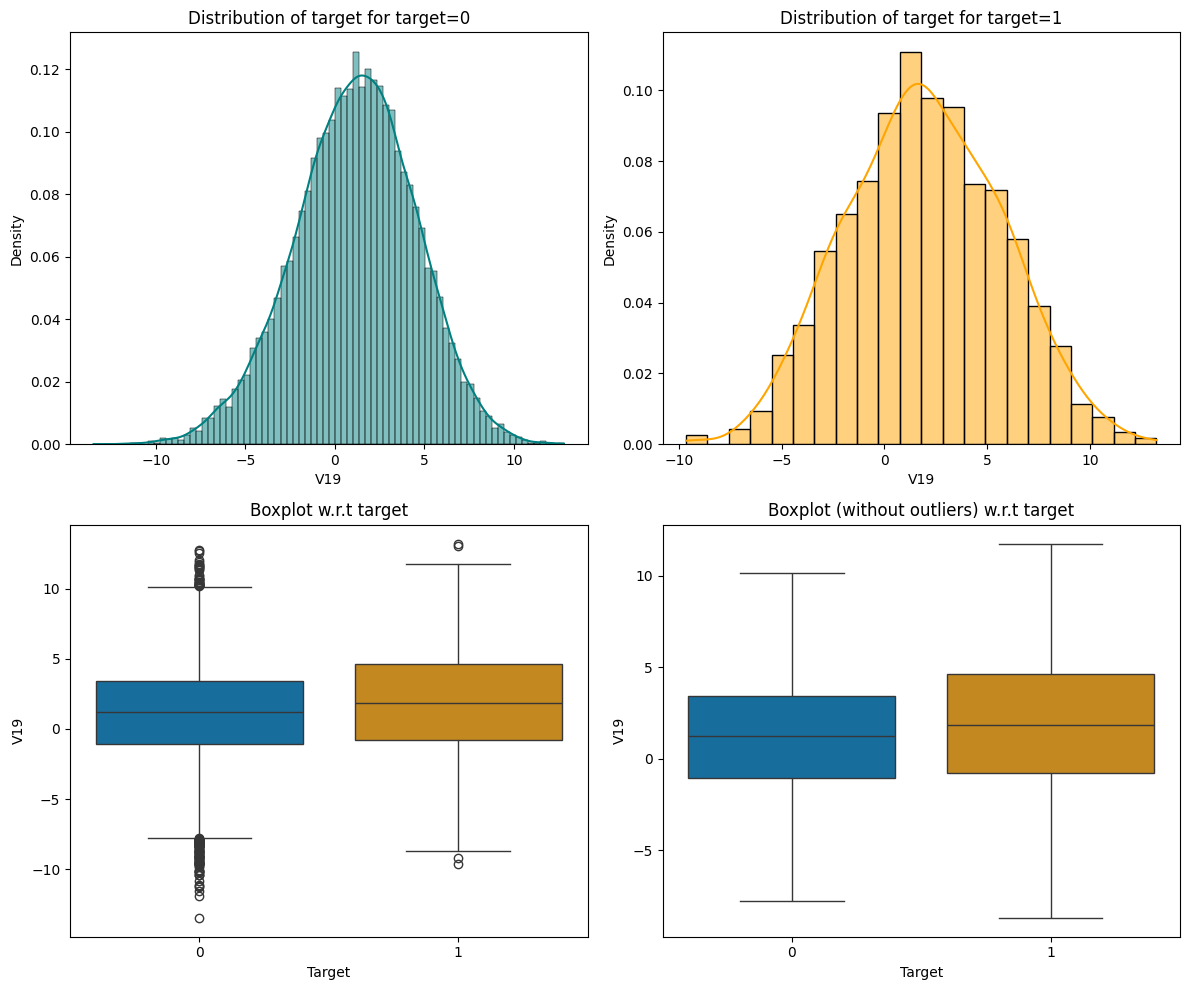

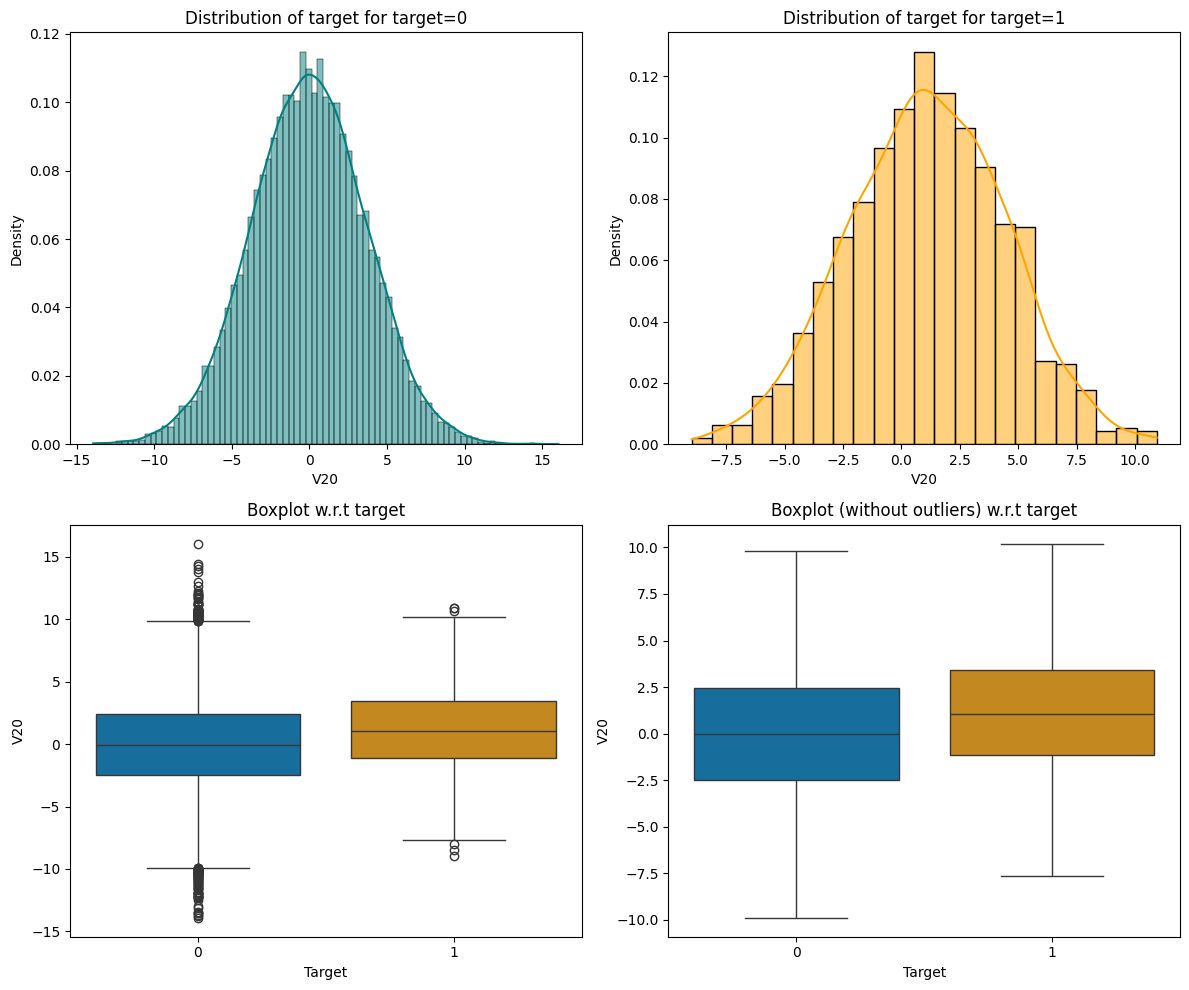

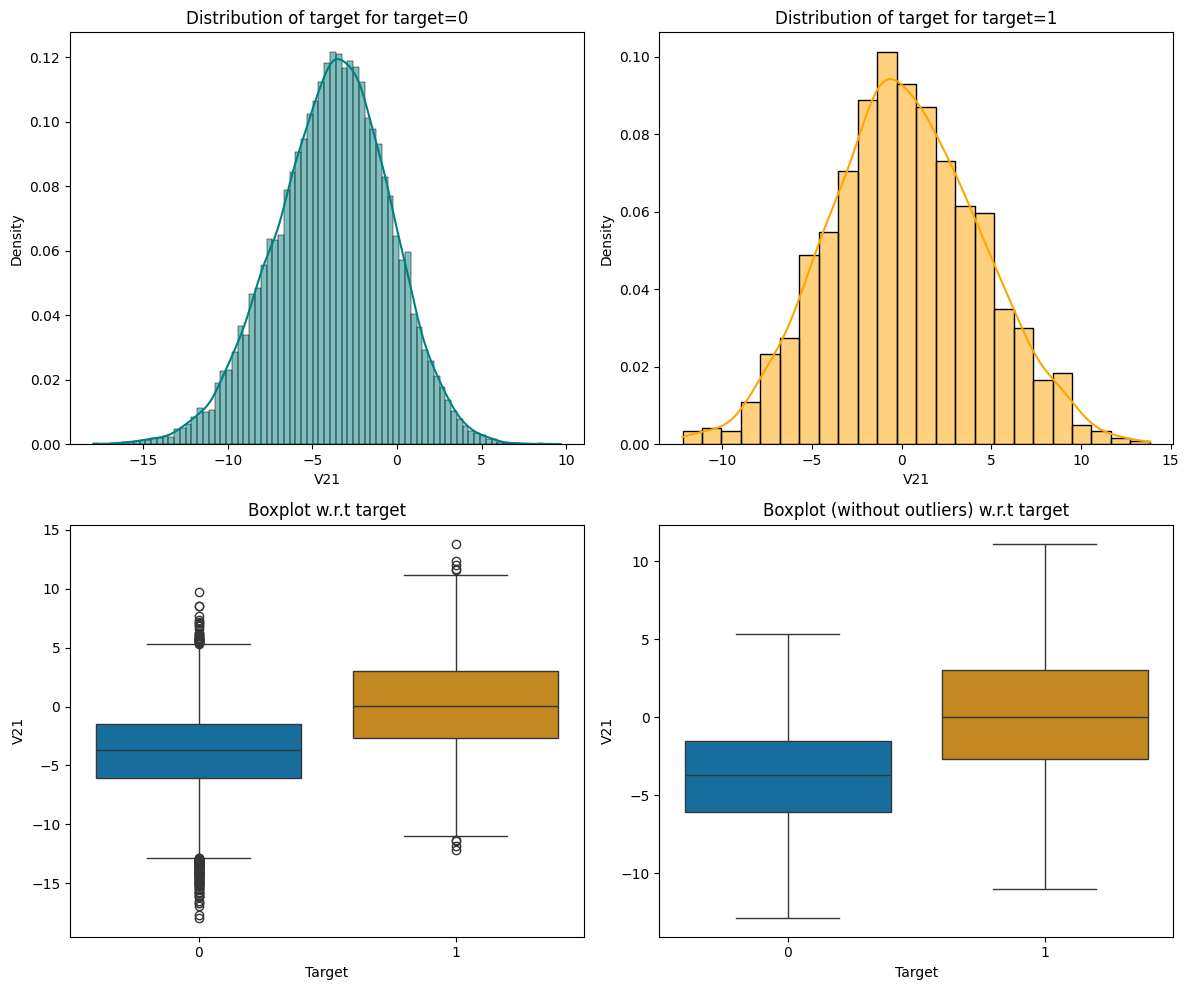

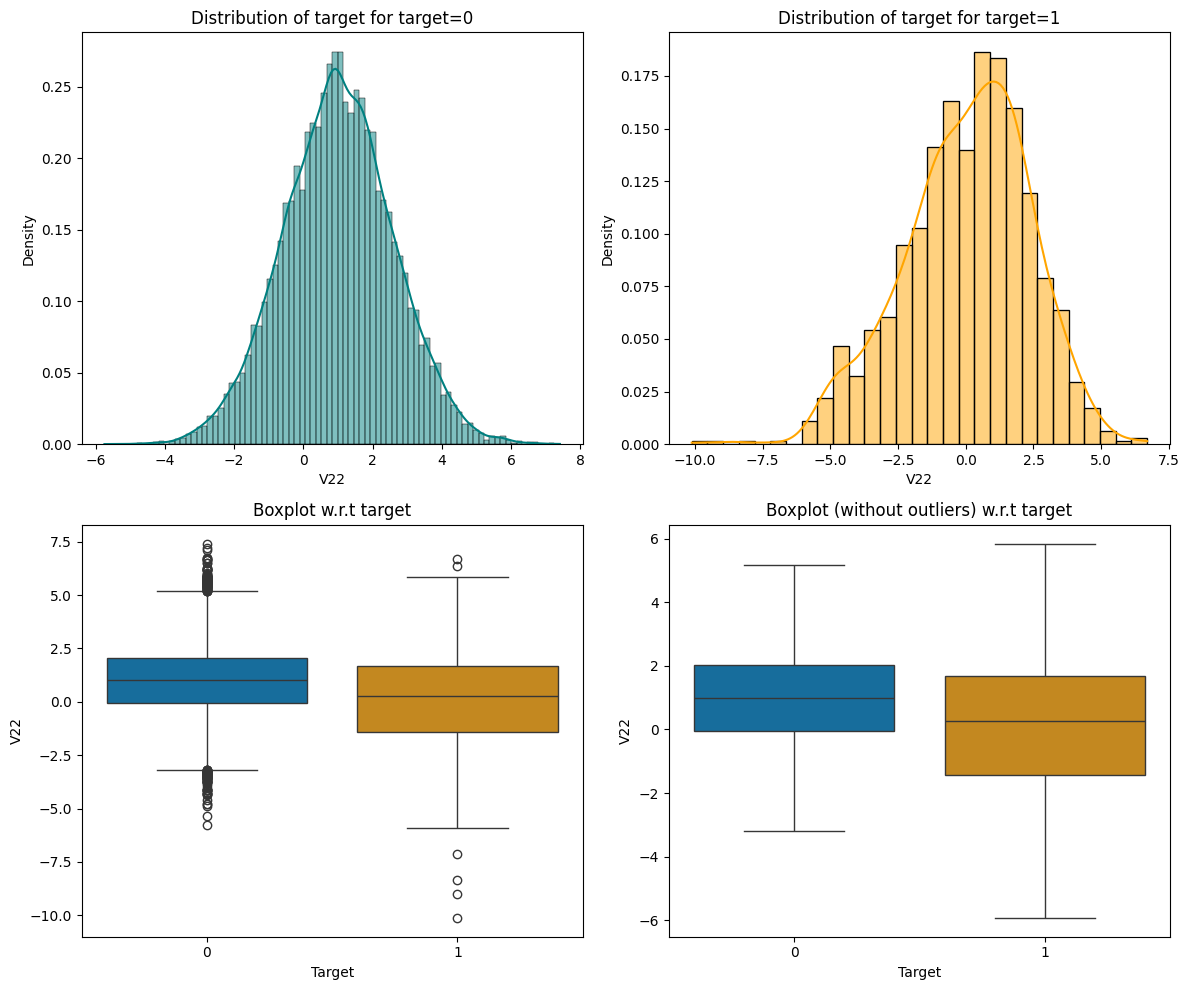

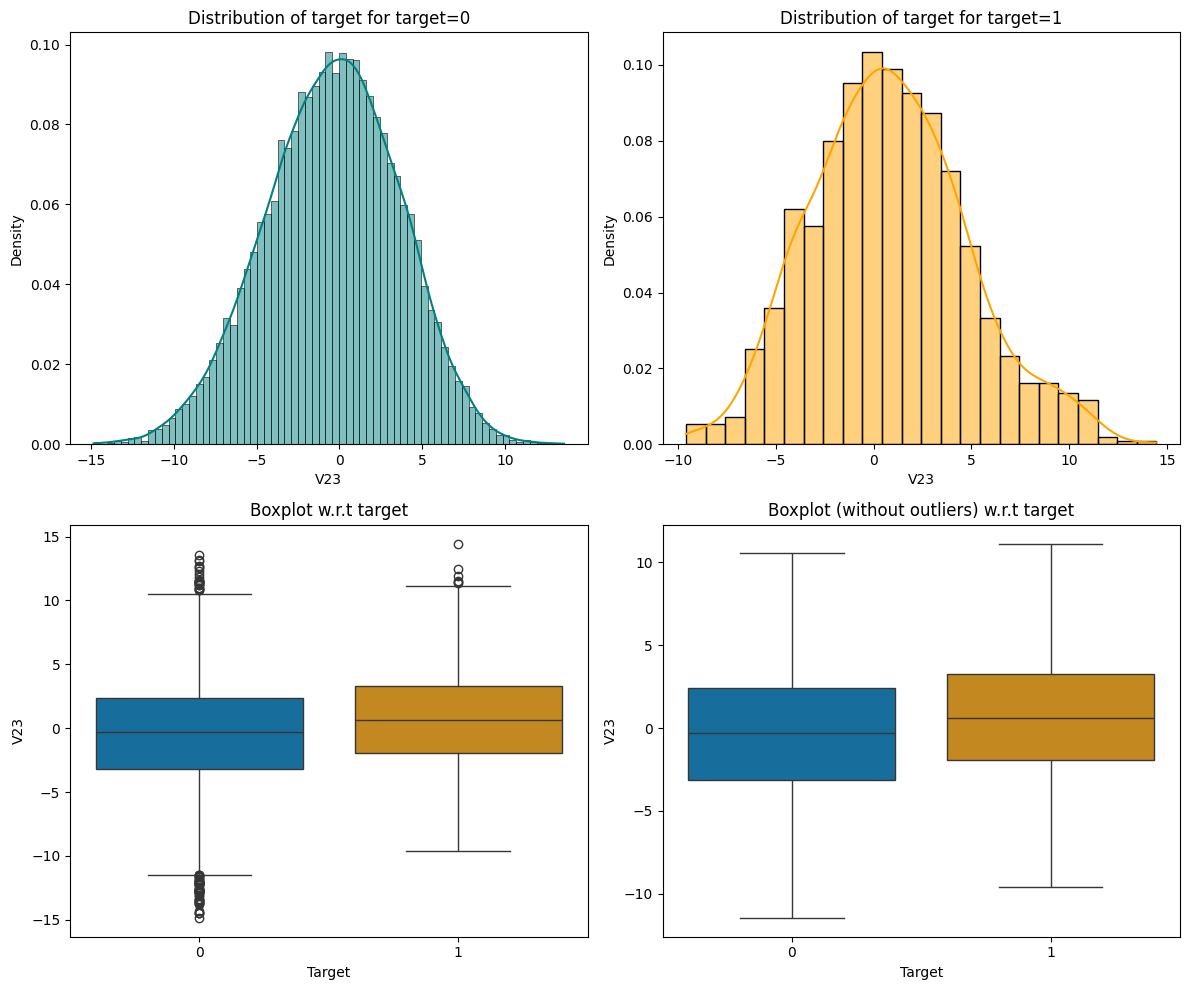

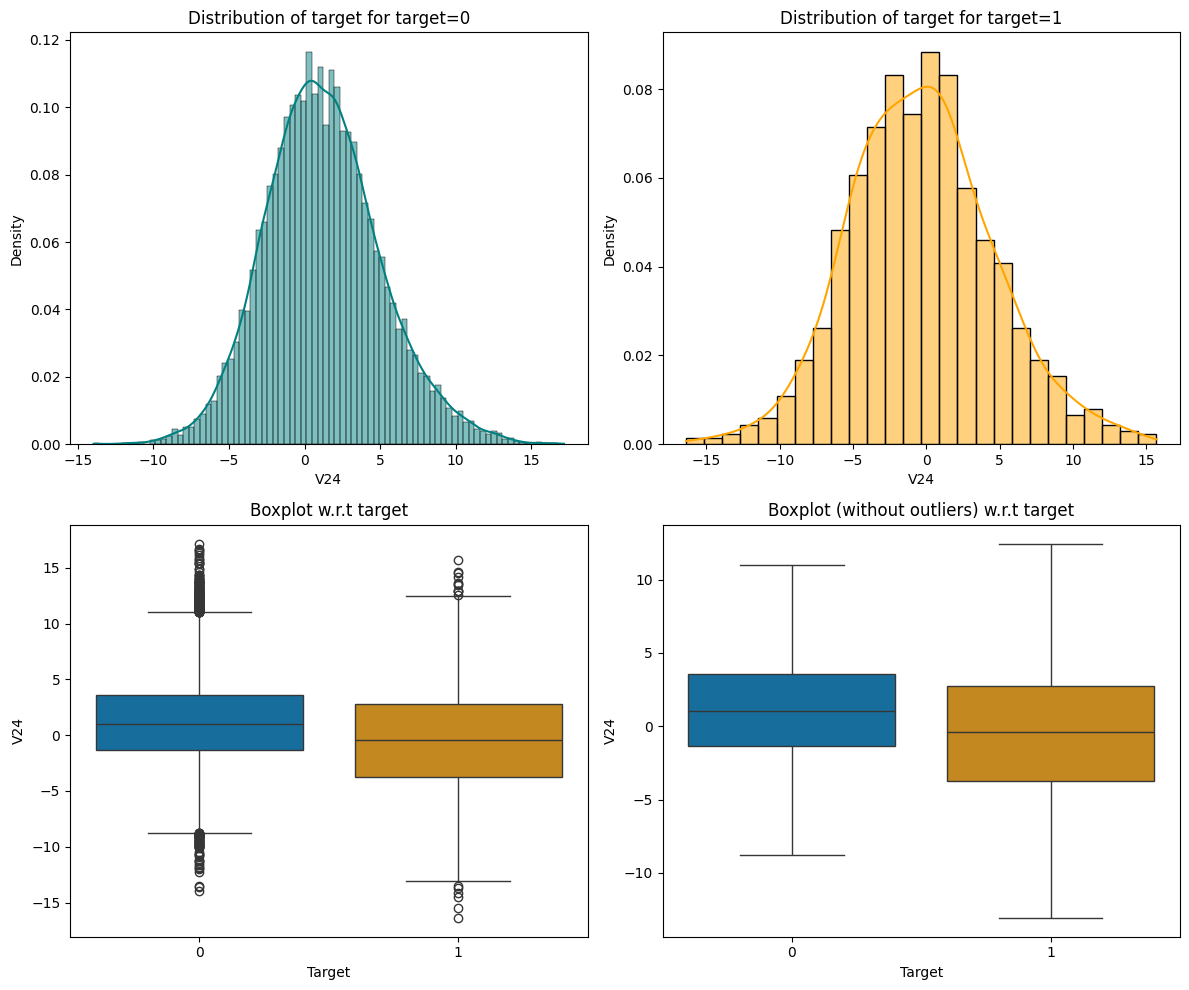

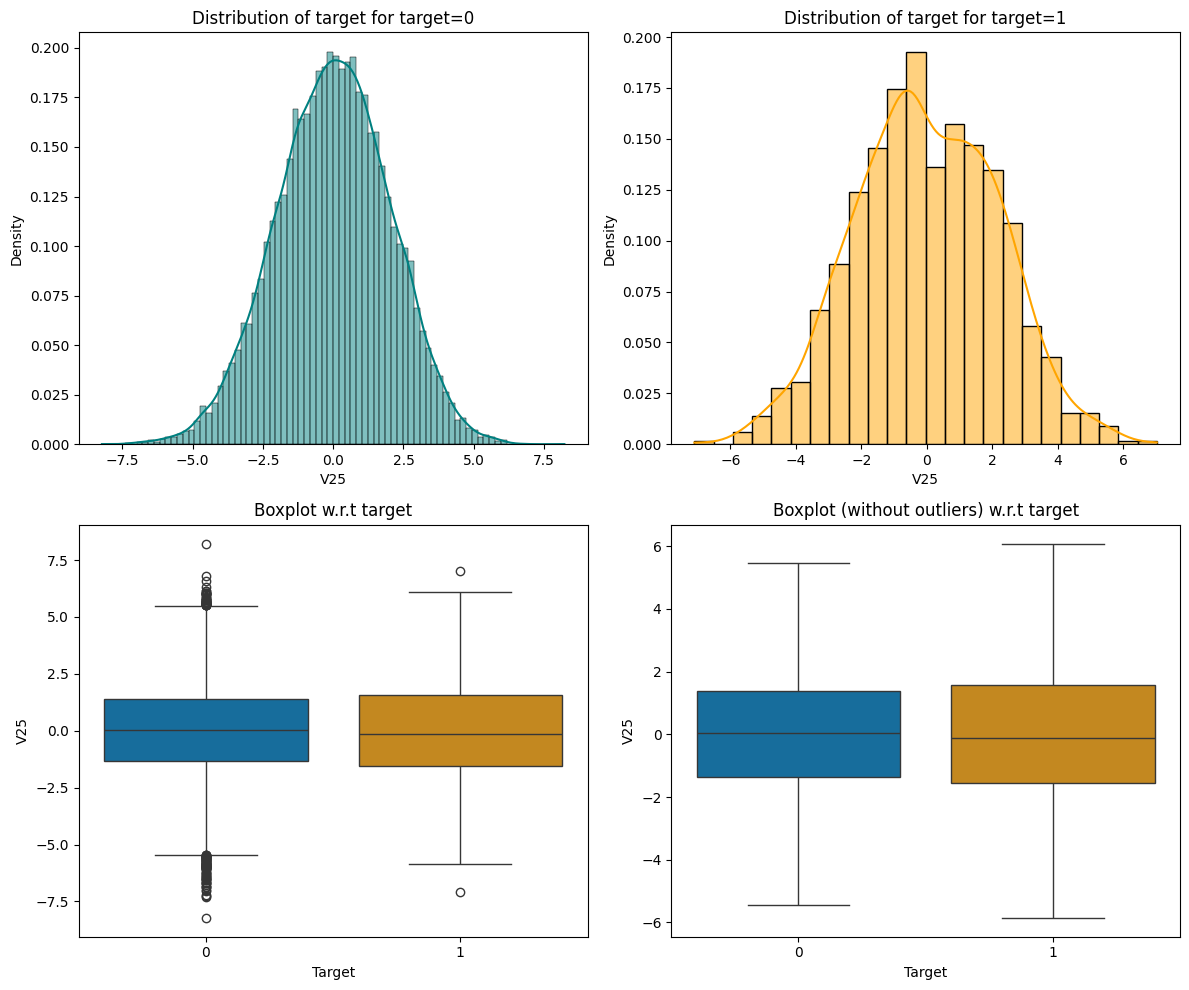

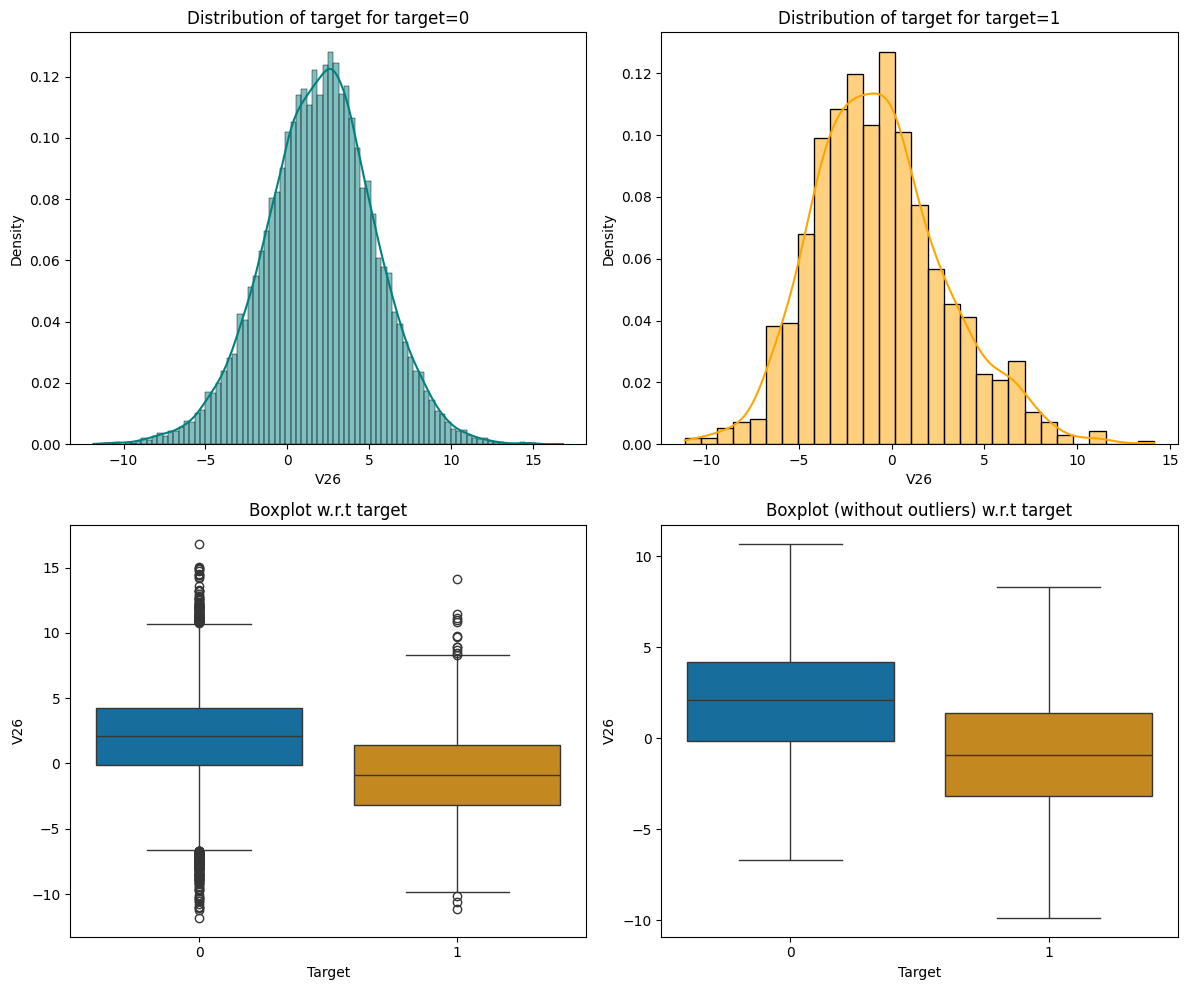

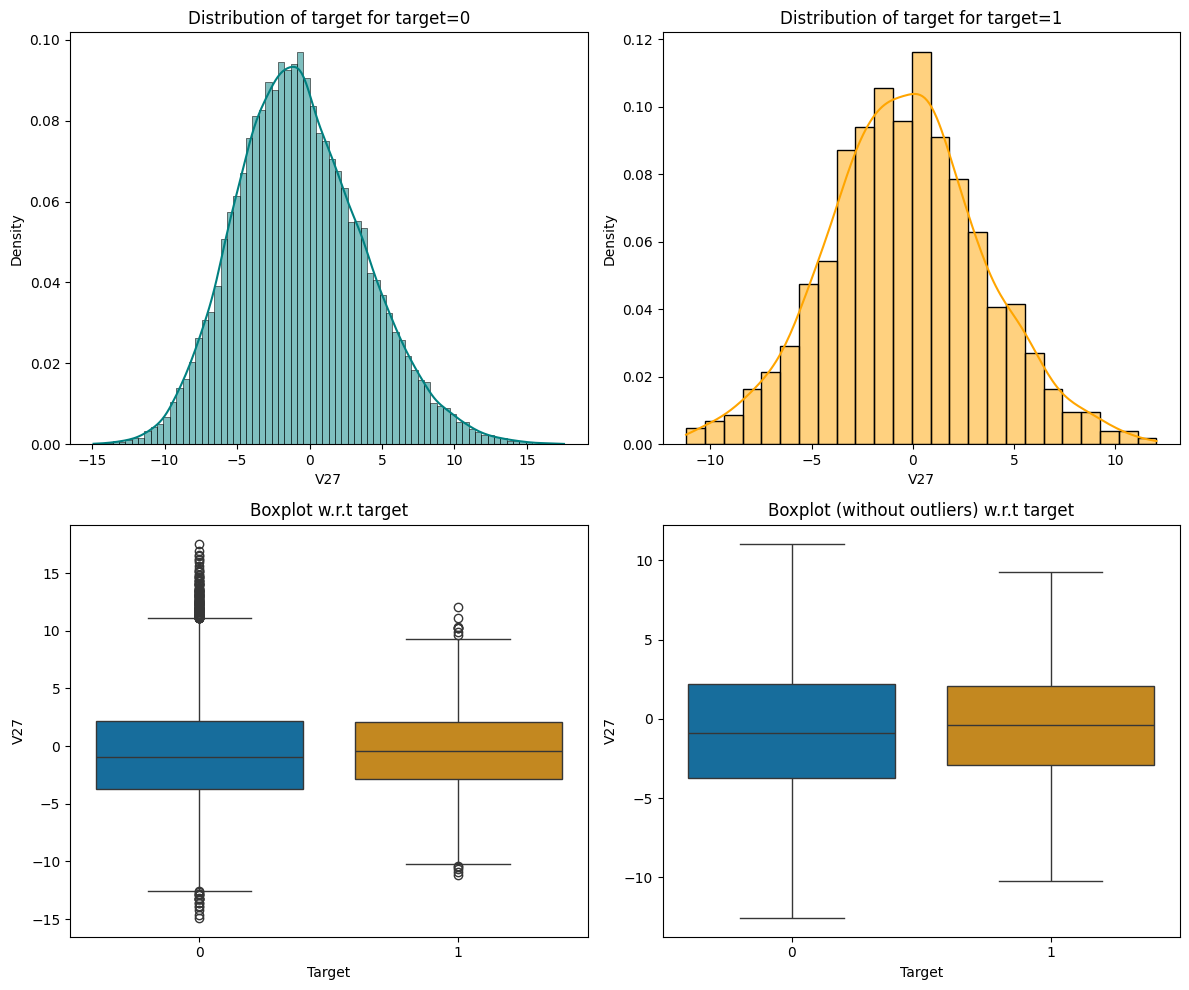

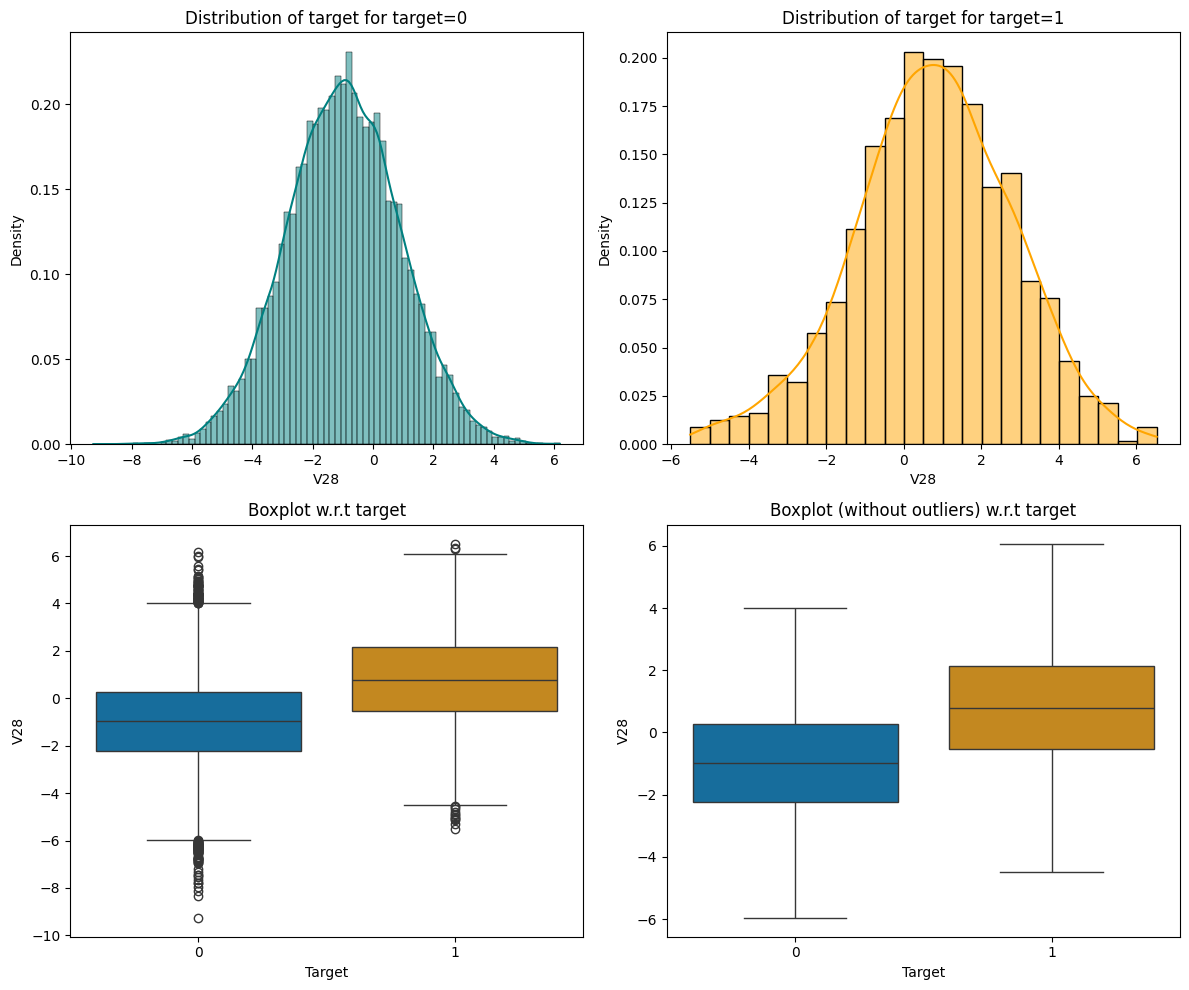

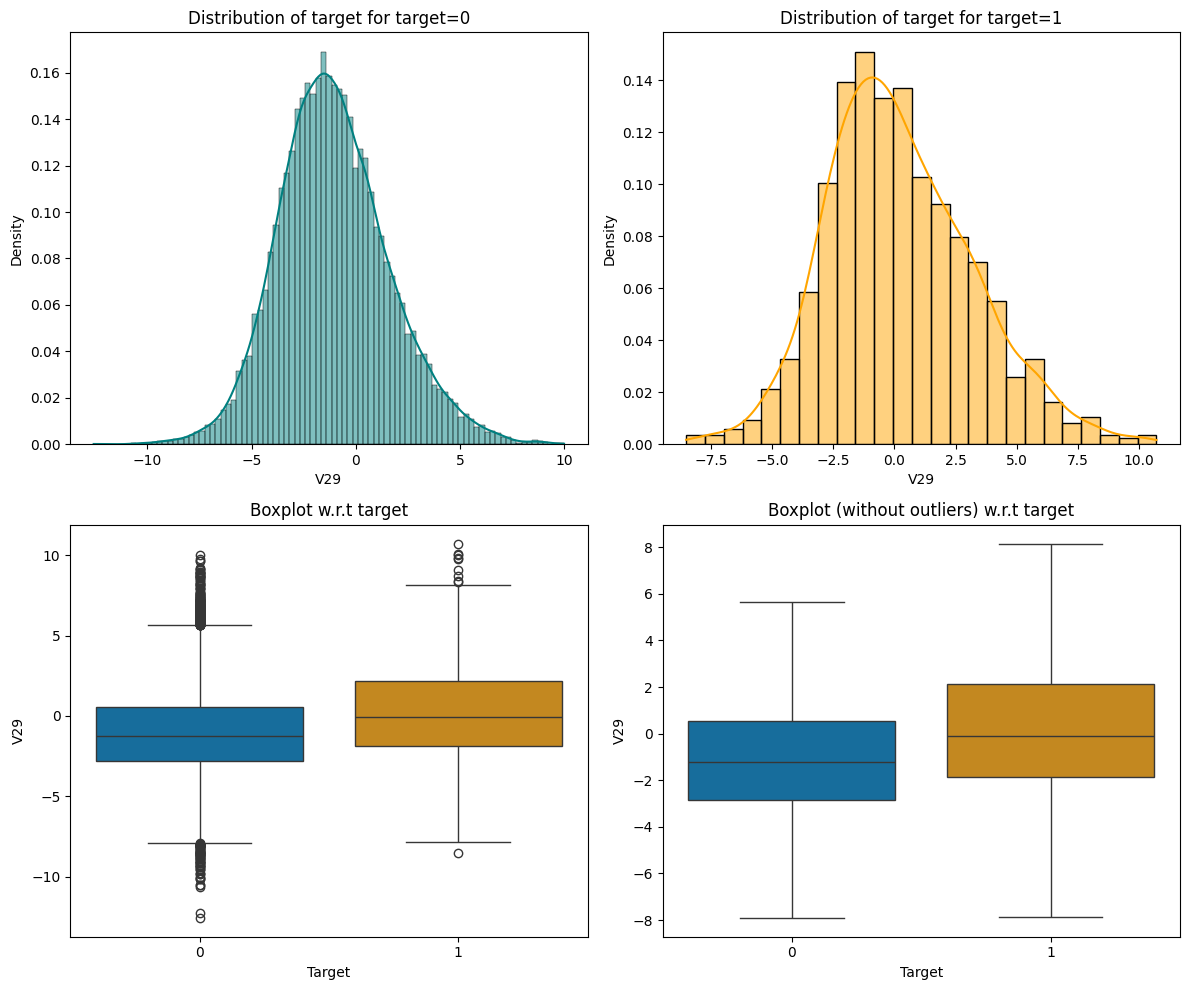

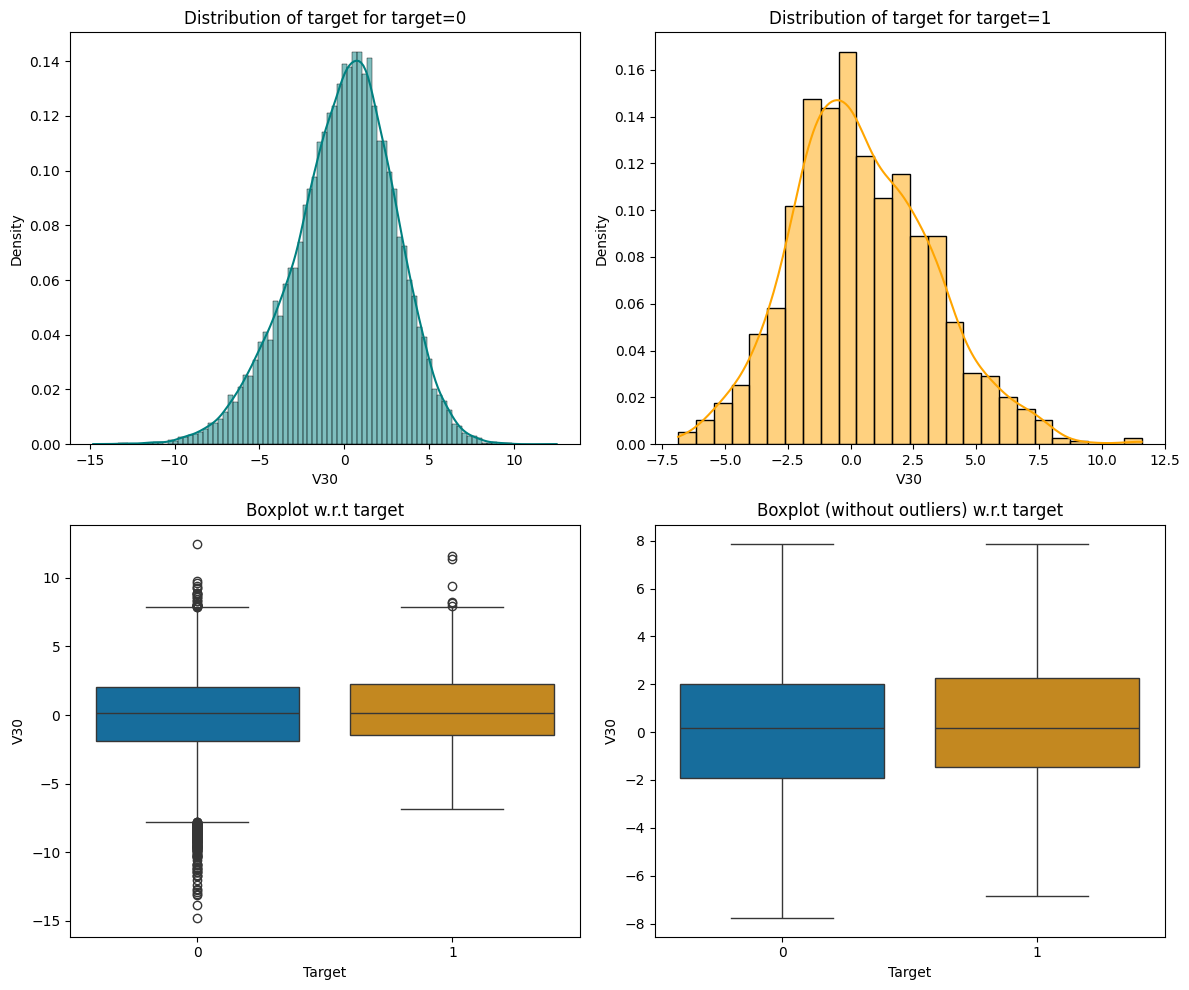

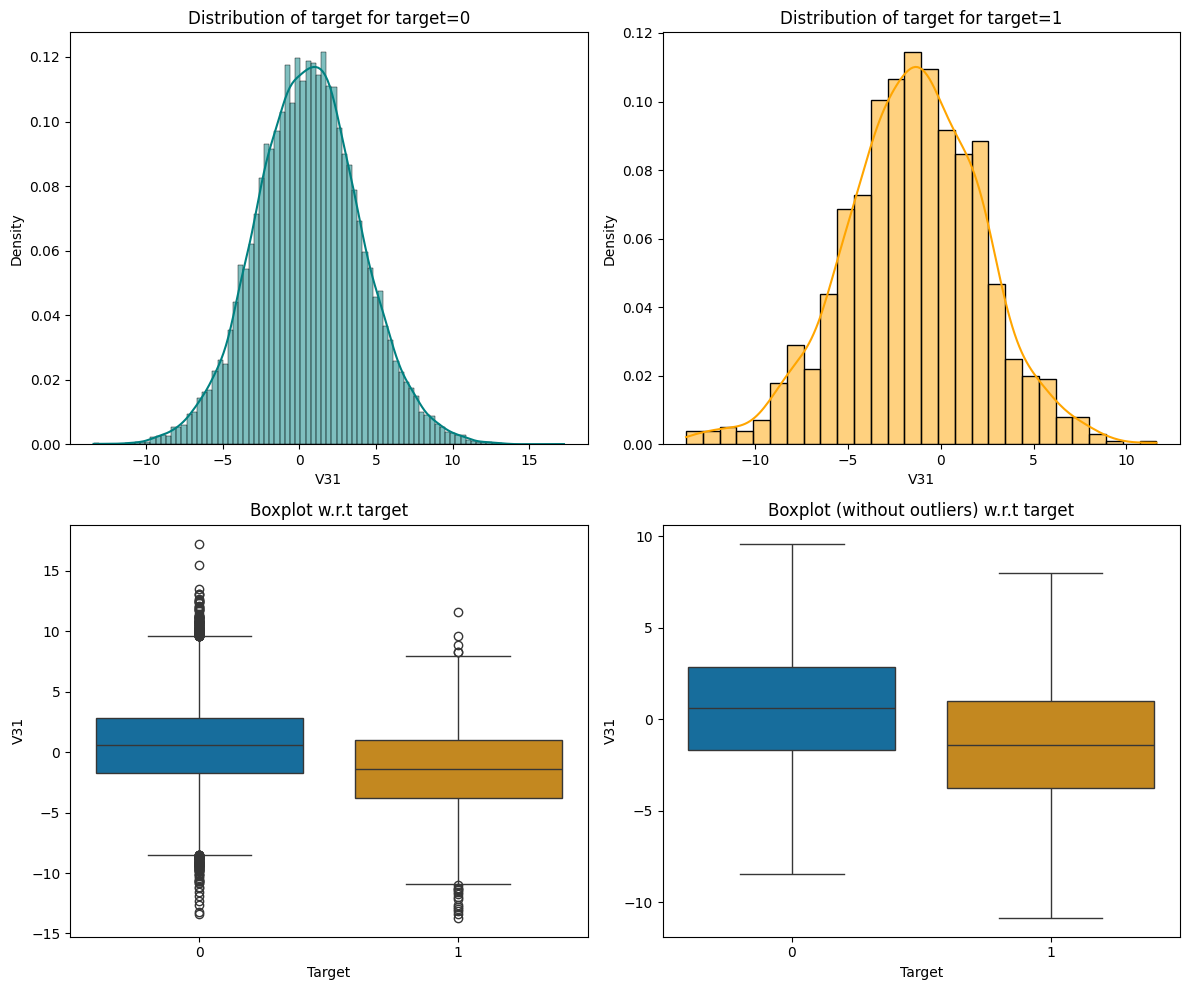

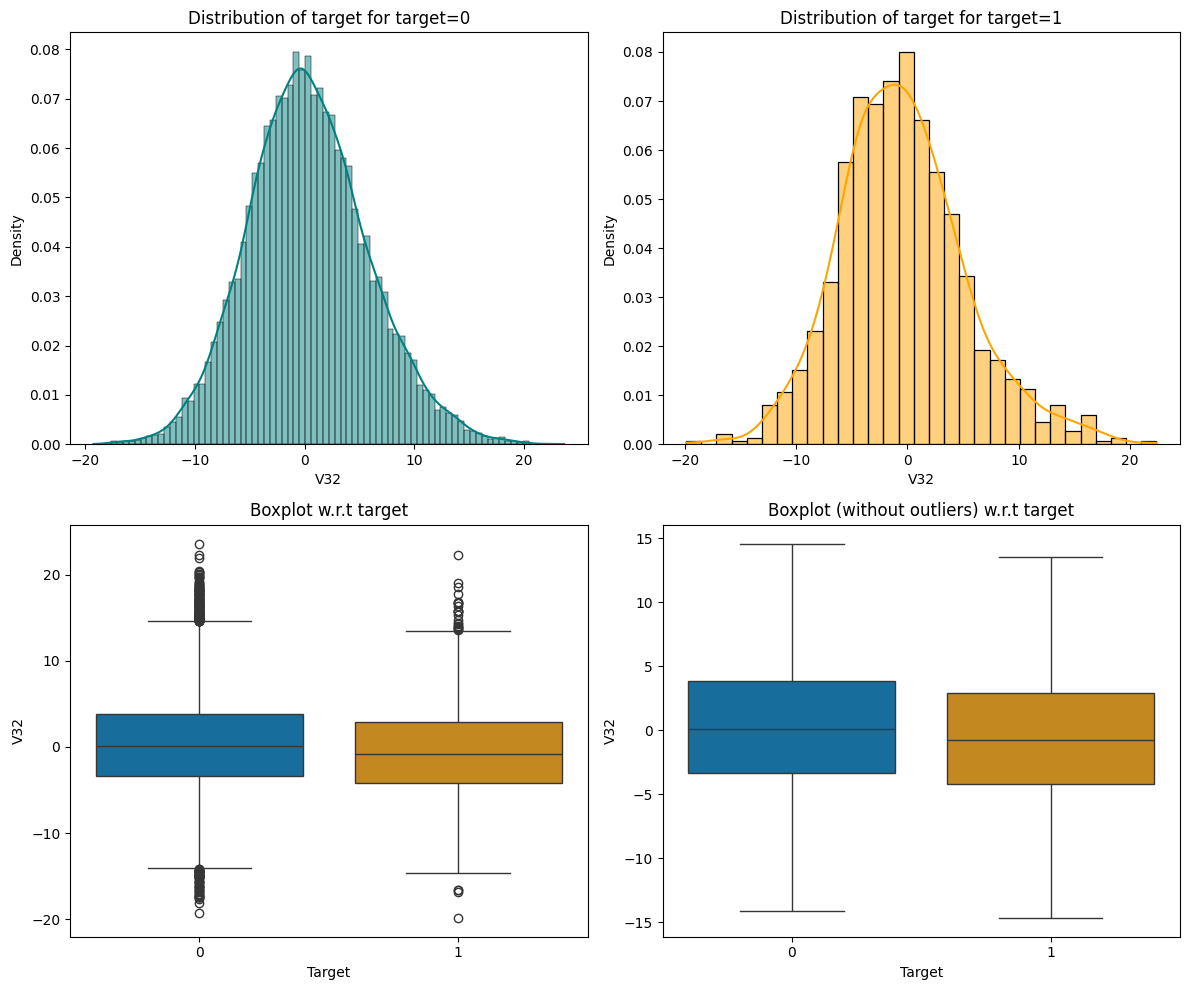

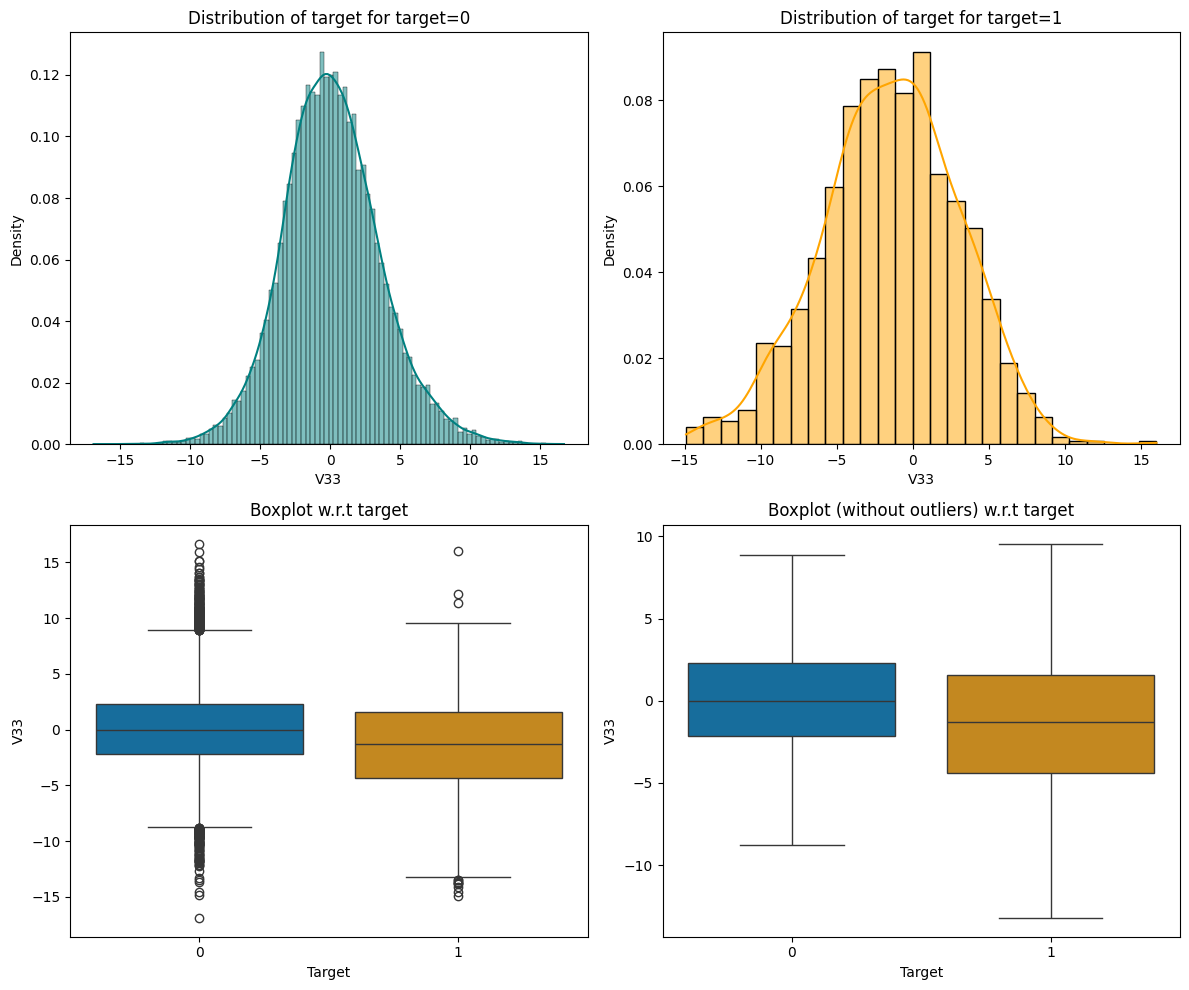

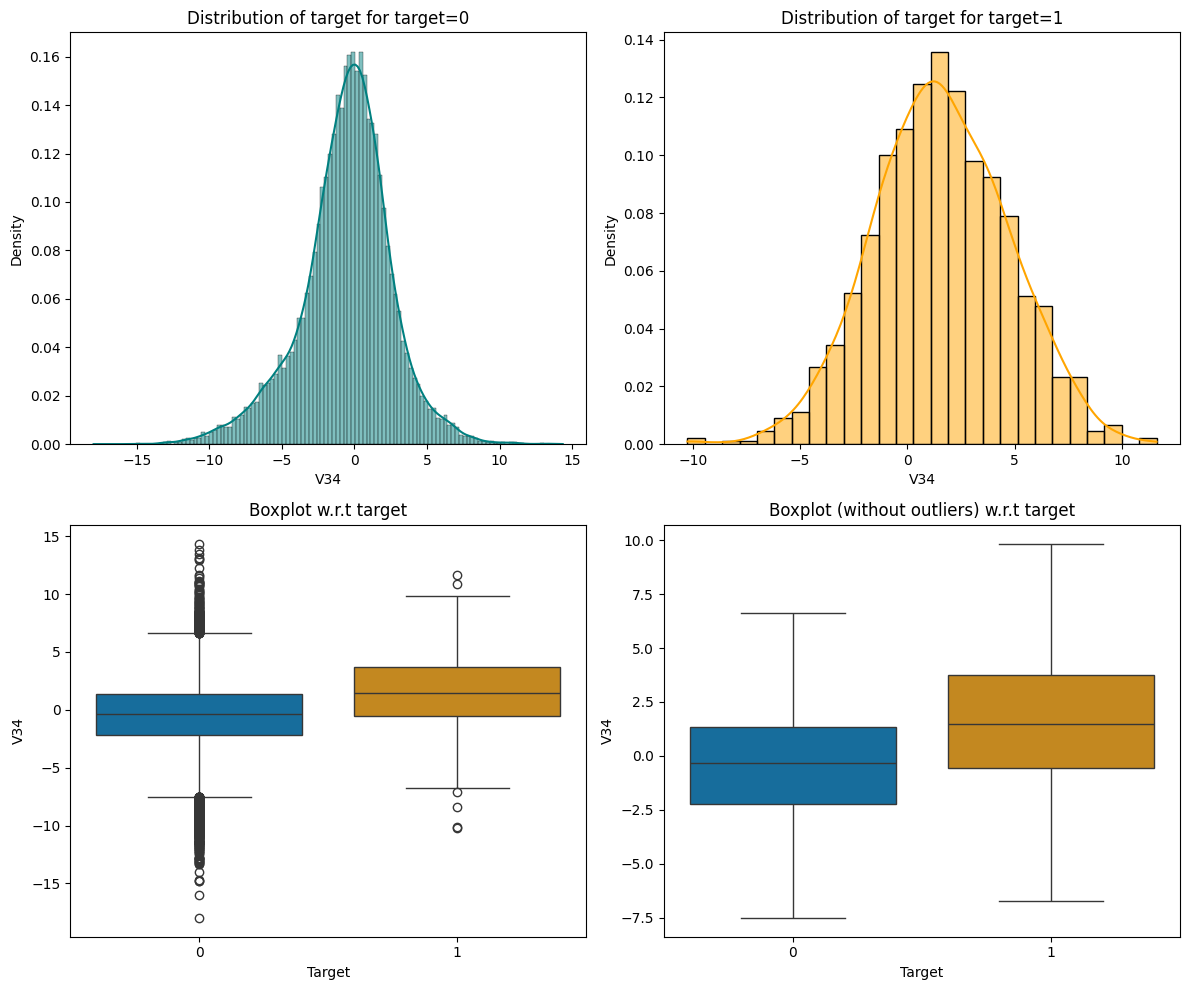

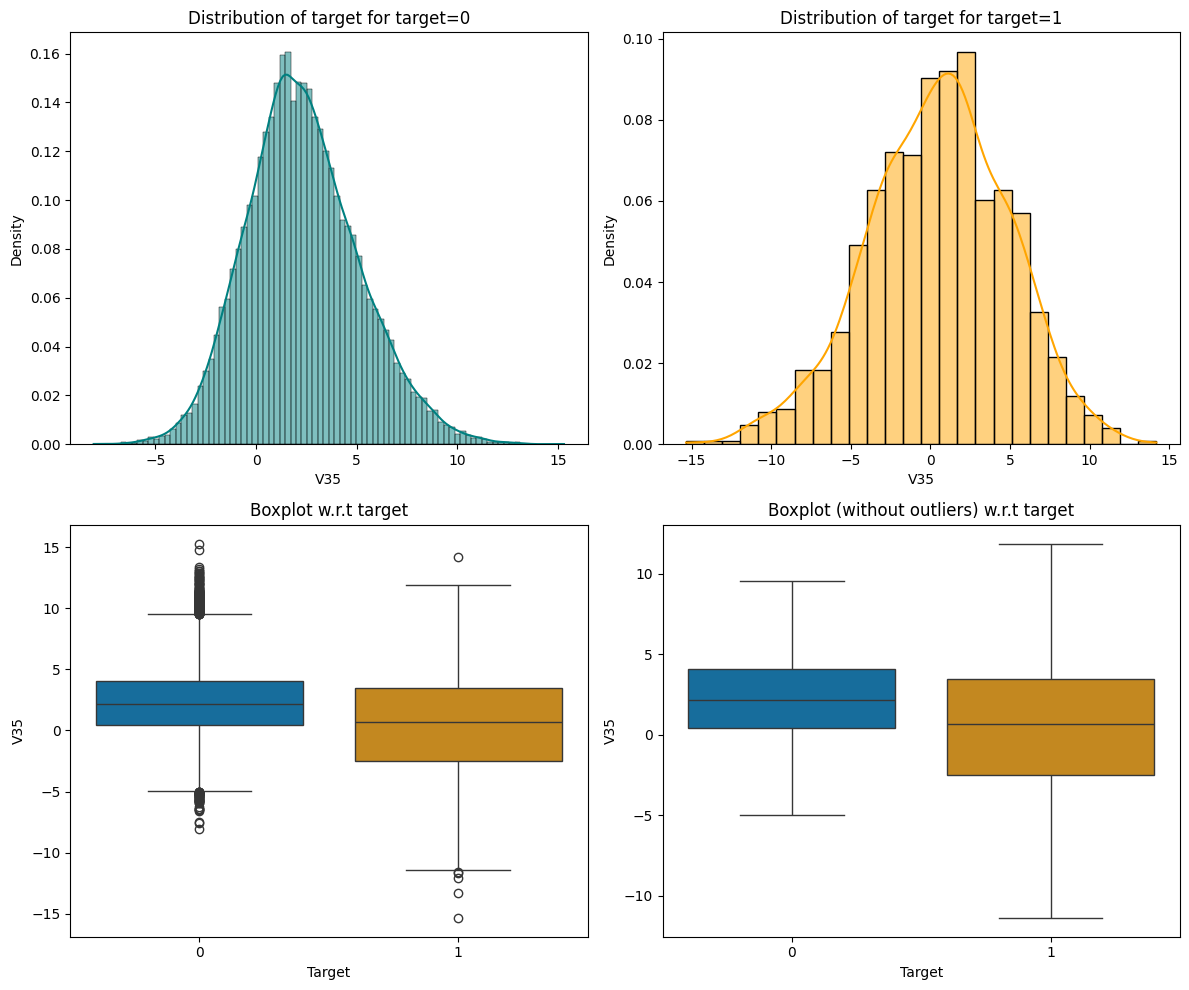

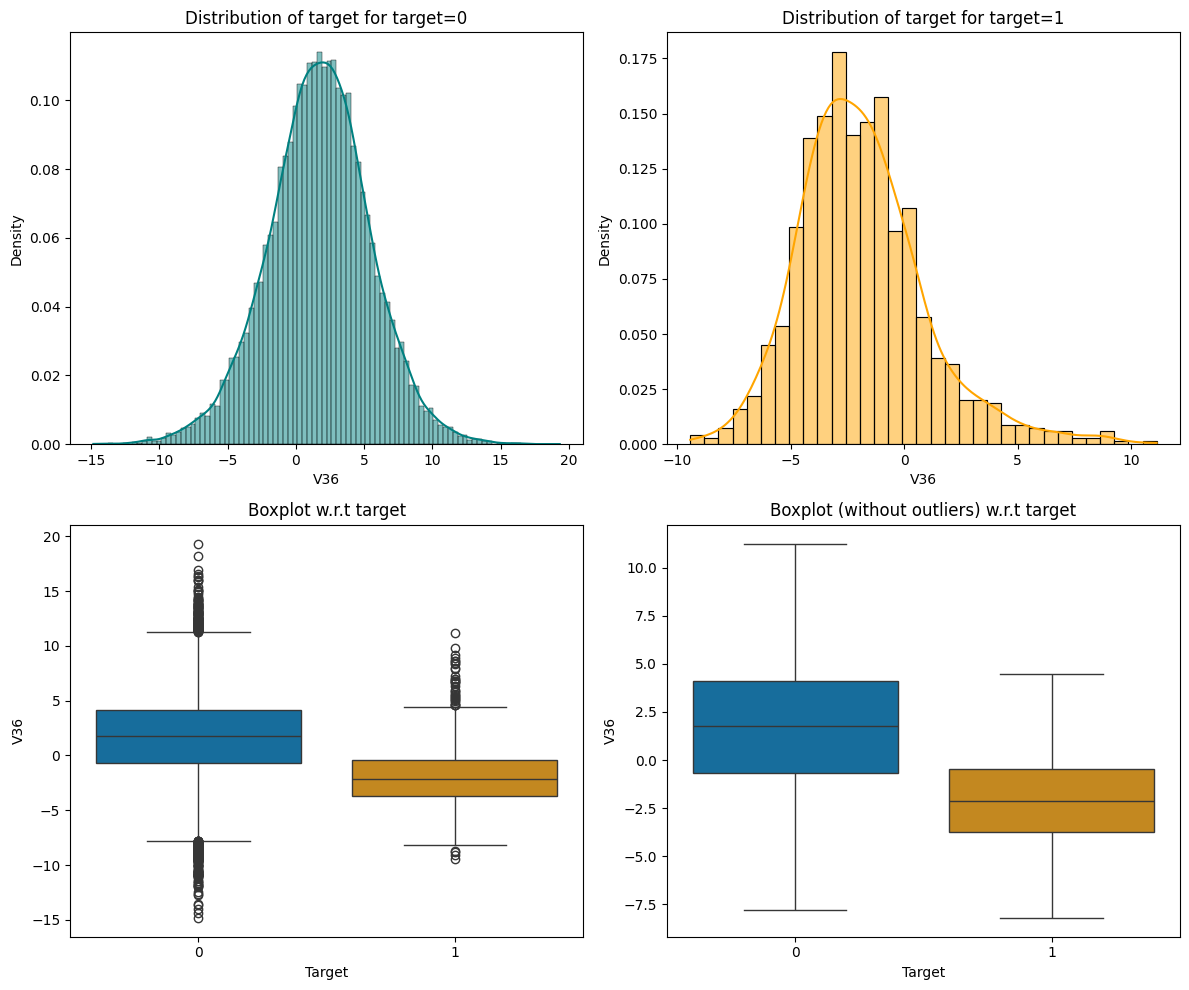

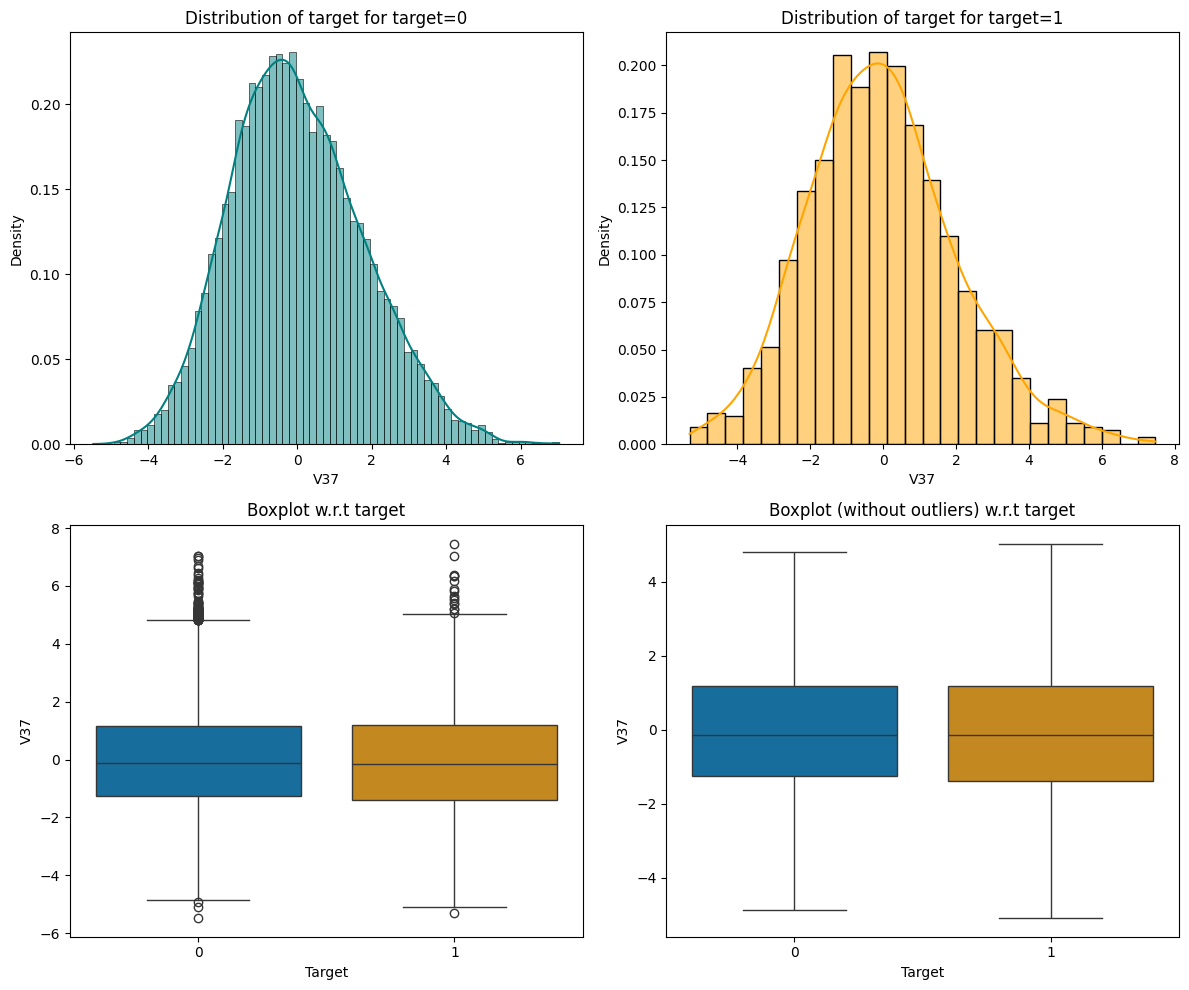

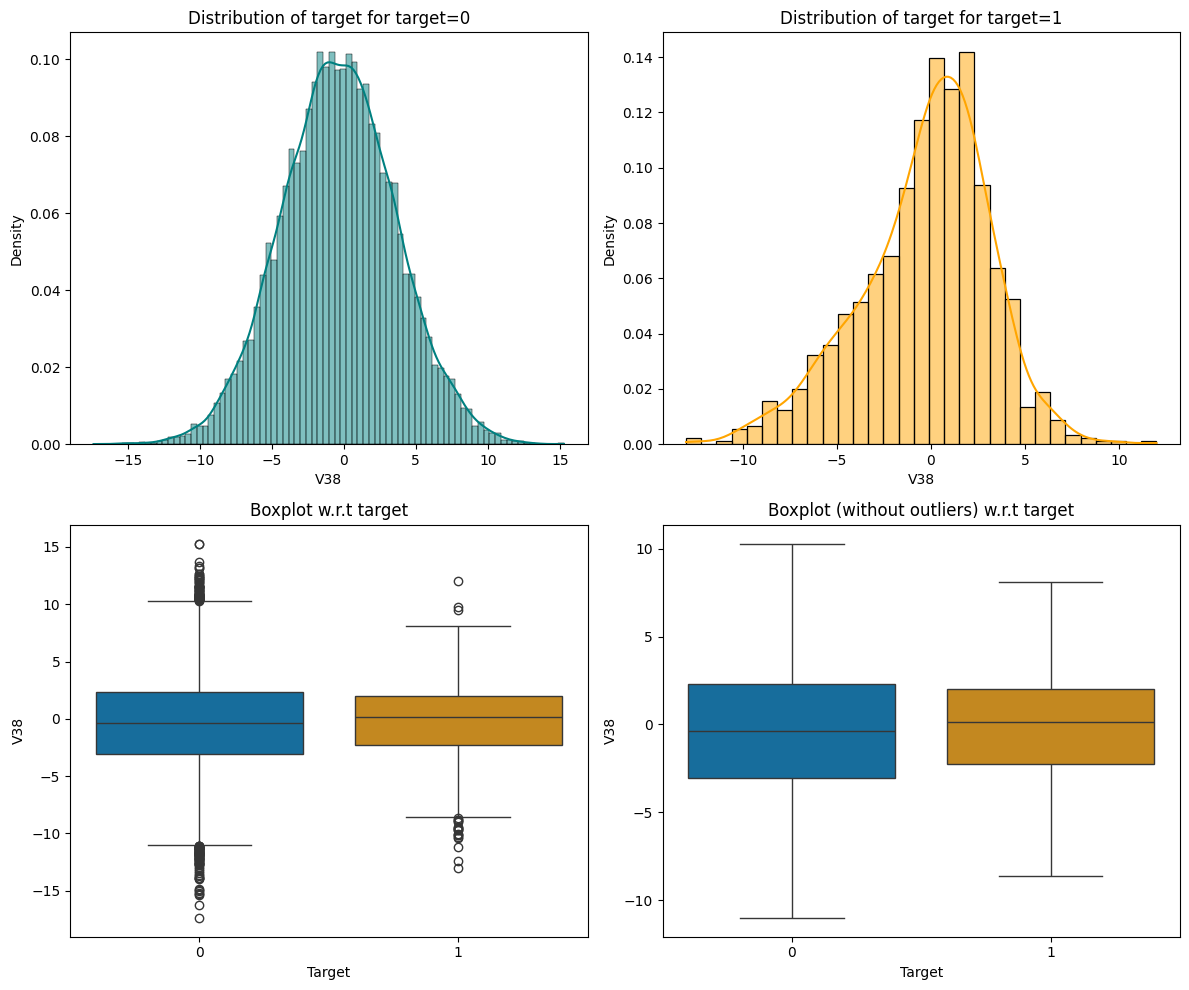

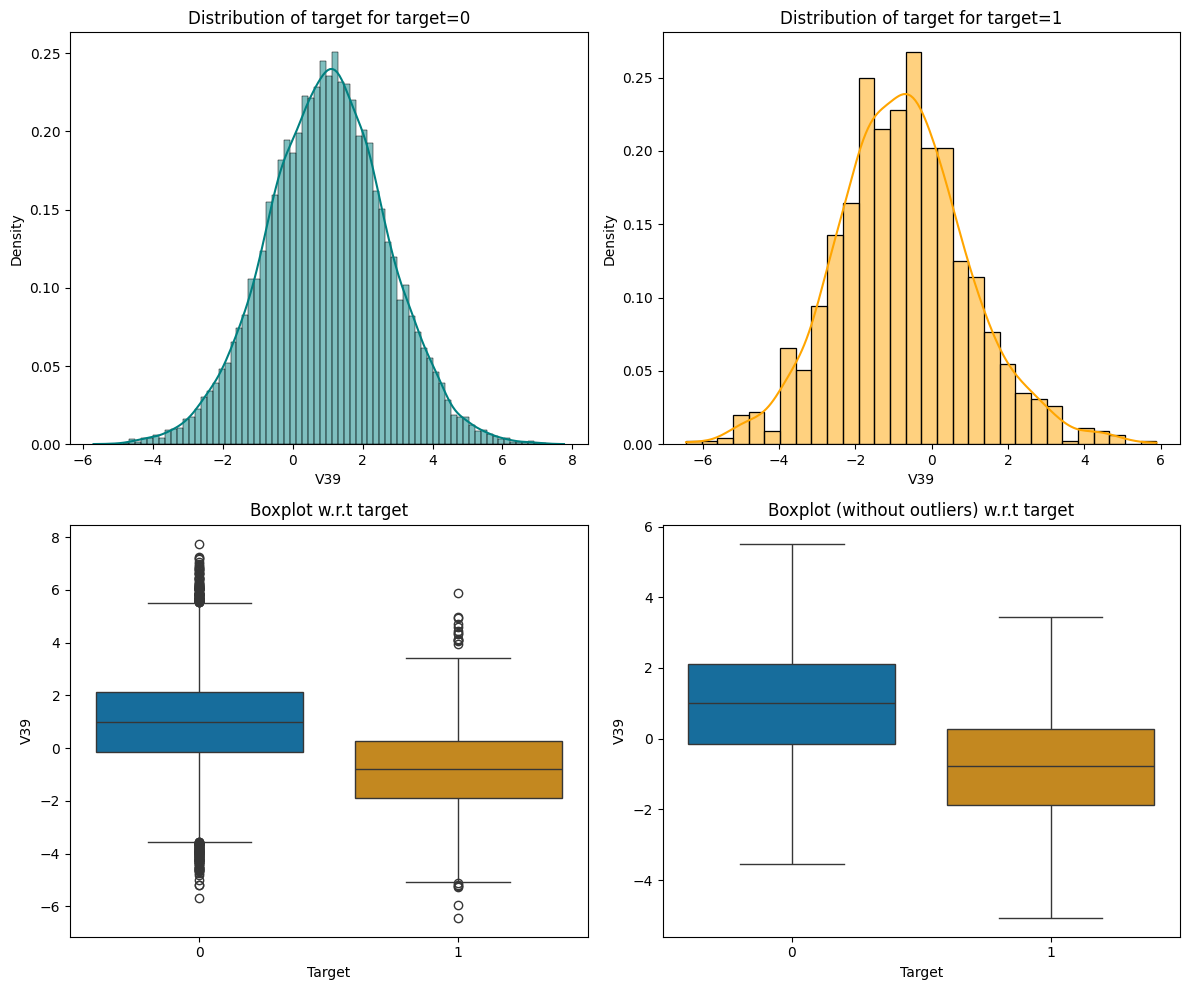

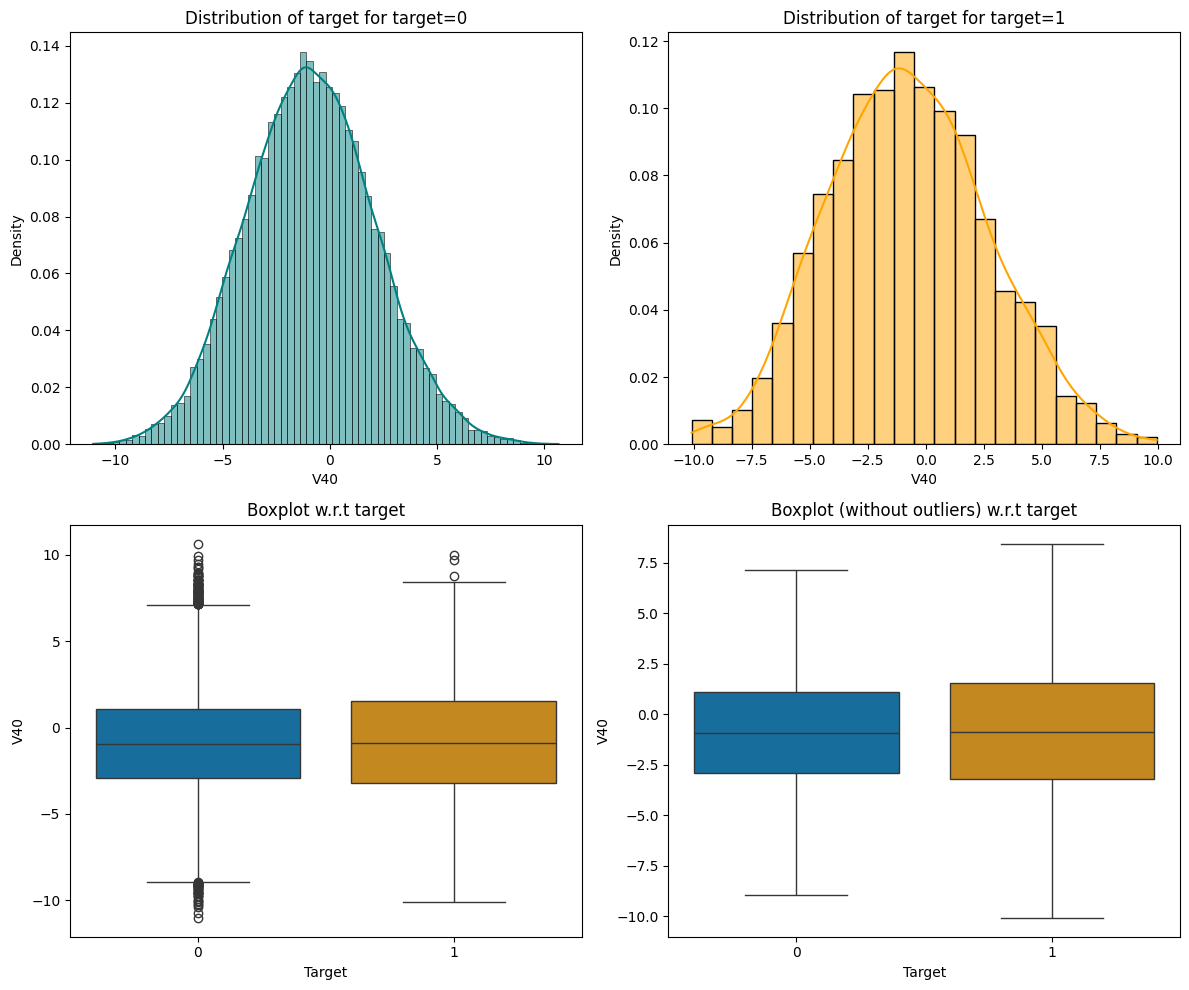

In [ ]:
# Independent variables
target = 'Target'
predictors = [col for col in df.columns if col != target]

for i, predictor in enumerate(predictors):
  distribution_plot_wrt_target(df, predictor, target)

**Multivariate Analysis Observations:**
- The data was separated by target status, so that the distributions of each class can be analyzed separately against all predictors. We will call each class as follows for easier reference as needed:

  - Group A: Generators in need of repair
  - Group B: Generators that do not need repairs

- The most significant differences of median values between Group A and Group B occurred between the following features:
  - `V3`: The median value of Group A is 0 and the median value of Group B is 2.5, for feature `V3`.
  - `V7`: The median value for Group A is 1 and the median value for Group B is -1.
  - `V11`: The median value for Group A is approximately 1 and the median value for Group B is -2 for this feature.
  - `V13`: Group A has a median value of approximately 0 for this feature , whereas Group B has a median value of 2.
  - `V14`: Group A has a `V14` median value of 0, while Group B has a median value of-1.
  - `V15`: Group A has a median value of 1 for this feature and Group B has a median value of -2.
  - `V16`: For this feature, Group A and Group B have median values of 1 and -3 respectively.
  - `V18`: Group A and Group B have median values of -2 and approximately 1 respectively.
  - `V21`: Group A has  a median `V21` value of 0, while Group B has a median `V21` value of approximately -3.
  - `V26`: Group A and Group B have median values of -1 and 2 respectively for this feature,
  - `V28`: Group A has a median value of 1, while Group B has a median value of -1 for this feature.
  - `V31`: Group A and Group B have median values of -1 and 1 for `V31`, respectively.
  - `V34`: Group A and Group B have median values of 2 and -1 for `V34` respectively.
  - `V35`: Group A has a median `V35` value of 1, while Group B has that of 2.
  - `V36`: Group A and Group B have median `V36` values of -2 and 2 respectively.
  - `V39`: Group A and Group B have median `V39` values of -1 and 1 respectively.
- Generators in need of repair had higher median values for these features (18 total):
  - `V1, V4, V7, V8, V11, V14, V15, V16, V17, V19, V20, V21, V23, V27, V28, V29, V34, V38`
- Generators in need of repair had lower median values for these features (14 total):
  - `V3, V5, V10, V13, V18, V22, V24, V26, V31, V32, V33, V35, V36, V39`
- Note that some features listed here are also listed previously, due to the significant discrepancies in their values among the 2 classes.
- Features not mentioned had similar median values among the 2 classes and hence, were not noted.

## **Data Pre-processing**

###**Data Preparation for Modeling**

In [ ]:
#Create a copy of the datasets to preserve original versions
df1 = df.copy()
df1_test = df_test.copy()

In [ ]:
#Separate independent and dependent variables in training set
X = df.drop(['Target'], axis=1)
y= df['Target']

#Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)

print(f'X_train: {X_train.shape} \nX_val: {X_val.shape}')

X_train: (16000, 40) 
X_val: (4000, 40)


In [ ]:
#Separate independent and dependent variables in test set
X_test = df_test.drop(['Target'], axis=1)
y_test = df_test['Target']

### **Missing value imputation**



In [ ]:
#Initialize SimpleImputer
imputer = SimpleImputer(strategy='median')

#Fit and transform X_train set
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)

#Transform validation set
X_val = pd.DataFrame(imputer.transform(X_val), columns = X_train.columns)

#Transform test data
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_train.columns)

#Ensure all missing values have been imputed
print(X_train.isnull().sum())
print('-'*40)
print(X_val.isnull().sum())
print('-'*40)
print(X_test.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
----------------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
----------------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V

- All missing values have been imputed.

### **Outlier Detection**



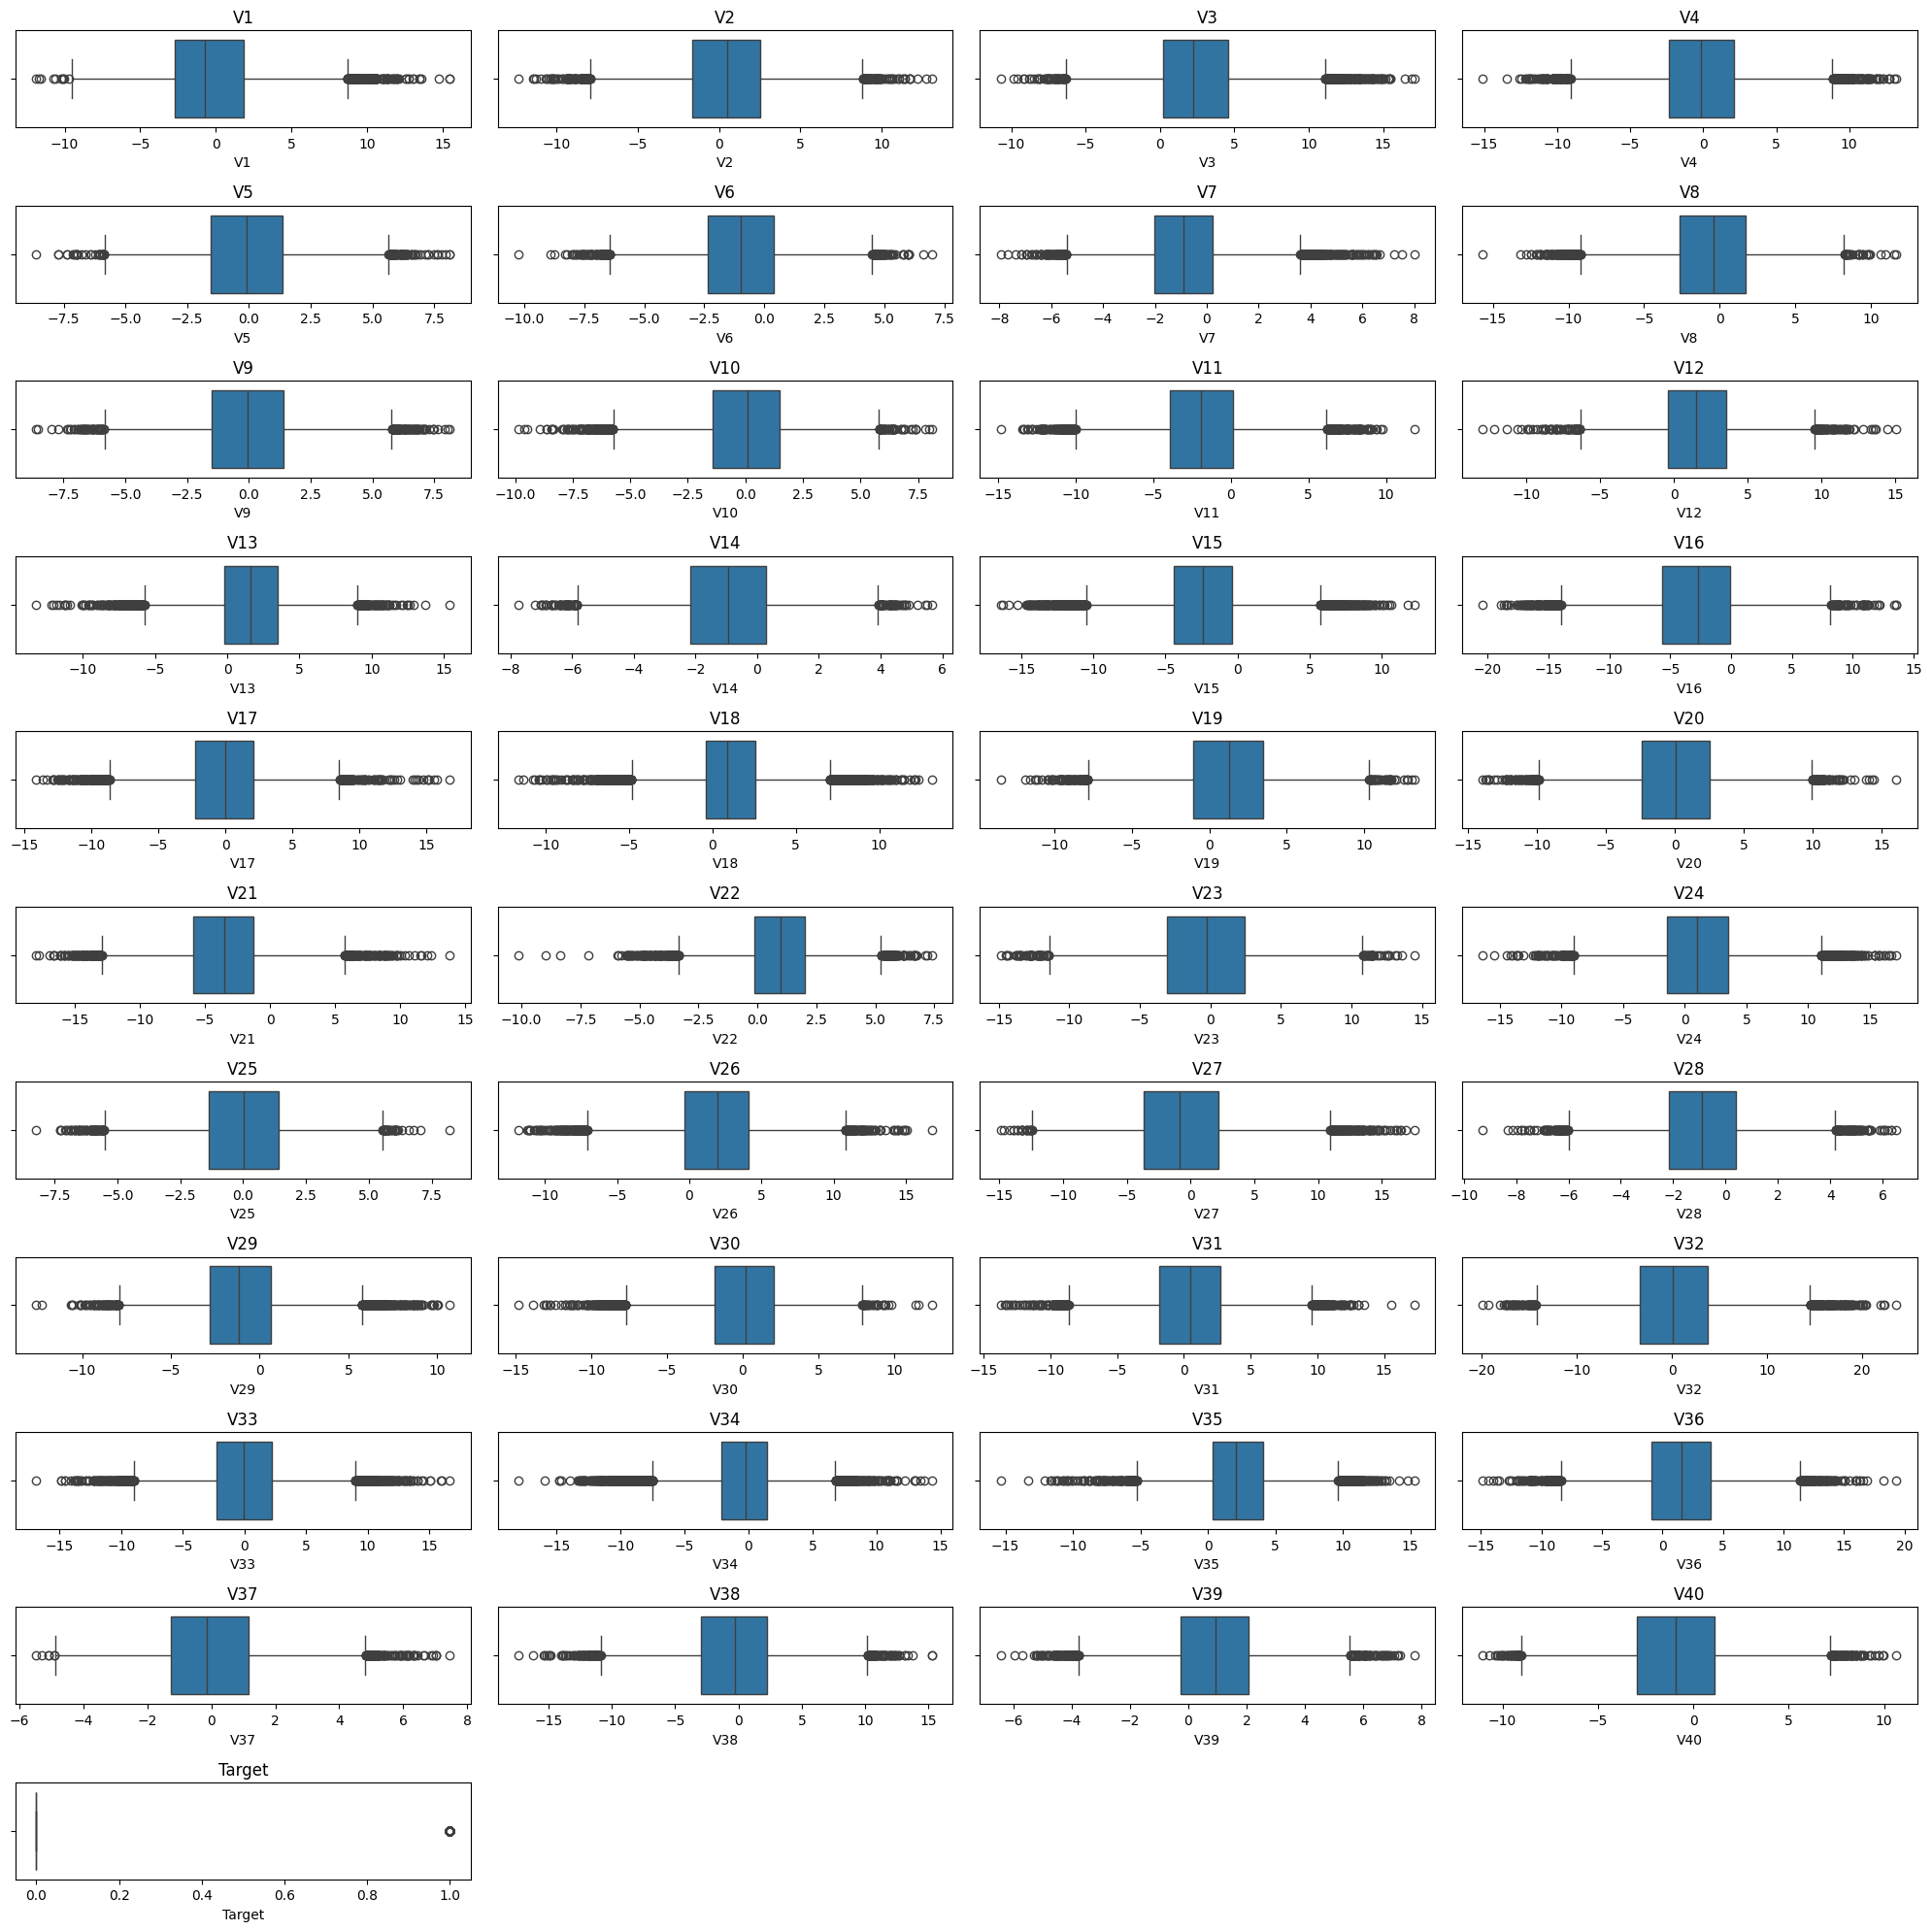

In [ ]:
#Display outliers
num_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,20))

for i, col in enumerate(num_col):
  plt.subplot (11, 4, i+1)
  sns.boxplot(data=df, x=col)
  plt.title(col)
  plt.tight_layout()

- Given that the features are ciphered, outliers will not be treated.

## **Model Building**

### **Model evaluation criterion**

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**
* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target, ax=None):
  '''
  To plot the confusion matrix wirh row-wise percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  ax: the axis to plot on (for subplots)
  '''
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  cm_perc = [[x/sum(row) for x in row] for row in cm]
  labels = np.asarray(
      [
          ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / row.sum())]
          for row in cm for item in row
      ]
  ).reshape(2,2)

  sns.heatmap(cm_perc, annot=labels, fmt='', ax=ax)
  ax.set_ylabel('True Label')
  ax.set_xlabel('Predicted Label')

In [ ]:
#Function to plot two confusion matrices side by side
def plot_confusion_matrices(model, X_train, y_train, X_val, y_val, model_name):
  '''
  Plots confusion matrices for train and validation datasets side by side.

  model: classifier
  X_train, y_train: Training data
  X_val, y_val: Validation or test data (for final model)
  model_name: Model name for subplot titles
  '''

  #Create a subplot layout for 2 confusion matrices
  fig, axes = plt.subplots(1, 2, figsize=(12,5))

  #Plot confusion matrix for train set, referencing the confusion_matrix_sklearn function
  confusion_matrix_sklearn(model, X_train, y_train, ax=axes[0])
  axes[0].set_title(f'{model_name} Performance on Train Set');

  #Plot confusion matrix for validation set, referencing the confusion_matrix_sklearn function
  confusion_matrix_sklearn(model, X_val, y_val, ax=axes[1])
  axes[1].set_title(f'{model_name} Performance on Validation Set');

### **Defining scorer to be used for cross-validation and hyperparameter tuning**

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### **Model Building with original data**

####**Building initial models with original data**

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.48988129245223133
dtree: 0.7196280073636767
Random Forest: 0.7195899193804354
Bagging: 0.7083222243382213
Adaboost: 0.5382784231574939
Gradient Boost: 0.7173363803719928

Validation Performance:

Logistic Regression: 0.49099099099099097
dtree: 0.7387387387387387
Random Forest: 0.7432432432432432
Bagging: 0.7207207207207207
Adaboost: 0.5630630630630631
Gradient Boost: 0.7432432432432432
CPU times: user 7min 2s, sys: 773 ms, total: 7min 2s
Wall time: 7min 10s


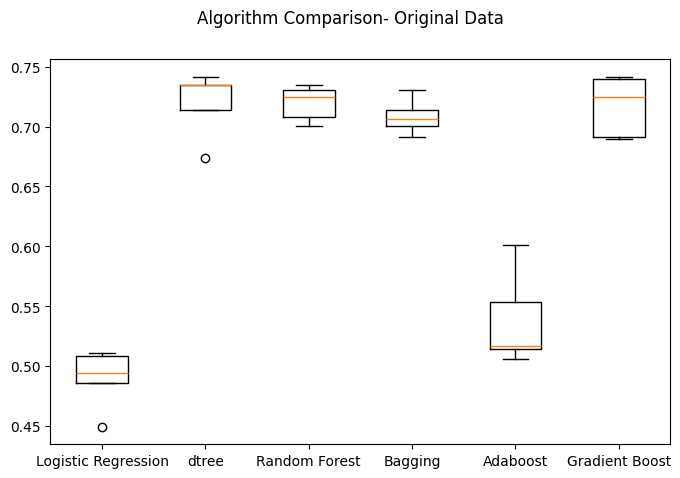

In [ ]:
#Plot points for CV score of all models defined above
fig = plt.figure(figsize=(8,5))

fig.suptitle('Algorithm Comparison- Original Data')
ax=fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- The decision tree and random forest classifiers generalize the best, as they have the highest cross validation scores, followed by the gradient boost classifier.

### **Model Building with Oversampled data**


####**Oversampling train data using SMOTE**

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before oversampling, the count of label "1" = {}'.format(sum(y_train == 1)))
print('Before oversampling, the count of label "0" = {} \n'.format(sum(y_train == 0)))

print('After oversampling, the count of label "1" = {}'.format(sum(y_train_over == 1)))
print('After oversampling, the count of label "0" = {}\n'.format(sum(y_train_over == 0)))

print('After oversampling, the shape of train_X = {}'.format(X_train_over.shape))
print('After oversampling, the shape of train_y = {}'.format(y_train_over.shape))

Before oversampling, the count of label "1" = 888
Before oversampling, the count of label "0" = 15112 

After oversampling, the count of label "1" = 15112
After oversampling, the count of label "0" = 15112

After oversampling, the shape of train_X = (30224, 40)
After oversampling, the shape of train_y = (30224,)


####**Building initial models with oversampled data**

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8812865538044636
dtree: 0.9732668119313808
Random Forest: 0.9856406421275405
Bagging: 0.9781630048735123
Adaboost: 0.8827421272560054
Gradient Boost: 0.9239674518302545

Validation Performance:

Logistic Regression: 0.8513513513513513
dtree: 0.8198198198198198
Random Forest: 0.8558558558558559
Bagging: 0.8423423423423423
Adaboost: 0.8603603603603603
Gradient Boost: 0.8783783783783784
CPU times: user 11min 34s, sys: 1.08 s, total: 11min 35s
Wall time: 11min 38s


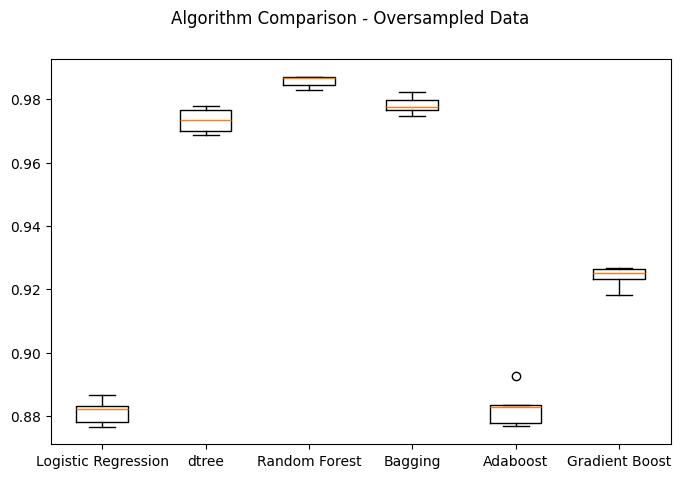

In [ ]:
#Plot points for CV score of all models defined above
fig = plt.figure(figsize=(8,5))

fig.suptitle('Algorithm Comparison - Oversampled Data')
ax=fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- The random forest model generalizes the best, followed by the bagging classifer and the decision tree classifier.

### **Model Building with Undersampled data**

####**Undersampling train data using RandomUnderSampler**

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print('Before undersampling, the count of label "1" = {}'.format(sum(y_train == 1)))
print('Before undersampling, the count of label "0" = {} \n'.format(sum(y_train == 0)))

print('After undersampling, the count of label "1" = {}'.format(sum(y_train_un == 1)))
print('After undersampling, the count of label "0" = {}\n'.format(sum(y_train_un == 0)))

print('After undersampling, the shape of train_X = {}'.format(X_train_un.shape))
print('After undersampling, the shape of train_y = {}'.format(y_train_un.shape))

Before undersampling, the count of label "1" = 888
Before undersampling, the count of label "0" = 15112 

After undersampling, the count of label "1" = 888
After undersampling, the count of label "0" = 888

After undersampling, the shape of train_X = (1776, 40)
After undersampling, the shape of train_y = (1776,)


####**Building initial models with undersampled data**

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8513235574176348
dtree: 0.8468355233923697
Random Forest: 0.8975052370976957
Bagging: 0.8704627689963816
Adaboost: 0.8569859709261728
Gradient Boost: 0.8907446200723672

Validation Performance:

Logistic Regression: 0.8648648648648649
dtree: 0.8468468468468469
Random Forest: 0.8783783783783784
Bagging: 0.8918918918918919
Adaboost: 0.8558558558558559
Gradient Boost: 0.8873873873873874
CPU times: user 33.3 s, sys: 360 ms, total: 33.6 s
Wall time: 33.5 s


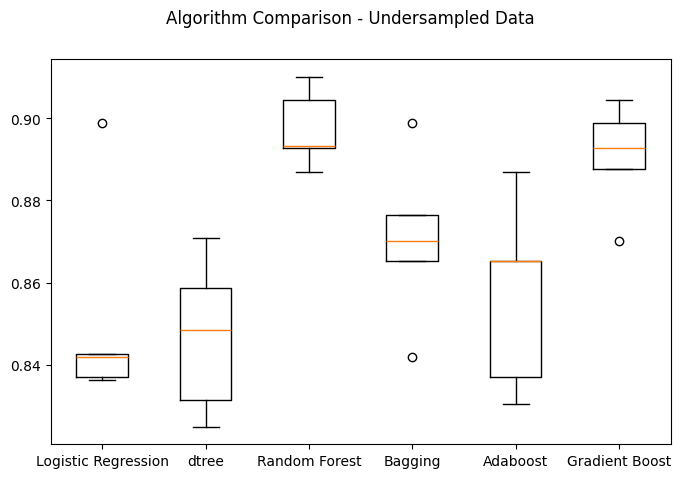

In [ ]:
#Plot points for CV score of all models defined above
fig = plt.figure(figsize=(8,5))

fig.suptitle('Algorithm Comparison - Undersampled Data')
ax=fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- The models that generalize the best, using undersampled data, are the random forest classifier and the gradient boost classifier.

####**Initial Model Summary**
- Based on their respective cross validation scores, the best initial models are as follows:
  - Random forest classifier trained using oversampled data (CV score = 0.99)
  - Bagging classifier trained using oversampled data (CV score = 0.98)
  - Random forest classifier using undersampled data (CV score = 0.90)
  - Gradient boosting classifier trained on undersampled data (CV score = 0.89)
- The hyperparameters of the mentioned classifers will be tuned in an attempt to optimize their performances.

## **HyperparameterTuning**

###**Tuning Random Forest Classifier -  Oversampled Data**
- Tuning method = RandomizedSearchCV

In [ ]:
Model = RandomForestClassifier(random_state=1)

param_grid = { "n_estimators": [100, 200,250,300],
              "min_samples_leaf": np.arange(2, 6),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.3, 0.6, 0.1)
              }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9751852168889167:


In [ ]:
#Build model with the best parameters
rf_tuned_over = RandomForestClassifier(
    random_state = 1,
    n_estimators = 100,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    max_samples = 0.5,

)

#Fit the model on the oversampled training data
rf_tuned_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, random_state=1)

####**Checking performance on oversampled train and validation data:**

In [ ]:
#Check performance on the oversampled training set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_tuned_over, X_train_over, y_train_over
)
rf_over_train_perf

Accuracy  Recall  Precision    F1
0     0.997   0.994      0.999 0.997

In [ ]:
#Check performance on the validation set
rf_over_val_perf = model_performance_classification_sklearn(
    rf_tuned_over, X_val, y_val
)
rf_over_val_perf

Accuracy  Recall  Precision    F1
0     0.987   0.865      0.893 0.879

- This model has an adequate recall score on the validation set but is showing signs of overfitting.

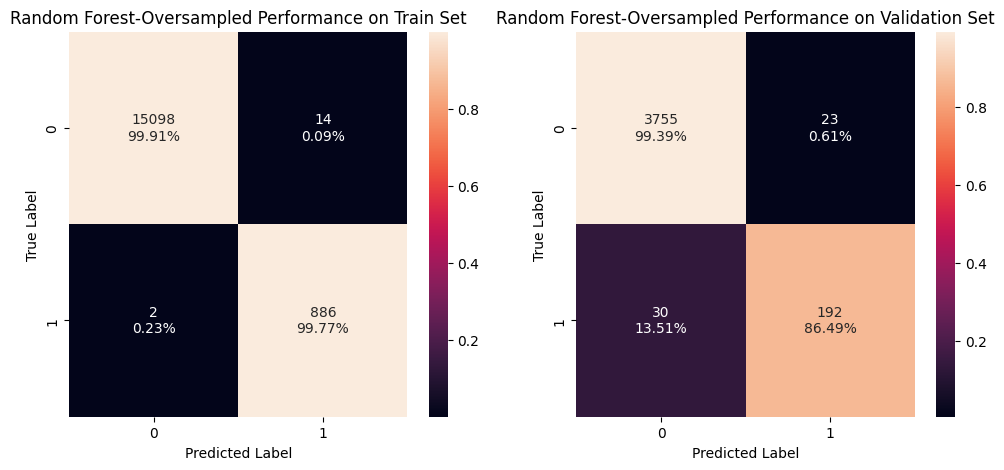

In [ ]:
#Plot confusion matrices
plot_confusion_matrices(rf_tuned_over, X_train, y_train, X_val, y_val, 'Random Forest-Oversampled')

- The classifer can accurately detect 86% of generators that are in need of repairs and accurately classifies almost 100% of the generators that are not in need of repairs.

###**Tuning Bagging Classifier -  Oversampled Data**
- Tuning method = RandomizedSearchCV

In [ ]:
Model = BaggingClassifier(random_state=1)

param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70]
               }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.9835230801665501:


In [ ]:
#Build model with best parameters
bag_clf_over = BaggingClassifier(
    random_state = 1,
    max_samples = 0.9,
    max_features = 0.9,
    n_estimators = 70
)

bag_clf_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

####**Checking performance on oversampled train and validation data:**

In [ ]:
#Check performance on the oversampled training set
bag_clf_over_train_perf = model_performance_classification_sklearn(
    bag_clf_over, X_train_over, y_train_over
)
bag_clf_over_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
#Check performance on the validation set
bag_clf_over_val_perf = model_performance_classification_sklearn(
    bag_clf_over, X_val, y_val
)
bag_clf_over_val_perf

Accuracy  Recall  Precision    F1
0     0.984   0.856      0.856 0.856

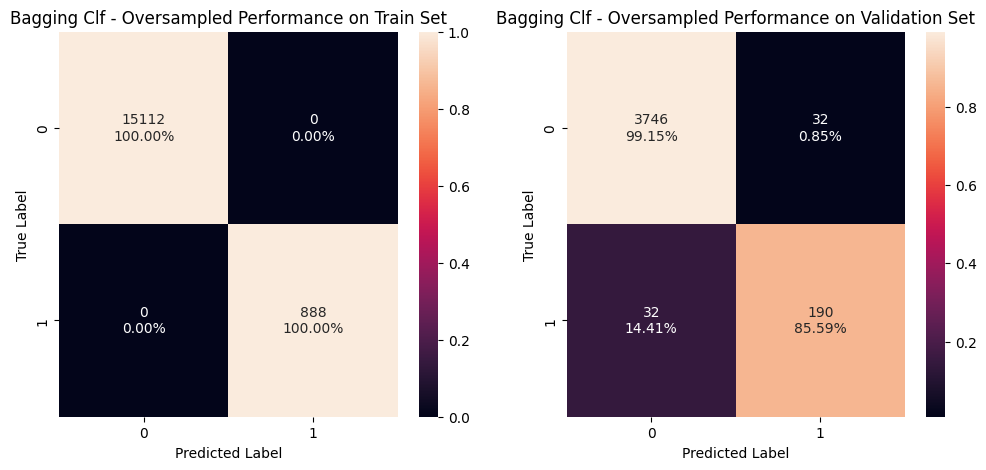

In [ ]:
#Plot confusion matrices
plot_confusion_matrices(bag_clf_over, X_train, y_train, X_val, y_val, 'Bagging Clf - Oversampled')

- This model has a performance compared to the tuned random forest classifier previously generated, such that it can accurately identify 86% of faulty machines and 99% of well performing machines. This model, too, shows signs of overfitting.

###**Tuning Random Forest Classifier -  Undersampled Data**
- Tuning method = RandomizedSearchCV

In [ ]:
Model = RandomForestClassifier(random_state=1)

param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1)
              }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8941979305529106:


In [ ]:
#Build model with the best parameters
rf_tuned_un = RandomForestClassifier(
    random_state = 1,
    n_estimators =250,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    max_samples = 0.5
)

#Fit the model on the oversampled training data
rf_tuned_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250,
                       random_state=1)

####**Checking performance on undersampled train and validation data:**

In [ ]:
#Check performance on the undersampled training set
rf_un_train_perf = model_performance_classification_sklearn(
    rf_tuned_un, X_train_un, y_train_un
)
rf_un_train_perf

Accuracy  Recall  Precision    F1
0     0.963   0.934      0.993 0.962

In [ ]:
#Check performance on the validation set
rf_un_val_perf = model_performance_classification_sklearn(
    rf_tuned_un, X_val, y_val
)
rf_un_val_perf

Accuracy  Recall  Precision    F1
0     0.936   0.878      0.460 0.604

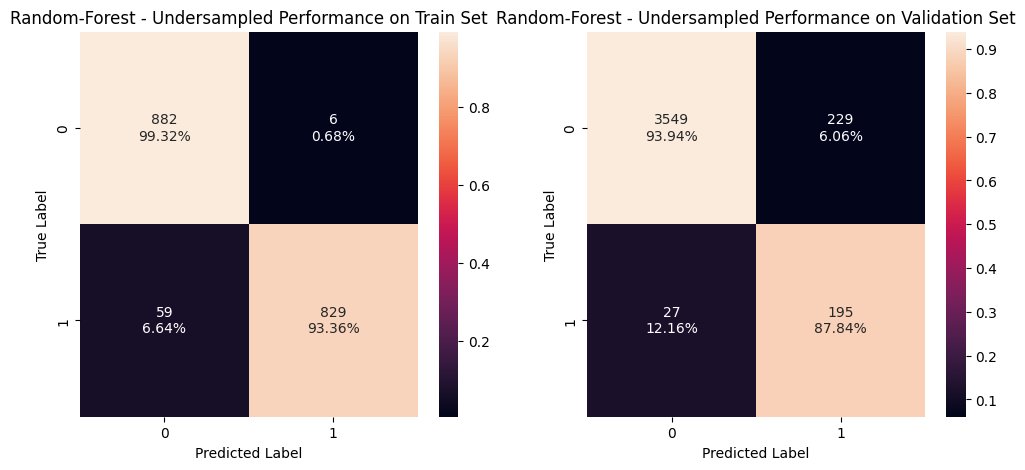

In [ ]:
#Plot confusion matrices
plot_confusion_matrices(rf_tuned_un, X_train_un, y_train_un, X_val, y_val, 'Random-Forest - Undersampled')

- This model can accurately identify 88% of all generators that are in need of repair and 94% of generators that do not need repairs.
- Although this model is overfitting, it generalizes better than previous models, in terms of recall score.

###**Tuning Gradient Boosting Classifier -  Undersampled Data**
- Tuning method = RandomizedSearchCV

In [ ]:
#initiate model
Model = GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.01, 0.05,0.1, 0.2, 1],
              "subsample":[0.5,0.6,0.7],
              "max_features":[0.3, 0.5,0.7]
               }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.6, 'n_estimators': 125, 'max_features': 0.3, 'learning_rate': 0.2} with CV score=0.898673268583762:


In [ ]:
#Create model with best parameters
gbm_tuned_un = GradientBoostingClassifier(
    n_estimators = 125,
    learning_rate = 0.2,
    subsample = 0.6,
    max_features = 0.3
)

gbm_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.3,
                           n_estimators=125, subsample=0.6)

####**Checking performance on undersampled train and validation data:**

In [ ]:
#Check performance on the undersampled training set
gbm_un_train_perf = model_performance_classification_sklearn(
    gbm_tuned_un, X_train_un, y_train_un
)
gbm_un_train_perf

Accuracy  Recall  Precision    F1
0     0.994   0.989      0.999 0.994

In [ ]:
#Check performance on the validation set
gbm_un_val_perf = model_performance_classification_sklearn(
    gbm_tuned_un, X_val, y_val
)
gbm_un_val_perf

Accuracy  Recall  Precision    F1
0     0.927   0.869      0.425 0.571

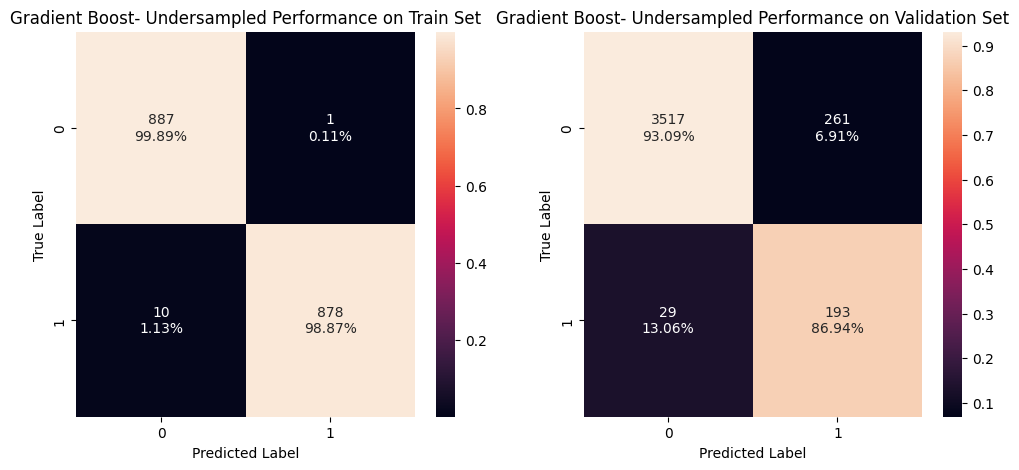

In [ ]:
#Plot confusion matrices
plot_confusion_matrices(gbm_tuned_un, X_train_un, y_train_un, X_val, y_val, 'Gradient Boost- Undersampled')

- This model can accurately label 87% of all generators that are in need of repair and 93% of all generators that do not need a repair.
- Similar to the previous model, this model has a low precision score on the validation set as well.
- Although the recall score is high, the model is not generalizing very well as it is showing signs of overfitting.

###**Tuning Gradient Boosting Classifier -  Undersampled Data**
- Tuning method = GridSearchCV

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.01, 0.05,0.1, 0.2, 1],
              "subsample":[0.5,0.6,0.7],
              "max_features":[0.3, 0.5,0.7]
               }

#Calling RandomizedSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, n_jobs = -1, cv=5)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 100, 'subsample': 0.6} with CV score=0.9031866945978543:
CPU times: user 6.21 s, sys: 647 ms, total: 6.86 s
Wall time: 6min 36s


In [ ]:
#Create model with best parameters
gbm_gridcv_un = GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.2,
    subsample = 0.6,
    max_features = 0.7
)

gbm_gridcv_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, subsample=0.6)

In [ ]:
#Check performance on the undersampled training set
gbm_grid_un_train_perf = model_performance_classification_sklearn(
    gbm_gridcv_un, X_train_un, y_train_un
)
gbm_grid_un_train_perf

Accuracy  Recall  Precision    F1
0     0.987   0.977      0.997 0.987

In [ ]:
#Check performance on the validation set
gbm_grid_un_val_perf = model_performance_classification_sklearn(
    gbm_gridcv_un, X_val, y_val
)
gbm_grid_un_val_perf

Accuracy  Recall  Precision    F1
0     0.922   0.887      0.406 0.557

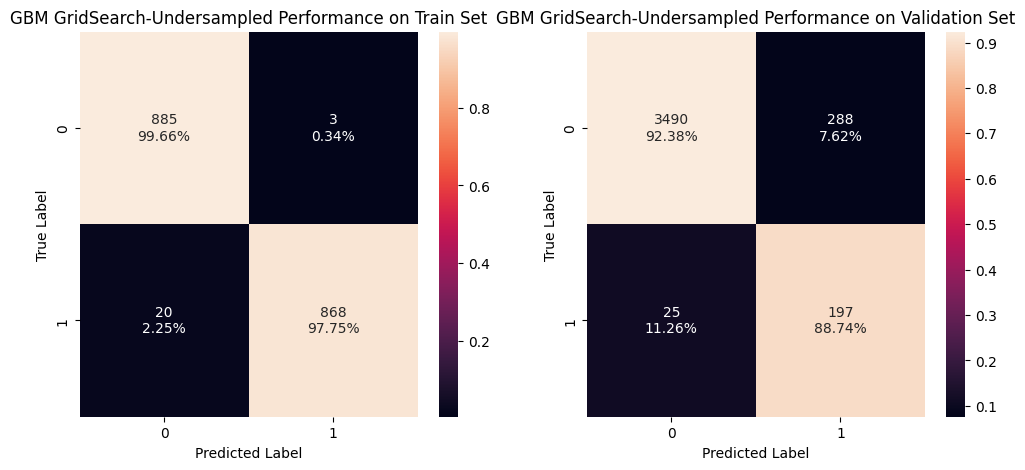

In [ ]:
#Plot confusion matrices
plot_confusion_matrices(gbm_gridcv_un, X_train_un, y_train_un, X_val, y_val, 'GBM GridSearch-Undersampled')

- This model has a good recall score on the validation set but does not generalize well.

## **Model performance comparison and choosing the final model**

###**Training Performance Comparison**

In [ ]:
models_train_comp_df = pd.concat(
    [
        rf_over_train_perf.T,
        bag_clf_over_train_perf.T,
        rf_un_train_perf.T,
        gbm_un_train_perf.T,
        gbm_grid_un_train_perf.T
    ],
    axis=1,
)

#Set column names
models_train_comp_df.columns = [
    'Random Forest - Oversampled & Tuned with Random Search',
    'Bagging Classifier - Oversampled & Tuned with Random Search',
    'Random Forest - Undersampled & Tuned with Random Search',
    'Gradient Boost - Undersampled & Tuned with Random Search',
    'Gradient Boost - Undersampled & Tuned with Grid Search',

]
print('Training Performance Comparison:')
models_train_comp_df

Training Performance Comparison:


Random Forest - Oversampled & Tuned with Random Search  \
Accuracy                                               0.997        
Recall                                                 0.994        
Precision                                              0.999        
F1                                                     0.997        

           Bagging Classifier - Oversampled & Tuned with Random Search  \
Accuracy                                               1.000             
Recall                                                 1.000             
Precision                                              1.000             
F1                                                     1.000             

           Random Forest - Undersampled & Tuned with Random Search  \
Accuracy                                               0.963         
Recall                                                 0.934         
Precision                                              0.993         
F1                                                     0.962         

           Gradient Boost - Undersampled & Tuned with Random Search  \
Accuracy                                               0.994          
Recall                                                 0.989          
Precision                                              0.999          
F1                                                     0.994          

           Gradient Boost - Undersampled & Tuned with Grid Search  
Accuracy                                               0.987       
Recall                                                 0.977       
Precision                                              0.997       
F1                                                     0.987

###**Validation Performance Comparison**

In [ ]:
models_val_comp_df = pd.concat(
    [
        rf_over_val_perf.T,
        bag_clf_over_val_perf.T,
        rf_un_val_perf.T,
        gbm_un_val_perf.T,
        gbm_grid_un_val_perf.T
    ],
    axis=1,
)

#Set column names
models_val_comp_df.columns = [
    'Random Forest - Oversampled & Tuned with Random Search',
    'Bagging Classifier - Oversampled & Tuned with Random Search',
    'Random Forest - Undersampled & Tuned with Random Search',
    'Gradient Boost - Undersampled & Tuned with Random Search',
    'Gradient Boost - Undersampled & Tuned with Grid Search',

]
print('Validation Performance Comparison:')
models_val_comp_df

Validation Performance Comparison:


Random Forest - Oversampled & Tuned with Random Search  \
Accuracy                                               0.987        
Recall                                                 0.865        
Precision                                              0.893        
F1                                                     0.879        

           Bagging Classifier - Oversampled & Tuned with Random Search  \
Accuracy                                               0.984             
Recall                                                 0.856             
Precision                                              0.856             
F1                                                     0.856             

           Random Forest - Undersampled & Tuned with Random Search  \
Accuracy                                               0.936         
Recall                                                 0.878         
Precision                                              0.460         
F1                                                     0.604         

           Gradient Boost - Undersampled & Tuned with Random Search  \
Accuracy                                               0.927          
Recall                                                 0.869          
Precision                                              0.425          
F1                                                     0.571          

           Gradient Boost - Undersampled & Tuned with Grid Search  
Accuracy                                               0.922       
Recall                                                 0.887       
Precision                                              0.406       
F1                                                     0.557

- The random forest classifier tuned with RandomizedSearchCV and trained on undersampled data generalizes the best, in terms of recall score. The recall score itself is respectable in that it correctly identifies 88% of  generators in need of repairs on the validation set.
- It is notable that the precision score is very low on the validation set. This model's performance will now be evaluated using the test set.

### **Test set final performance**

In [ ]:
#Check performance on the test set
rf_tuned_un_test = model_performance_classification_sklearn(
    rf_tuned_un, X_test, y_test
)
rf_tuned_un_test

Accuracy  Recall  Precision    F1
0     0.944   0.883      0.504 0.642

- The final model generalized well on the test set and can accurately label 88% of generators in need of repairs.
- Although it is still low, the precision score increased slightly on the test set.

### **Feature importances of the final model**

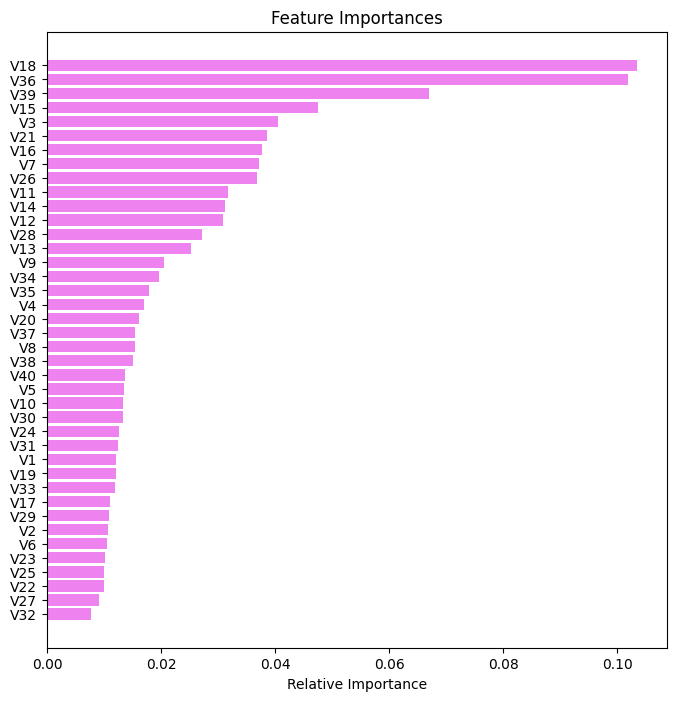

In [ ]:
importances = rf_tuned_un.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The final model identifies the features V18, V36 and V39 as the most significant.

## **Pipelines to build the final model**

- Here, we will use a pipeline to put our final model into production.
- It should be noted that we only have features with numerical data types therefore, the use of ColumnTransformer is unnecessary.

In [ ]:
#Separate independent features from target feature using original training set
X1_train = df1.drop('Target', axis=1)
y1_train = df1['Target']

#Separate independent features from target feature using original test set
X1_test = df1_test.drop('Target', axis=1)
y1_test = df1_test['Target']

In [ ]:
#Impute missing x values on train set
imputer1 = SimpleImputer(strategy='median')
X1_train_imputed = imputer1.fit_transform(X1_train)

In [ ]:
#Undersample X1_train
rus1 = RandomUnderSampler(random_state=1, sampling_strategy=1)
X1_train_un, y1_train_un = rus1.fit_resample(X1_train, y1_train)

In [ ]:
#Create a pipeline with best parameters
Final_pipeline_model = Pipeline([
    (
        'randomforestclf',
        RandomForestClassifier(
        random_state = 1,
        n_estimators = 250,
        min_samples_leaf = 2,
        max_features = 'sqrt',
        max_samples = 0.5
    ),
    ),
])

#Fit the model on the training data
Final_pipeline_model.fit(X1_train_un, y1_train_un)

Pipeline(steps=[('randomforestclf',
                 RandomForestClassifier(max_samples=0.5, min_samples_leaf=2,
                                        n_estimators=250, random_state=1))])

In [ ]:
#Check final model performance on the test set
final_perf = model_performance_classification_sklearn(
    Final_pipeline_model, X1_test, y1_test
)
final_perf

Accuracy  Recall  Precision    F1
0     0.946   0.872      0.512 0.646

- The recall score is good and the model generalizes well. The precision score is fairly low, however.

# **Business Insights and Conclusions**

###**Insights:**
- The final model generalizes well, and accurately labels 87% of all generators that are in need of repair. This can save the company money by reducing replacement costs.
- It is notable that the precision score is fairly low at 51%. That is, out of all positive predictions, 51% are truly positive. This score can definitely be improved.
- The final model assigned the greatest importance to features `V18, V36, and V39.`
- The bivariate analysis revealed that several features exhibited trends where the positive class had consistently higher or lower median values compared to the negative class. In addition to the model’s predictions, the median values for these features can serve as thresholds to help determine if a generator needs inspection.
- The bivariate analysis showed that the following features had the strongest correlation coefficients, indicating strong linear relationships: `V15 and V7 (r = 0.87), V16 and V8 (r = 0.8), V21 and V16 (r = 0.84), V29 and V11 (r = 0.81), V14 and V2 (r = -0.85)`
- The bivariate analysis showed that the feature `V27` had the highest quantity of strong linear relationships with other variables. Of those were: `V27 and V5 (r = -0.66), V27 and V17 (r = -0.71), V27 and V24 (r = -0.76), V27 and V32 (r= -0.77), V27 and V1 (r = 0.68), V27 and V25 (r = 0.77)`
- The feature `V28` also had a notable amount of strong linear relationships that included: `V28 and V4 (r = 0.66), V28 and V17 (r = 0.66), V28 and V13 (r = -0.66)`


###**Recommendations**
- Given that the final model assigned the most significance to features `V18, V36 and V39` and that these same features showed notable differences in median values with respect to class, the company should consider the following:
  - Generators with a `V18` value of -2 and below should be inspected.
  - Generators with `V35` values of -2 and below should be inspected.
  - Generators with `V39` values of -1 and below should be recommended for inspection.
  - Moreso, generators with a conjunction of the said feature values should be highly prioritized for inspection.
- Further significant differences in the median feature values across the classes indicate that machines with the following values should be prioritized for inspection:
  - `V3`: Generators with `V3` values that are less than or equal to 0
  - `V7`:  Generators with a `V7` value greater than or equal to 1
  - `V11`: Generators with a `V11` value of 1 or higher
  - `V13`: Machines with a `V13` value of less than or equal to 0
  - `V14`: Machines with a `V14` value of 0 or higher
  - `V15`: Generators with a `V15` value of 1 or greater
  - `V16`: Machines with `V16` values of 1 and greater
  - `V18`: Generators with a `V18` value of -2 and below
  - `V21`: Generators with `V21` values of 0 and above
  - `V26`: Generators with a `V26` value of -1 and below
  - `V28`: Generators with a `V28` value of 1 or greater
  - `V31`: Generators with `V31` values of -1 and below
  - `V34`: Generators with `V34` values of greater than or equal to 2
  - `V35`: Generators with `V35` values of 1 or less
  - `V36`: Generators with `V35` values of -2 and below
  - `V39`: Generators with `V39` values of -1 and below
  - Machines with a conjunction of these values should be highly prioritized for inspection.




In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving MT_Project_LearnerNotebook_FullCode.ipynb to MT_Project_LearnerNotebook_FullCode.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***